# 📊 Chronic Conditions Prevalence EDA Notebook

This notebook analyzes the prevalence of major chronic conditions in Canada using the CCHS dataset. It includes visualizations stratified by age, sex, income, and province at both national and Ontario levels, as well as comparisons between Ontario and the national average.

# 🧰 Step 1: Import Libraries and Load Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load cleaned, labeled dataset
df = pd.read_csv("CCHS_Labeled_Working_Set.csv")

# 🧠 Step 2: Define Variables and Labels

In [3]:
# Define chronic conditions
conditions = {
    'Sleep Apnea': 'CCC_065',
    'High Blood Pressure': 'CCC_070',
    'High Cholesterol': 'CCC_075',
    'Diabetes': 'CCC_095',
    'Chronic Fatigue Syndrome': 'CCC_185',
    'Mood Disorder': 'CCC_195',
    'Anxiety Disorder': 'CCC_200',
    'Respiratory Condition (Asthma or COPD)': 'CCCDGRSP',
    'Musculoskeletal Condition': 'CCCDGSKL',
    'Cardiovascular Condition': 'CCCDGCAR'
}

# Stratification label dictionaries
age_labels = {1: '12–17', 2: '18–34', 3: '35–49', 4: '50–64', 5: '65+'}
age_order = ['12–17', '18–34', '35–49', '50–64', '65+']

sex_labels = {1: 'Male', 2: 'Female'}
sex_order = ['Female', 'Male']

income_labels = {
    1: 'No income or less than $20,000',
    2: '$20,000–39,999',
    3: '$40,000–59,999',
    4: '$60,000–79,999',
    5: '$80,000 or more'
}
income_order = list(income_labels.values())

province_labels = {
    10: 'Newfoundland and Labrador', 11: 'Prince Edward Island', 12: 'Nova Scotia',
    13: 'New Brunswick', 24: 'Quebec', 35: 'Ontario', 46: 'Manitoba',
    47: 'Saskatchewan', 48: 'Alberta', 59: 'British Columbia',
    60: 'YUKON/NORTHWEST/NUNAVUT TERRITORIES'
}

# Ontario-specific data
df_ontario = df[df['GEOGPRV'] == 35].copy()

# Output path for all figures
save_dir = r"C:\Users\achar\myprojects\Healthcare\visuals"
os.makedirs(save_dir, exist_ok=True)

# Grouping setup
stratifications = [
    ('DHHGAGE', age_labels, age_order, 'Age Group'),
    ('DHH_SEX', sex_labels, sex_order, 'Sex'),
    ('INCDGHH', income_labels, income_order, 'Income Group'),
    ('GEOGPRV', province_labels, None, 'Province')
]

# 🧮 Step 3: Define Prevalence Function

In [4]:
def stratify_prevalence(df, condition_col, group_col, label_map, group_order=None, label_name='Group'):
    """
    Returns a labeled DataFrame showing prevalence (%) of condition by demographic group.
    """
    data = df[df[condition_col].isin([1, 2])].copy()
    data = data.dropna(subset=[group_col])
    data[label_name] = data[group_col].map(label_map)

    grouped = data.groupby(label_name)[condition_col].apply(
        lambda x: (x == 1).sum() / x.count() * 100
    ).reset_index()

    grouped.columns = [label_name, 'Prevalence (%)']

    if group_order:
        grouped[label_name] = pd.Categorical(grouped[label_name], categories=group_order, ordered=True)
        grouped = grouped.sort_values(label_name)

    return grouped.reset_index(drop=True)

## 🌍 **NATIONAL-LEVEL VISUALIZATIONS**

This section creates bar plots showing the **prevalence (%)** of each chronic condition  
**across the entire country (Canada)**

using key demographic stratifications to break down the patterns.

### 📊 Stratification Dimensions:
- 🧑‍ Age Group  
- 🚻 Sex  
- 💰 Income Group  
- 🗺️ Province  

These charts help us understand **how common each condition is across Canada**,  
and how prevalence varies **across different groups of people**.



===== SLEEP APNEA =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.621697
1     18–34        2.677692
2     35–49        9.287630
3     50–64       26.893712
4       65+       45.077113

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


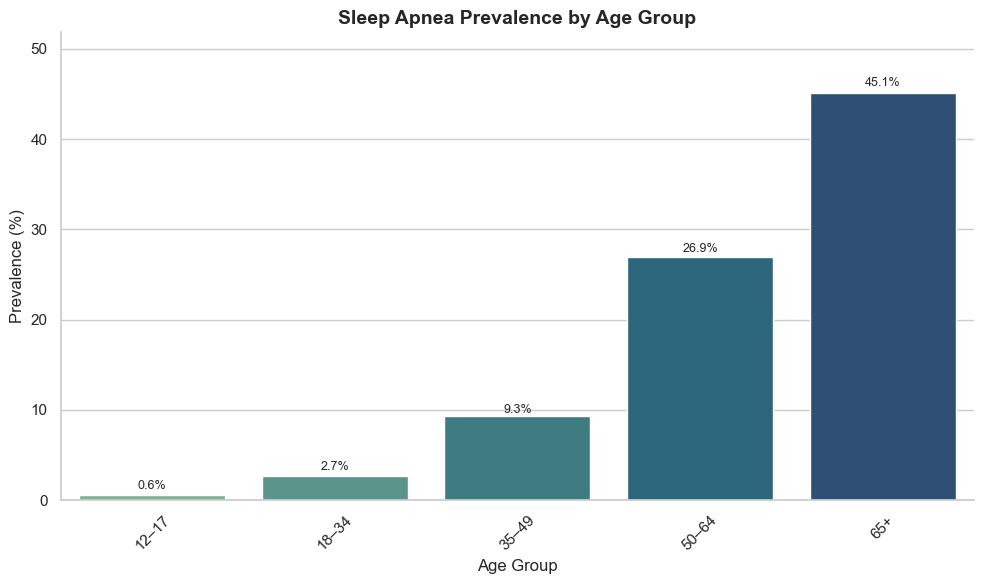


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       27.178423
1    Male       27.277732

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


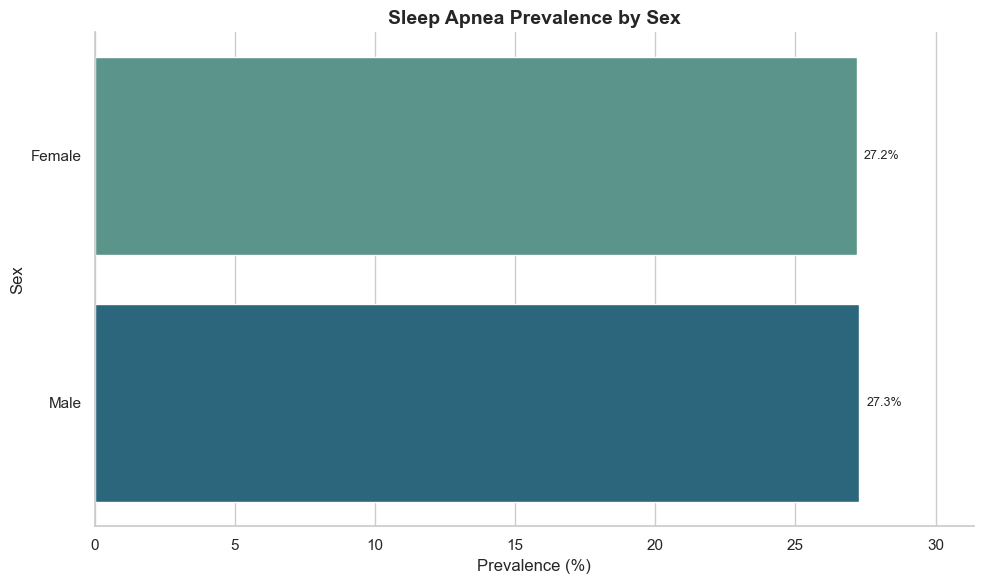


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       30.119068
1                  $20,000–39,999       37.964032
2                  $40,000–59,999       32.621237
3                  $60,000–79,999       29.181446
4                 $80,000 or more       20.707943

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


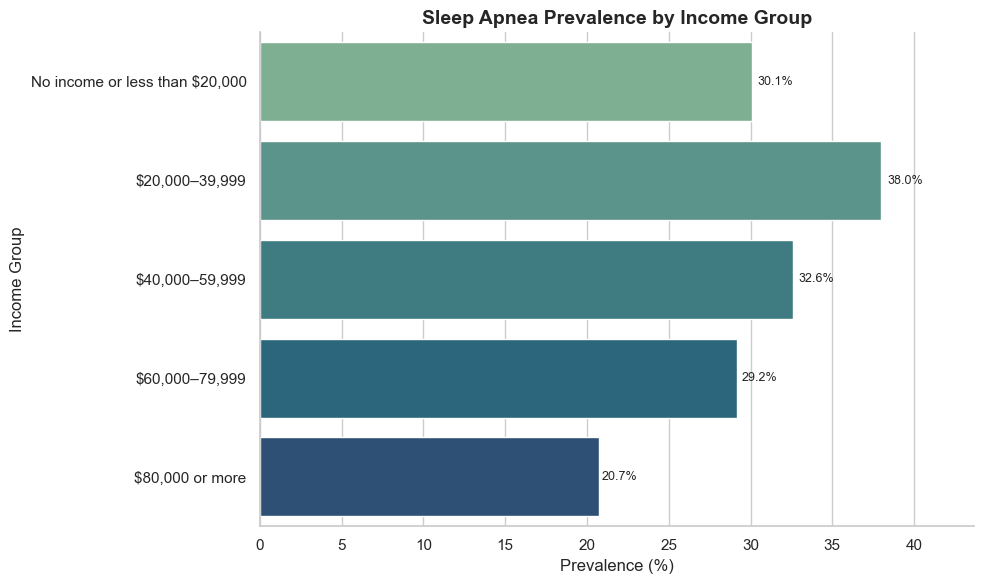


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta       25.472431
1                      British Columbia       21.710798
2                              Manitoba       32.537591
3                         New Brunswick       36.888308
4             Newfoundland and Labrador       40.274643
5                           Nova Scotia       35.451148
6                               Ontario       24.842437
7                  Prince Edward Island       37.484885
8                                Quebec       21.235177
9                          Saskatchewan       34.984719
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES       15.019763

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


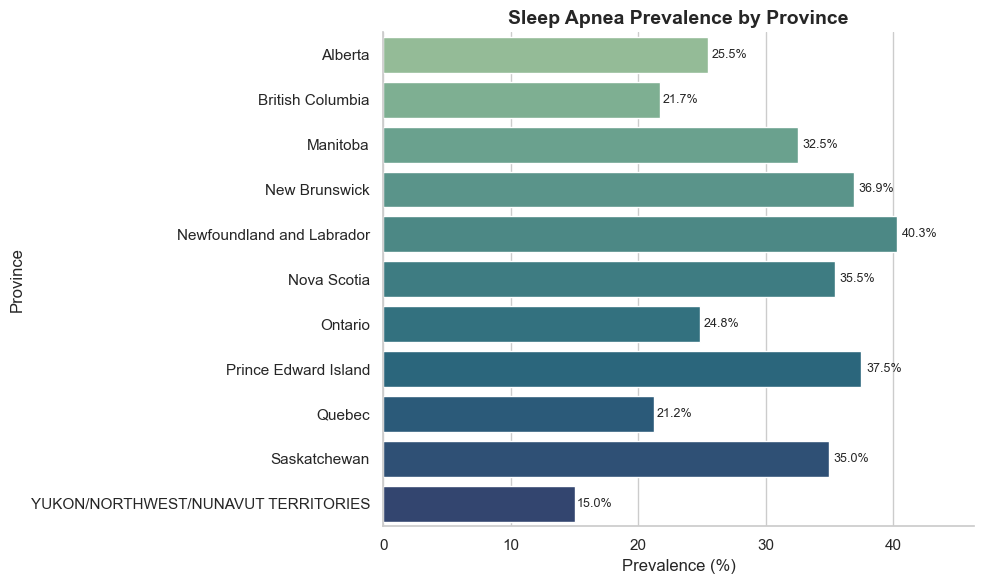


===== HIGH BLOOD PRESSURE =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.262143
1     18–34        1.414075
2     35–49        7.661650
3     50–64       27.195494
4       65+       52.556670

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


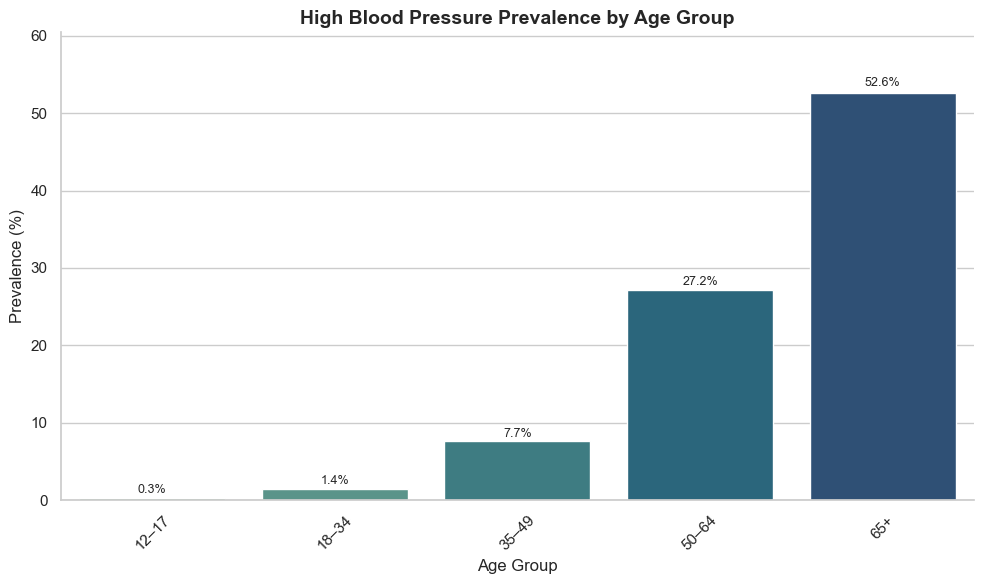


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       29.675315
1    Male       30.631346

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


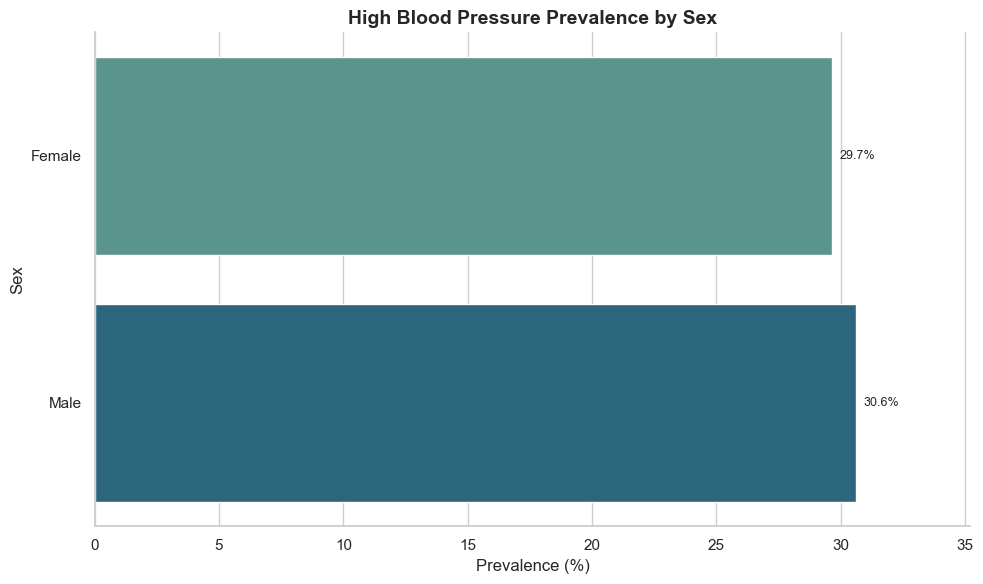


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       30.998161
1                  $20,000–39,999       42.971114
2                  $40,000–59,999       36.847212
3                  $60,000–79,999       32.875034
4                 $80,000 or more       22.490115

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


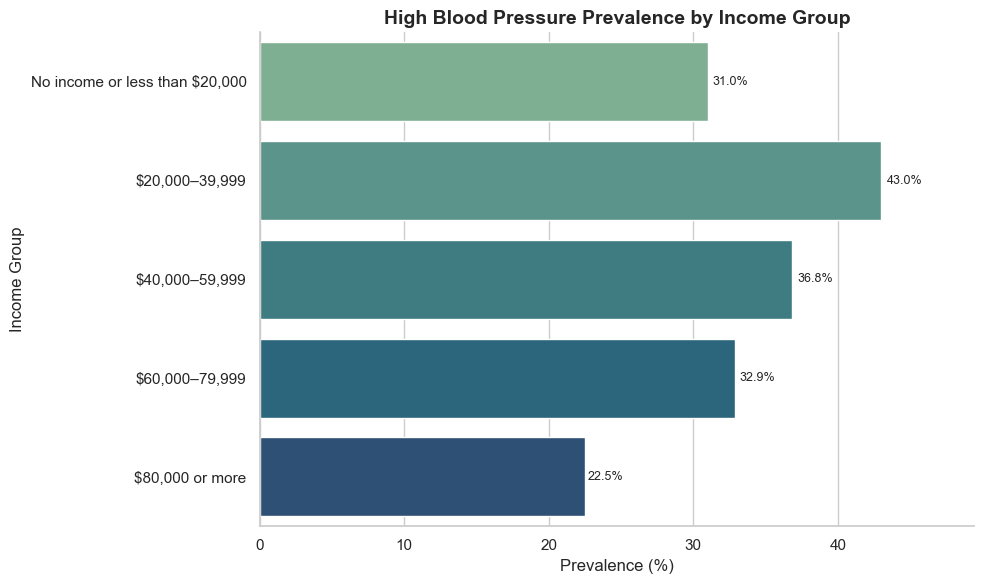


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta       26.756314
1                      British Columbia       23.057933
2                              Manitoba       36.031008
3                         New Brunswick       43.443387
4             Newfoundland and Labrador       47.793427
5                           Nova Scotia       39.978697
6                               Ontario       26.790216
7                  Prince Edward Island       44.369261
8                                Quebec       23.774060
9                          Saskatchewan       38.322871
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES       15.278689

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


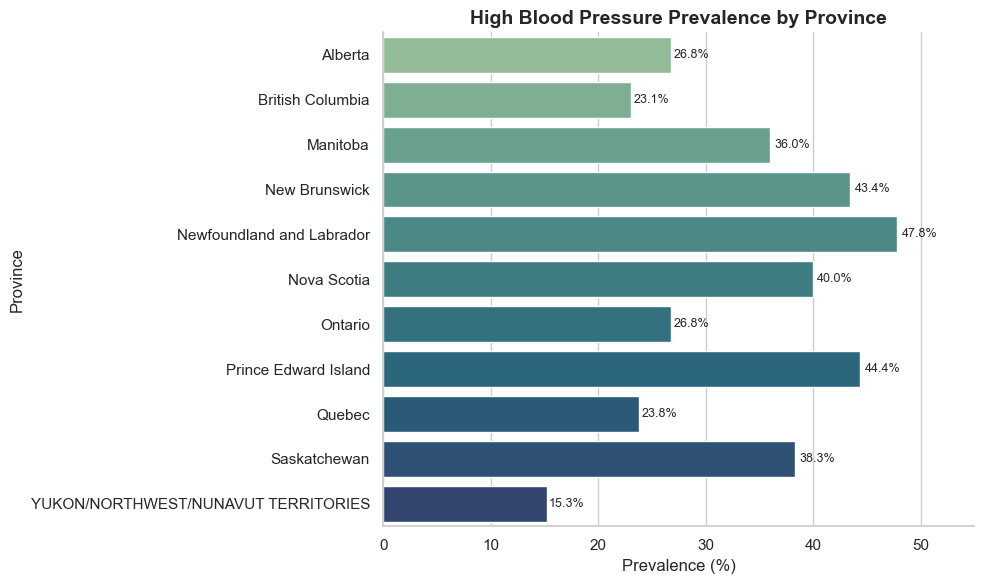


===== HIGH CHOLESTEROL =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     18–34        1.625963
1     35–49        6.072437
2     50–64       20.121184
3       65+       29.003898

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


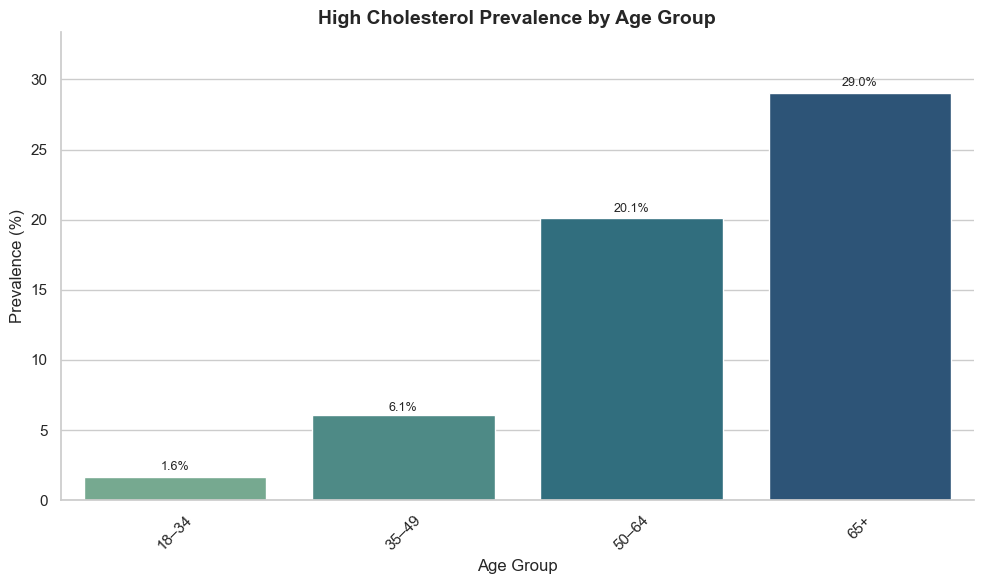


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       17.406898
1    Male       21.319909

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


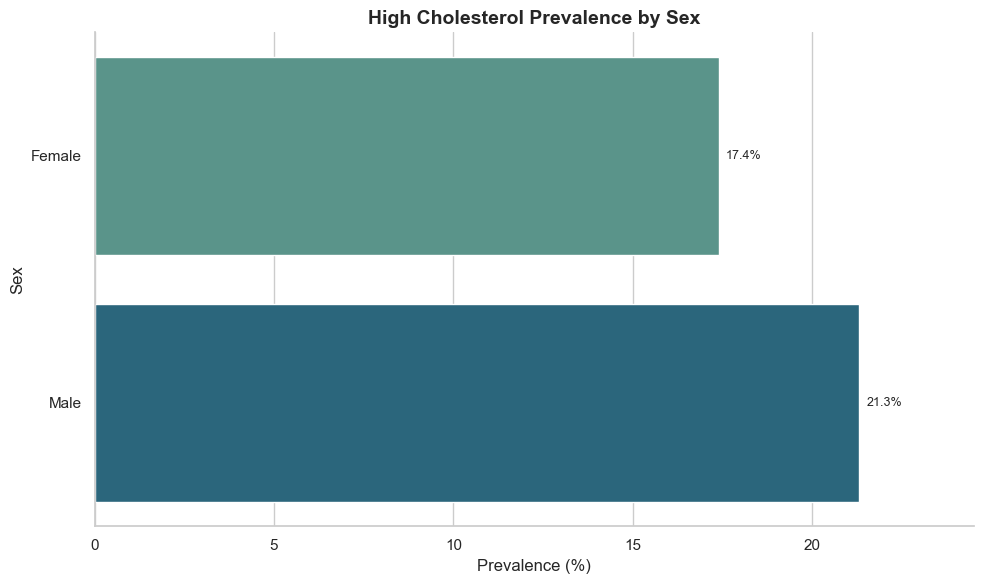


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       21.442291
1                  $20,000–39,999       23.348318
2                  $40,000–59,999       21.642058
3                  $60,000–79,999       20.473798
4                 $80,000 or more       16.066968

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


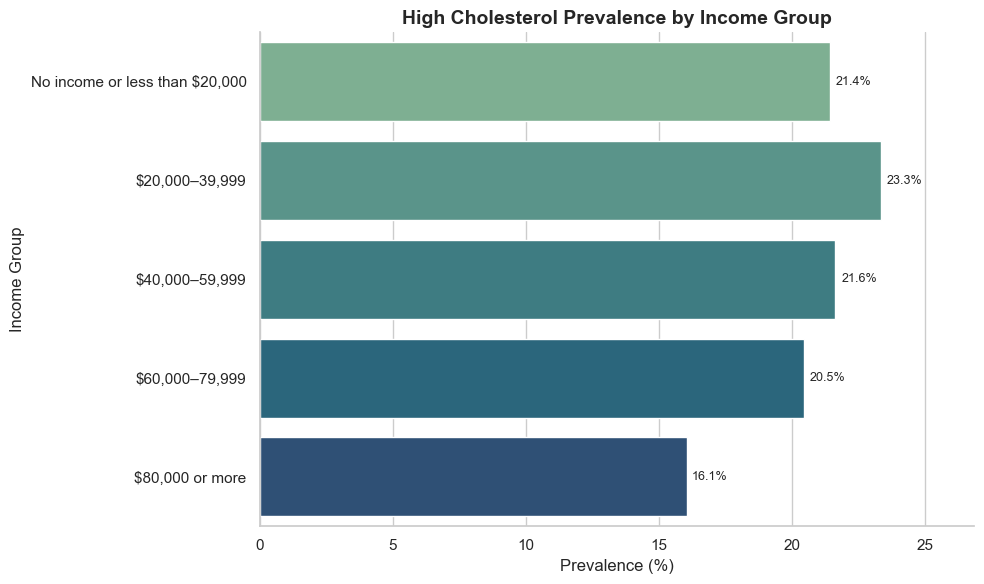


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta       17.587331
1                      British Columbia       14.302243
2                              Manitoba       21.933884
3                         New Brunswick       24.906771
4             Newfoundland and Labrador       31.358410
5                           Nova Scotia       24.592620
6                               Ontario       18.201970
7                  Prince Edward Island       24.013158
8                                Quebec       15.815448
9                          Saskatchewan       21.698274
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES        8.320127

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


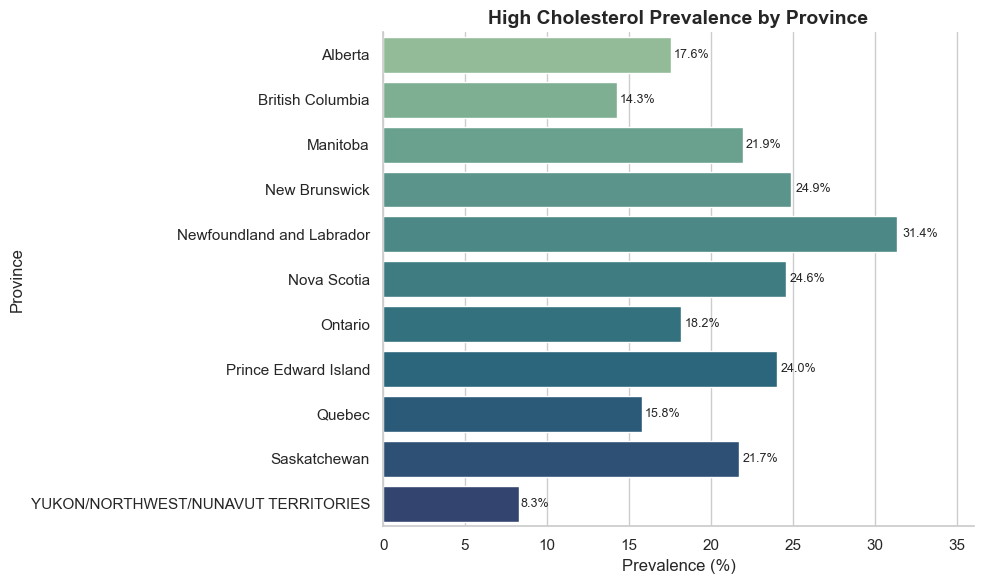


===== DIABETES =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.186509
1     18–34        0.345125
2     35–49        1.762546
3     50–64        6.928193
4       65+       17.092621

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


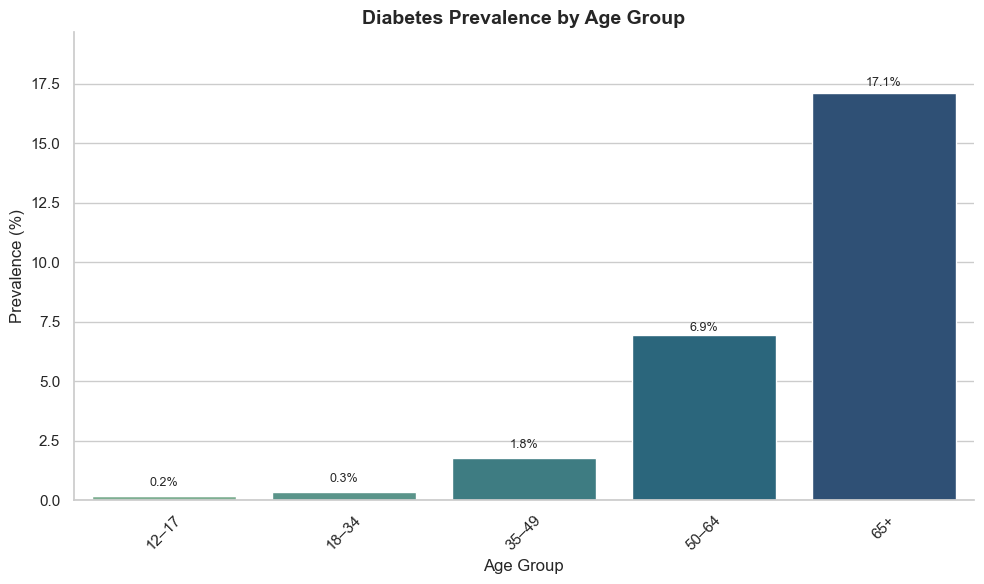


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female        8.023072
1    Male       10.868660

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


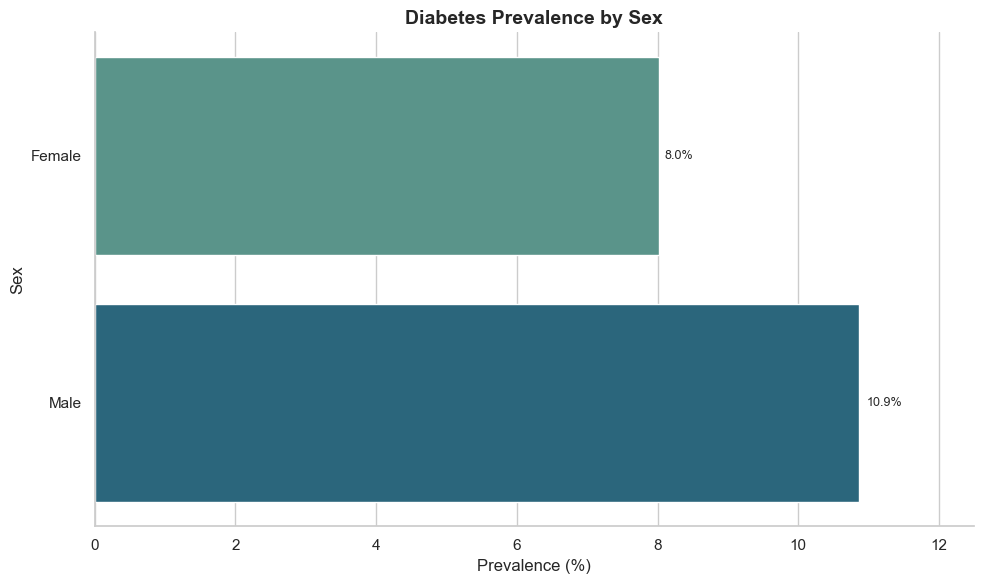


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       10.842736
1                  $20,000–39,999       14.559775
2                  $40,000–59,999       11.680795
3                  $60,000–79,999       10.034002
4                 $80,000 or more        6.351694

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


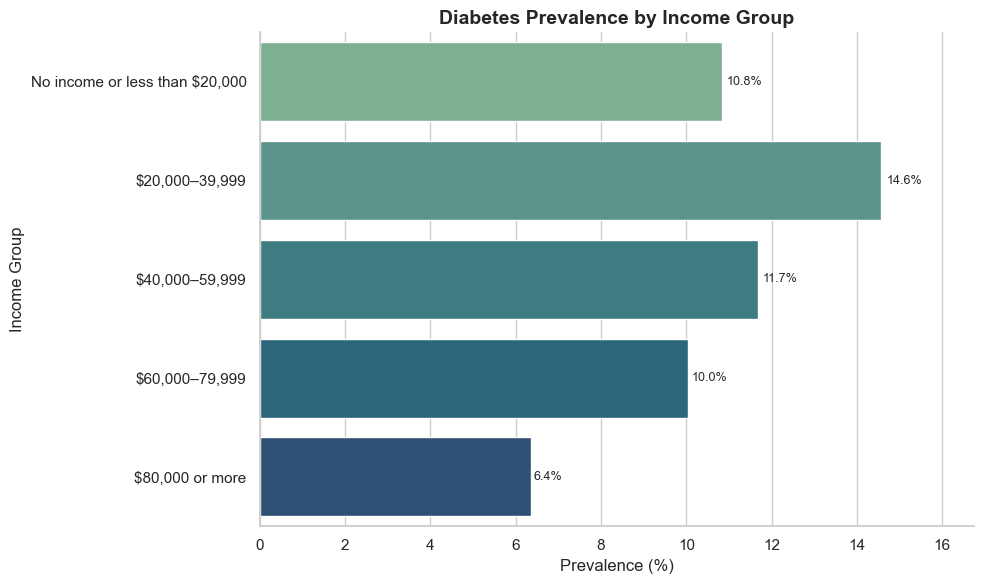


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta        8.660387
1                      British Columbia        5.951575
2                              Manitoba       10.474528
3                         New Brunswick       13.276891
4             Newfoundland and Labrador       16.714808
5                           Nova Scotia       13.123979
6                               Ontario        8.480328
7                  Prince Edward Island       14.132554
8                                Quebec        7.686157
9                          Saskatchewan       10.383148
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES        1.997245

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


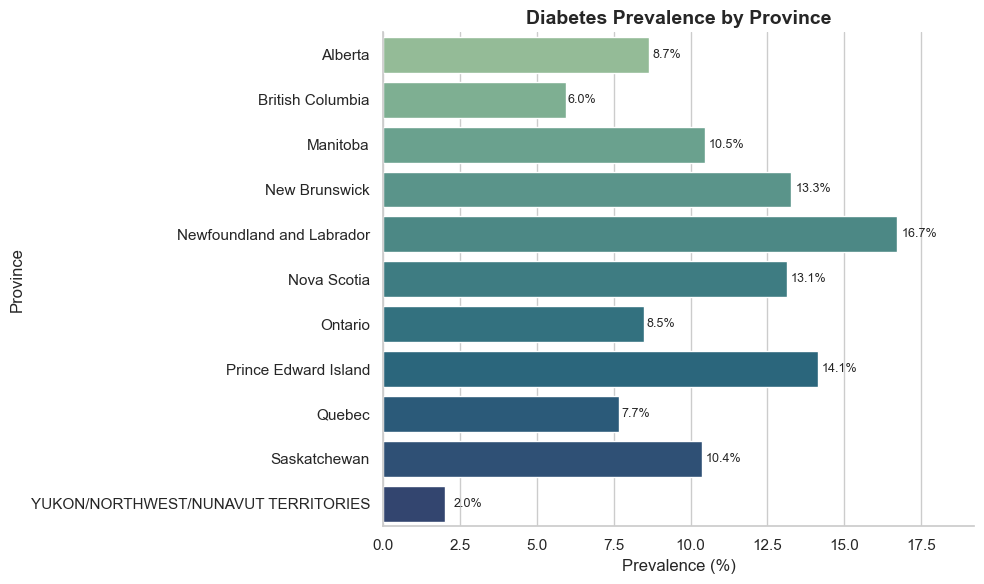


===== CHRONIC FATIGUE SYNDROME =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.277906
1     18–34        0.943644
2     35–49        1.589570
3     50–64        2.583060
4       65+        2.151549

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


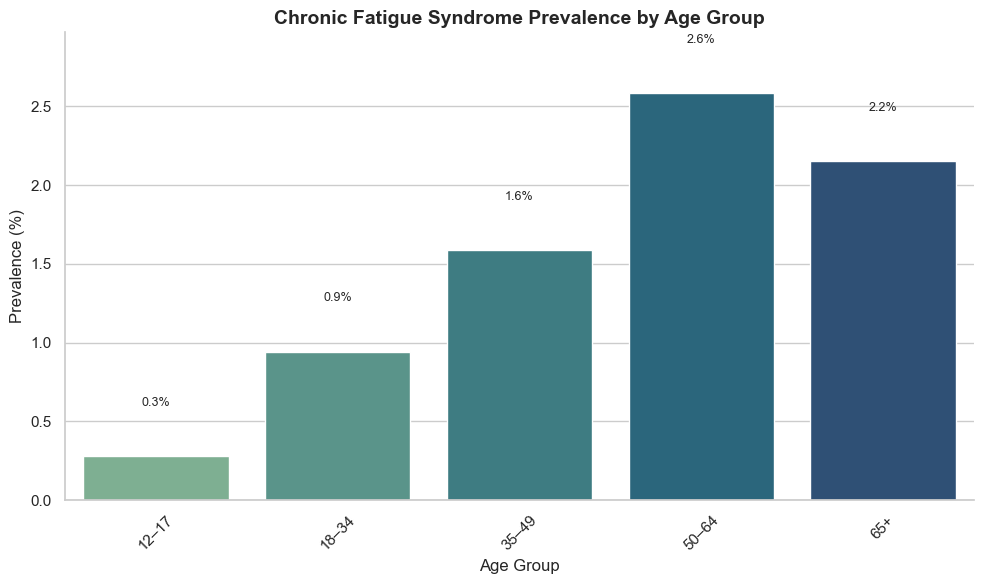


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female        2.319574
1    Male        1.326443

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


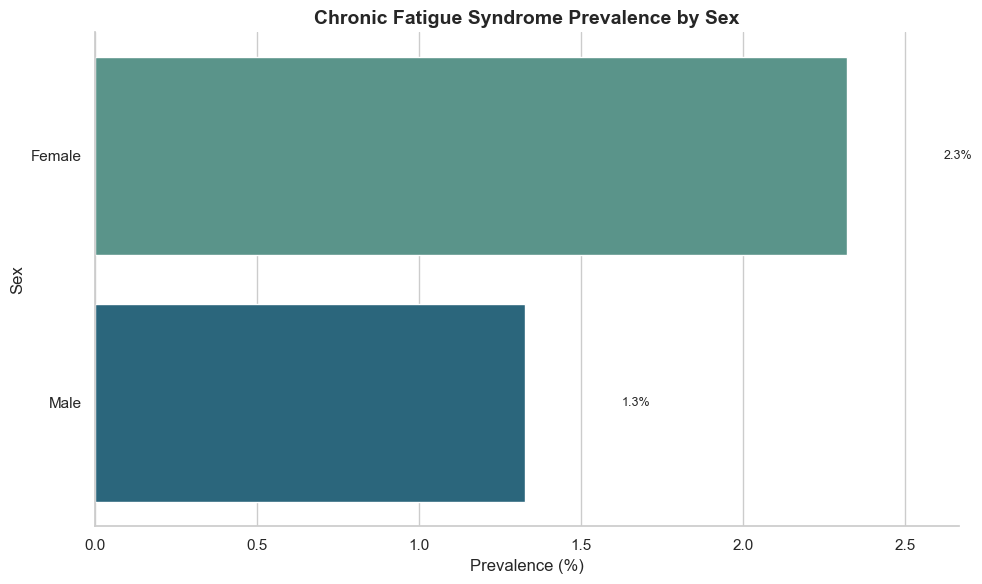


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000        4.317269
1                  $20,000–39,999        2.996646
2                  $40,000–59,999        2.048853
3                  $60,000–79,999        1.715569
4                 $80,000 or more        1.119539

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


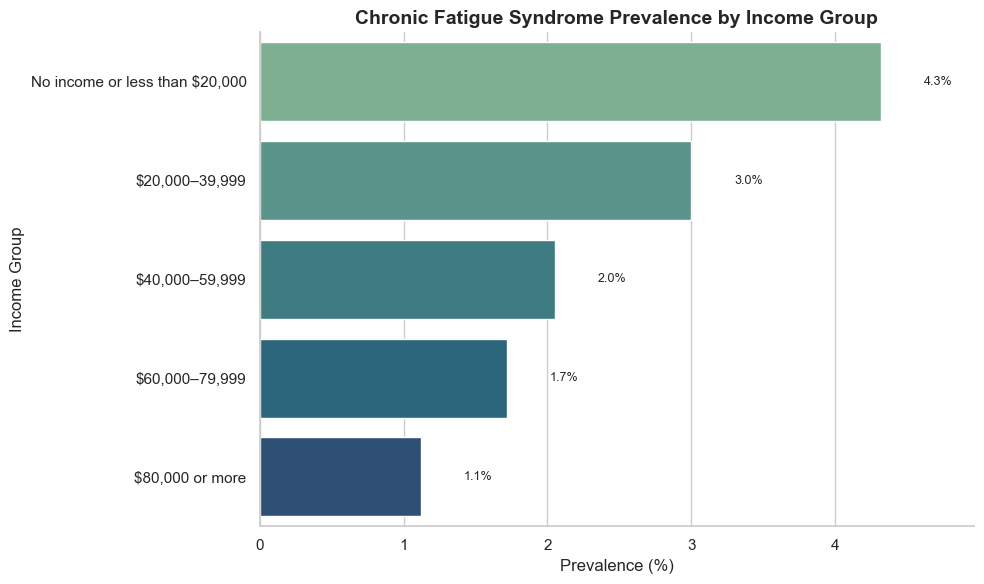


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta        1.750000
1                      British Columbia        1.869852
2                              Manitoba        1.687829
3                         New Brunswick        2.833178
4             Newfoundland and Labrador        1.634110
5                           Nova Scotia        2.201314
6                               Ontario        1.936562
7                  Prince Edward Island        1.520270
8                                Quebec        1.714196
9                          Saskatchewan        1.865252
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES        1.181102

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


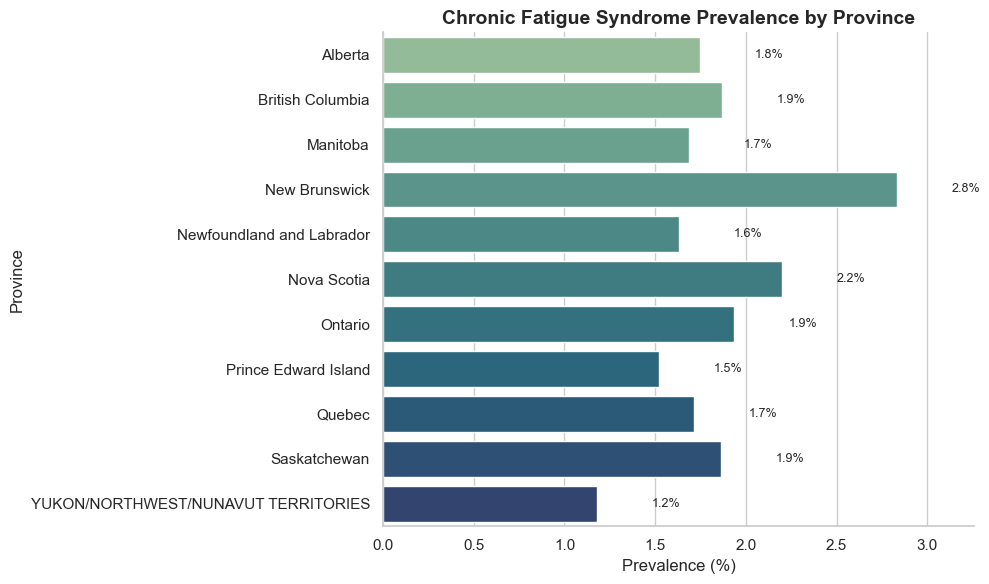


===== MOOD DISORDER =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        4.952939
1     18–34       12.713199
2     35–49       11.493568
3     50–64       12.065222
4       65+        7.219380

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


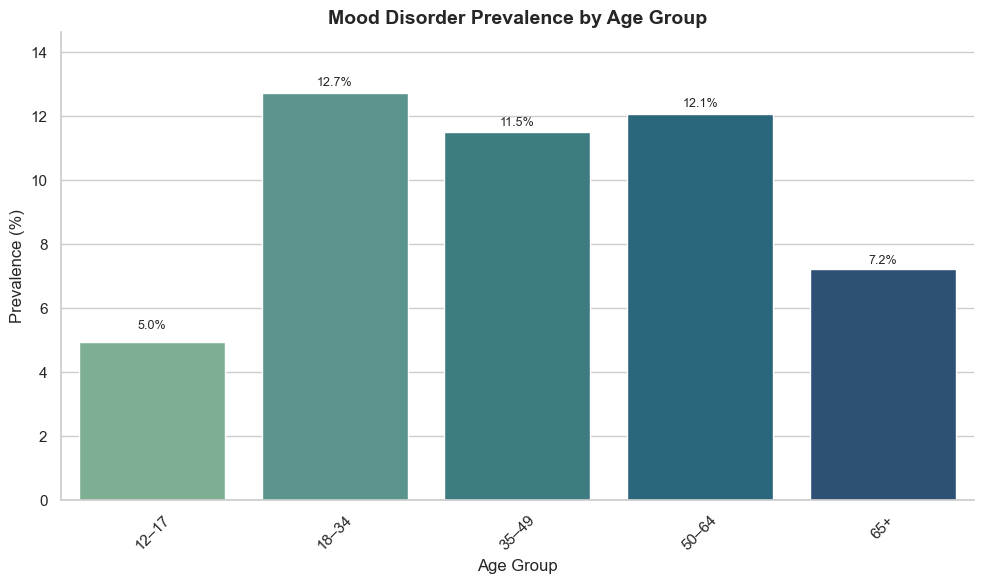


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       11.451627
1    Male        7.150409

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


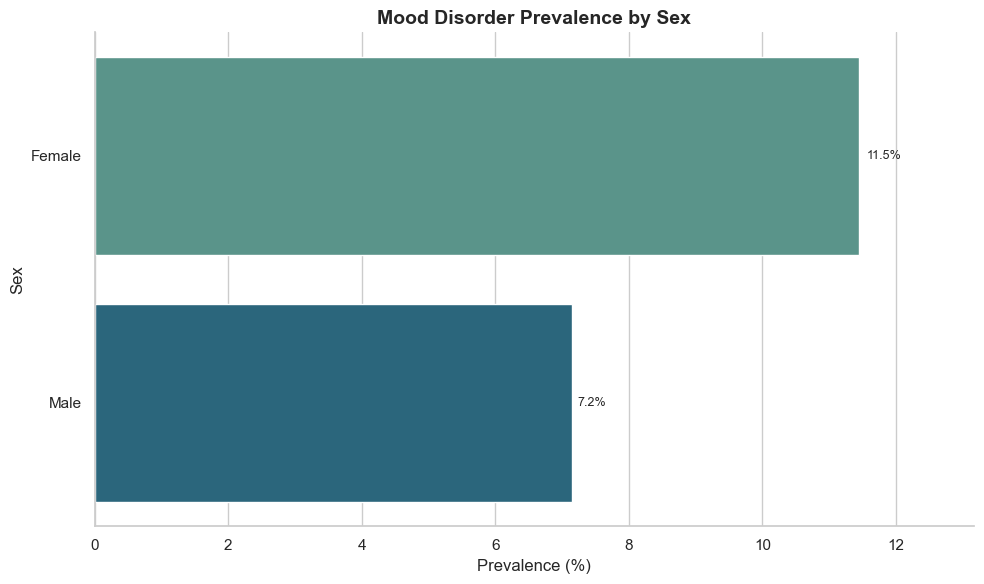


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       20.063588
1                  $20,000–39,999       11.341169
2                  $40,000–59,999        9.971477
3                  $60,000–79,999        8.620807
4                 $80,000 or more        7.434816

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


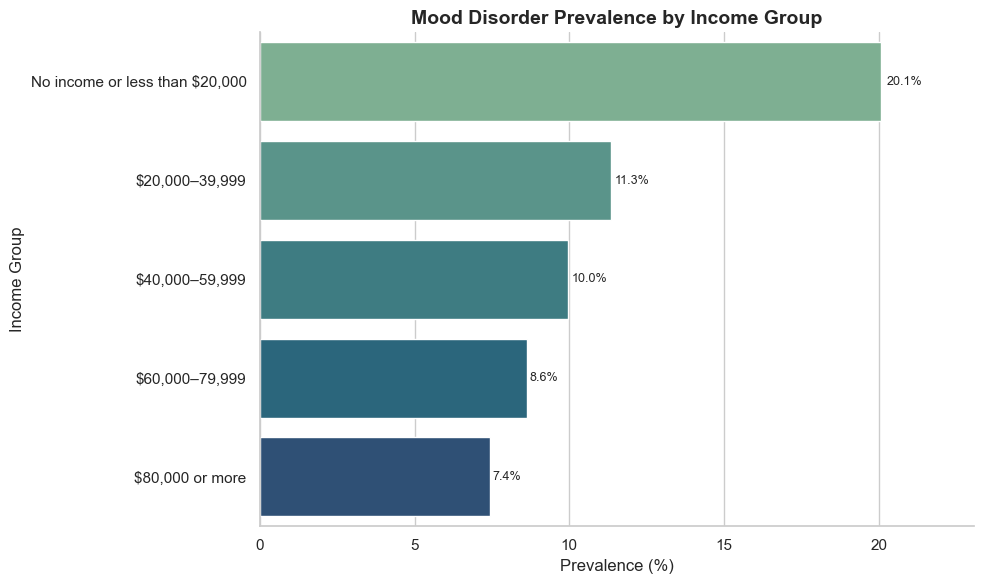


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta       10.910031
1                      British Columbia       10.163773
2                              Manitoba        9.158531
3                         New Brunswick        9.031657
4             Newfoundland and Labrador        7.750047
5                           Nova Scotia       11.605245
6                               Ontario       10.803106
7                  Prince Edward Island        8.656860
8                                Quebec        6.296160
9                          Saskatchewan        9.983923
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES        8.798424

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


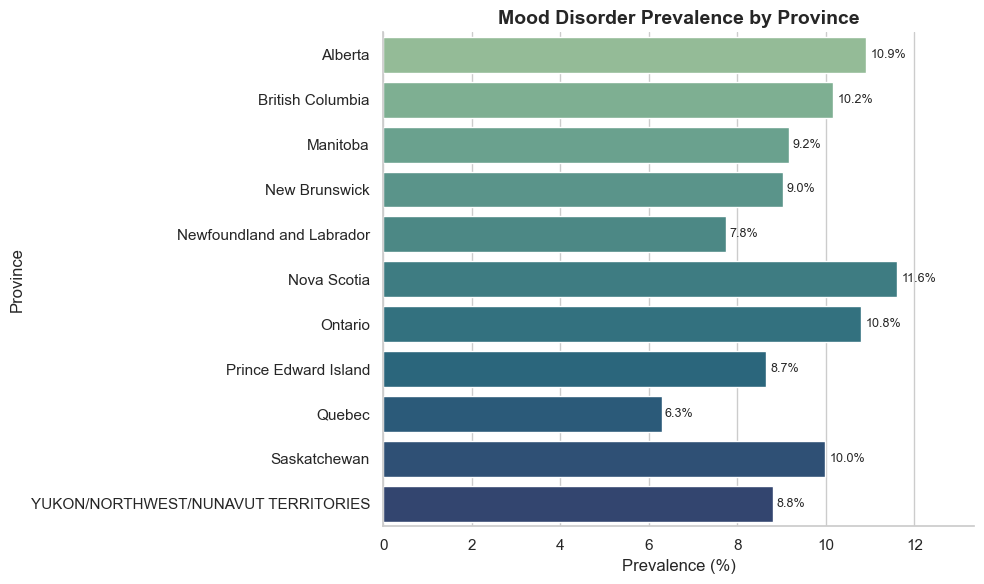


===== ANXIETY DISORDER =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17       10.898130
1     18–34       15.359906
2     35–49       11.977367
3     50–64       10.396451
4       65+        5.975979

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


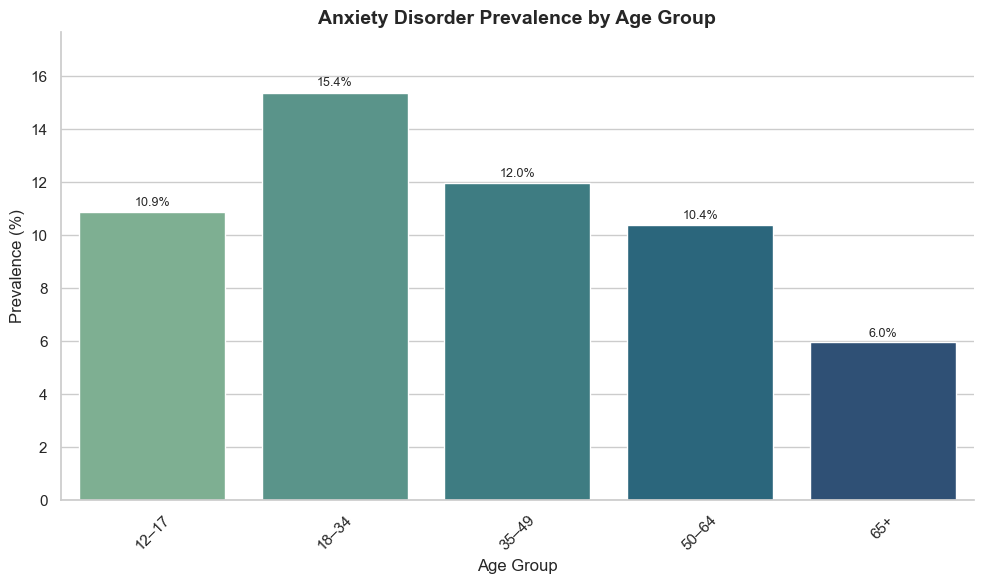


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       11.610875
1    Male        6.785279

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


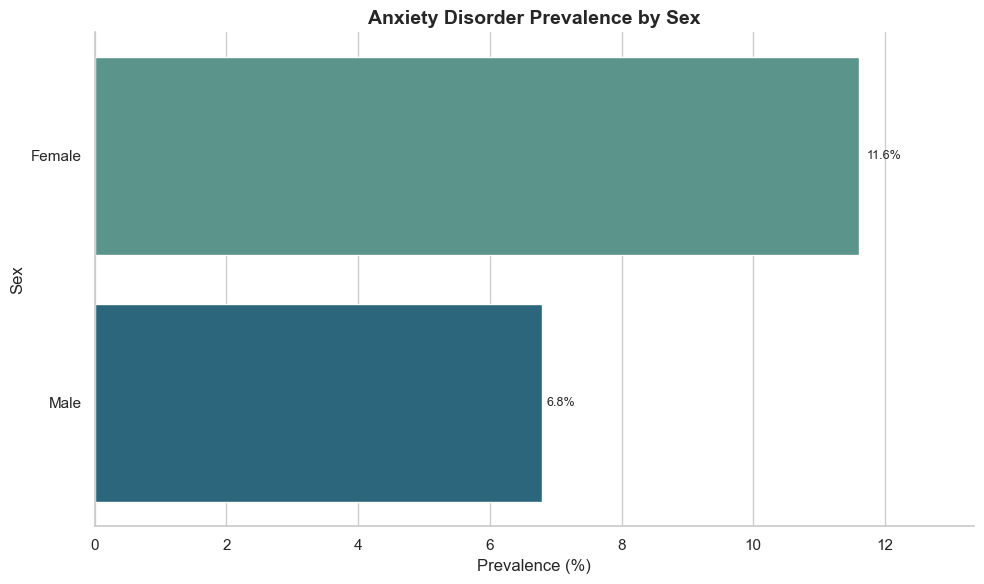


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       18.979933
1                  $20,000–39,999       10.633273
2                  $40,000–59,999        9.393369
3                  $60,000–79,999        8.337303
4                 $80,000 or more        7.927559

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


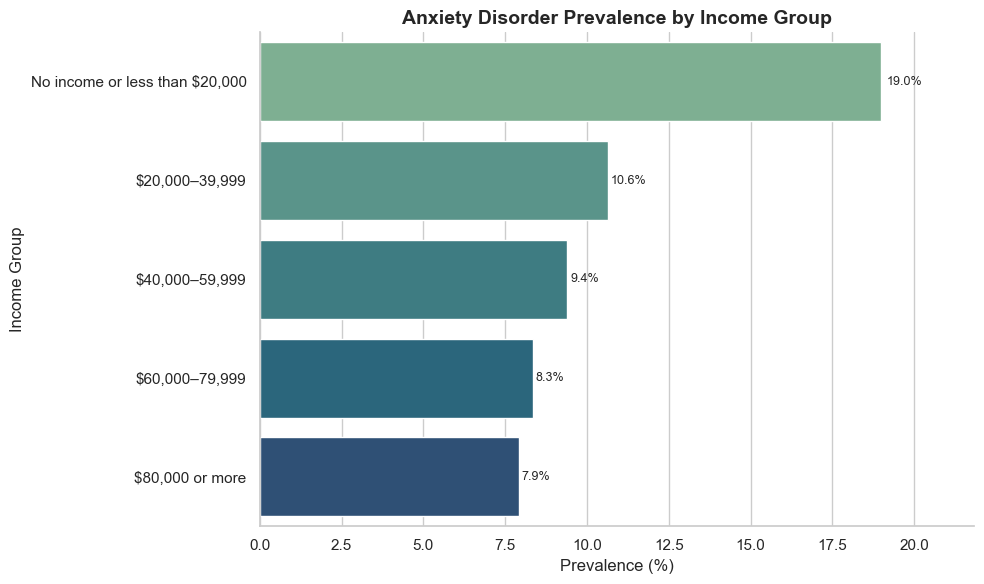


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta        8.950724
1                      British Columbia        9.206192
2                              Manitoba        8.692284
3                         New Brunswick       10.527296
4             Newfoundland and Labrador        8.577327
5                           Nova Scotia       11.032281
6                               Ontario       10.324039
7                  Prince Edward Island        7.861104
8                                Quebec        9.053757
9                          Saskatchewan        7.546259
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES        8.804205

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


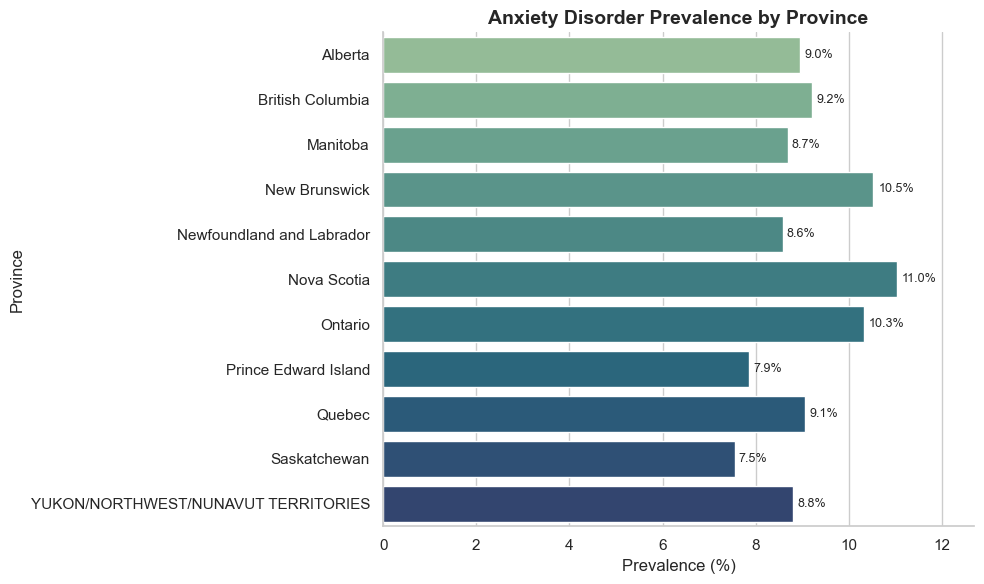


===== RESPIRATORY CONDITION (ASTHMA OR COPD) =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        6.195275
1     18–34        6.029838
2     35–49        5.134723
3     50–64        6.951292
4       65+       11.439906

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


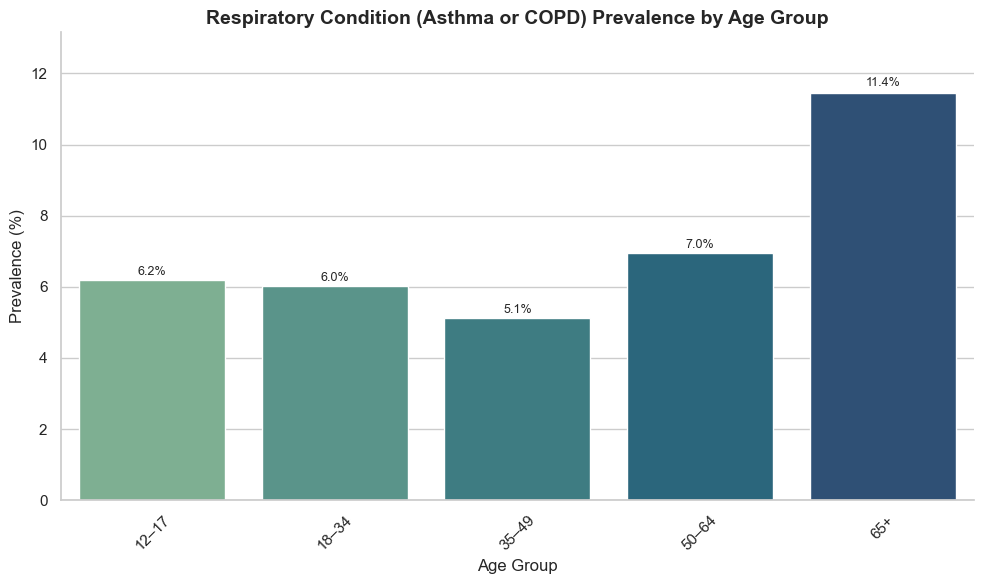


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       10.031694
1    Male        6.683578

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


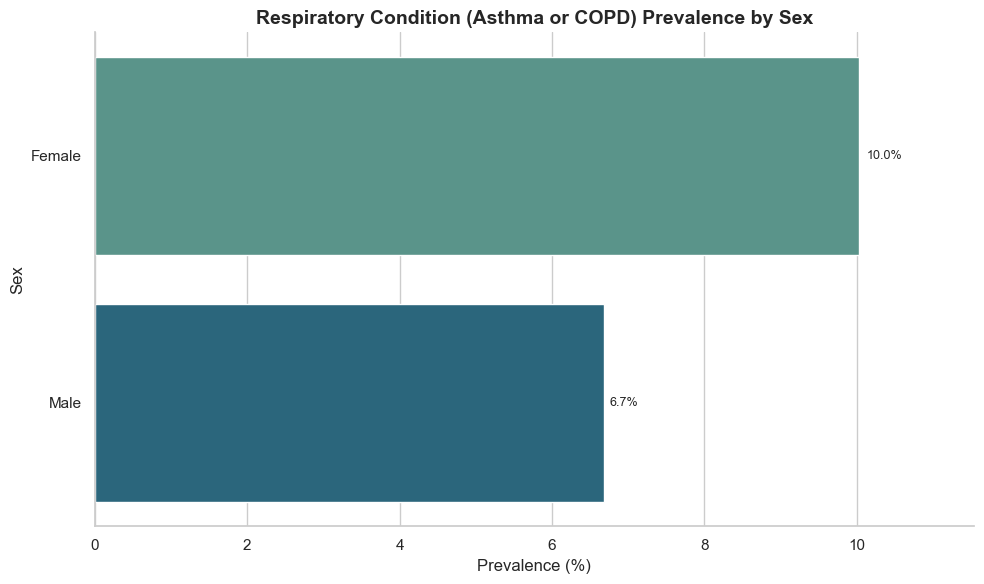


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       12.173751
1                  $20,000–39,999       11.493313
2                  $40,000–59,999        9.430008
3                  $60,000–79,999        8.509581
4                 $80,000 or more        6.851594

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


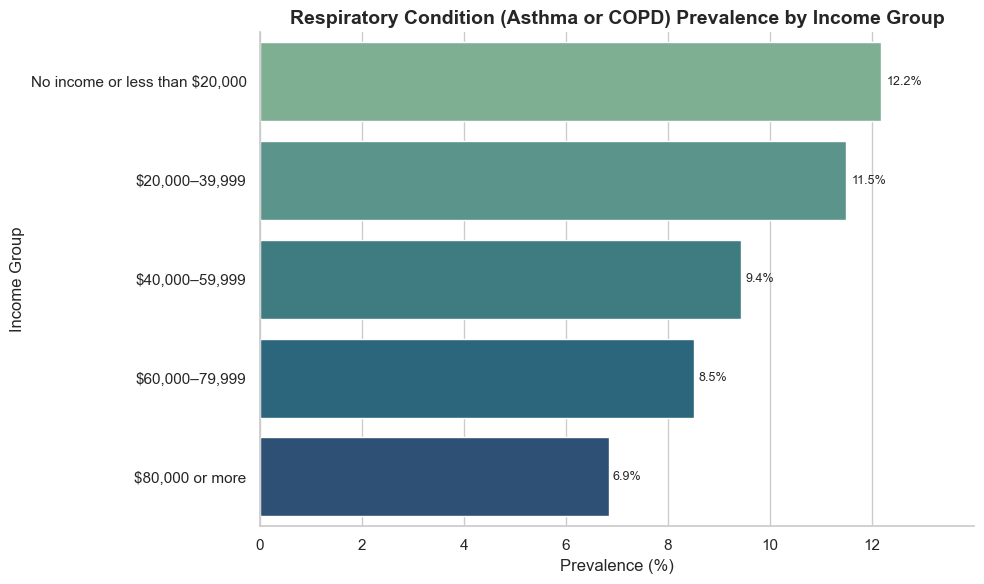


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta       10.301109
1                      British Columbia        6.175018
2                              Manitoba        7.728758
3                         New Brunswick        8.137903
4             Newfoundland and Labrador       10.958904
5                           Nova Scotia       11.889676
6                               Ontario        7.461439
7                  Prince Edward Island       12.546399
8                                Quebec        8.903514
9                          Saskatchewan        8.039685
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES        2.773826

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


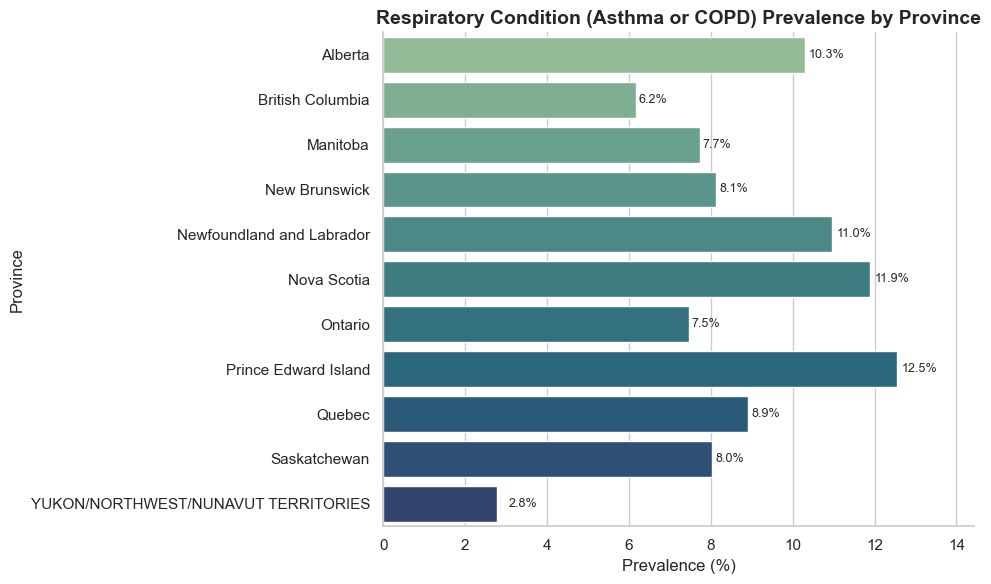


===== MUSCULOSKELETAL CONDITION =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     18–34        1.468788
1     35–49        7.309056
2     50–64       33.323585
3       65+       54.120406

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


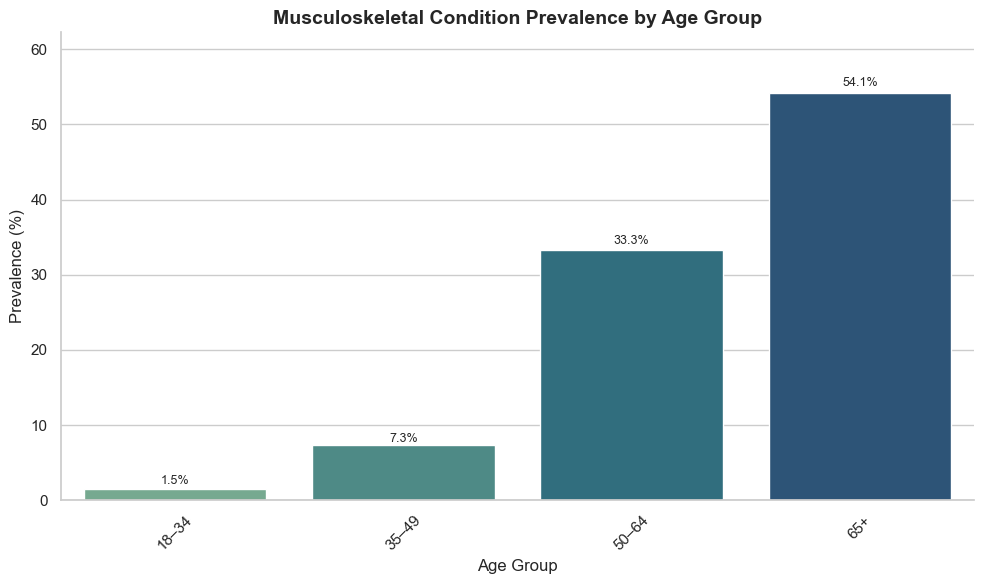


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       40.552762
1    Male       26.702036

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


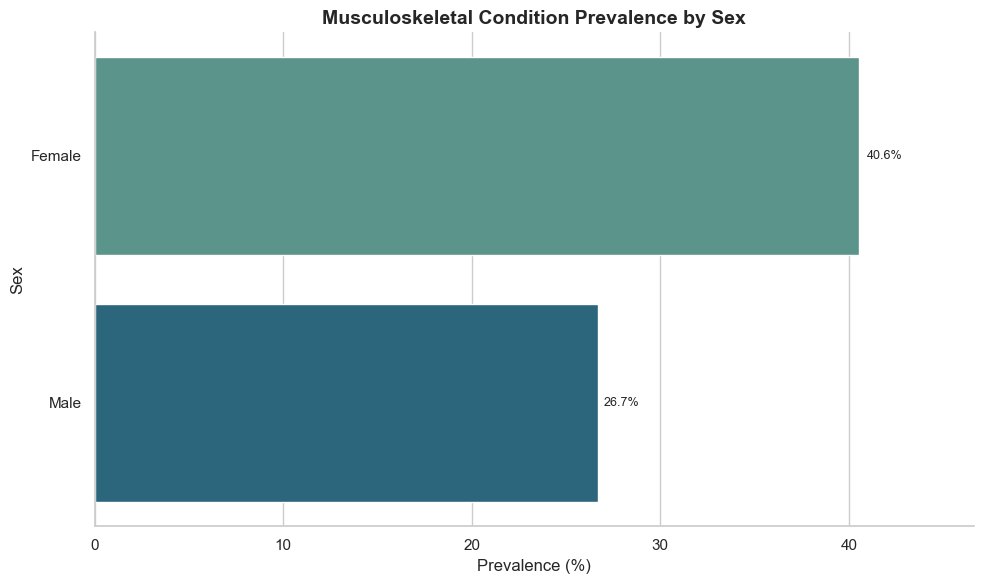


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       41.091251
1                  $20,000–39,999       47.909551
2                  $40,000–59,999       40.263885
3                  $60,000–79,999       35.740659
4                 $80,000 or more       25.847594

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


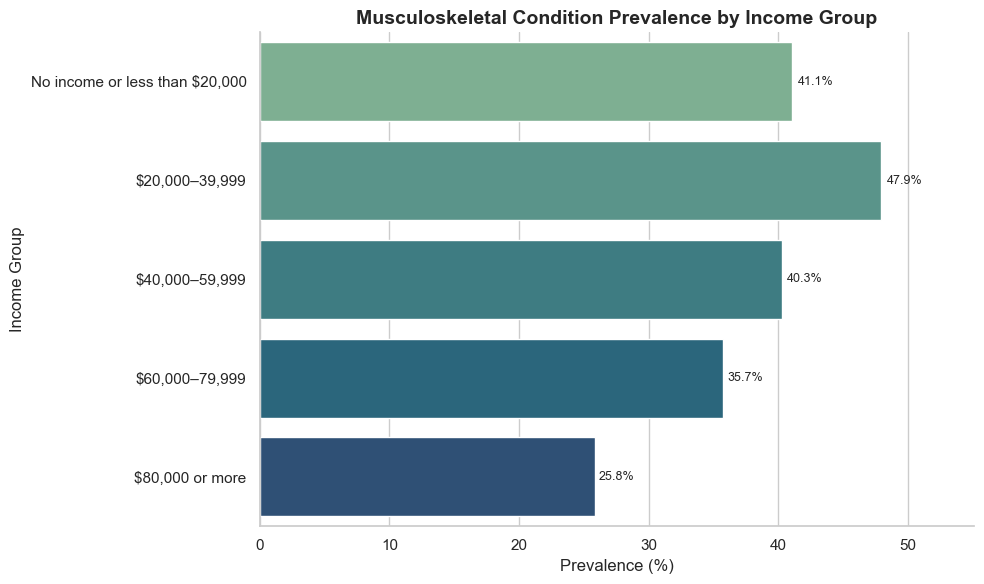


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta       33.788621
1                      British Columbia       28.775701
2                              Manitoba       37.967089
3                         New Brunswick       43.017788
4             Newfoundland and Labrador       49.524195
5                           Nova Scotia       46.577983
6                               Ontario       30.910356
7                  Prince Edward Island       45.519713
8                                Quebec       27.949364
9                          Saskatchewan       41.375605
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES       16.427970

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


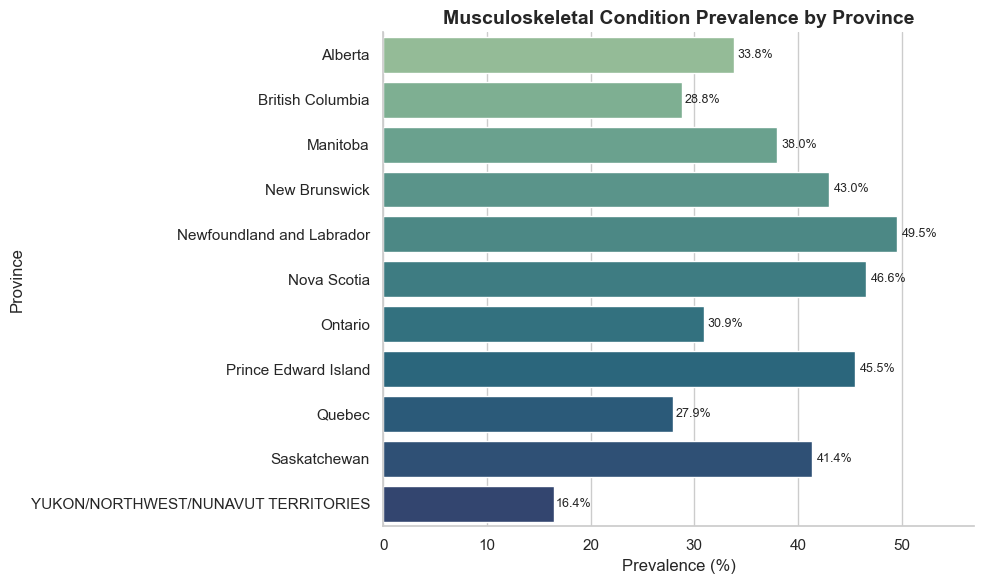


===== CARDIOVASCULAR CONDITION =====

--- Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.220751
1     18–34        0.448191
2     35–49        0.656522
3     50–64        3.371341
4       65+       19.757167

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


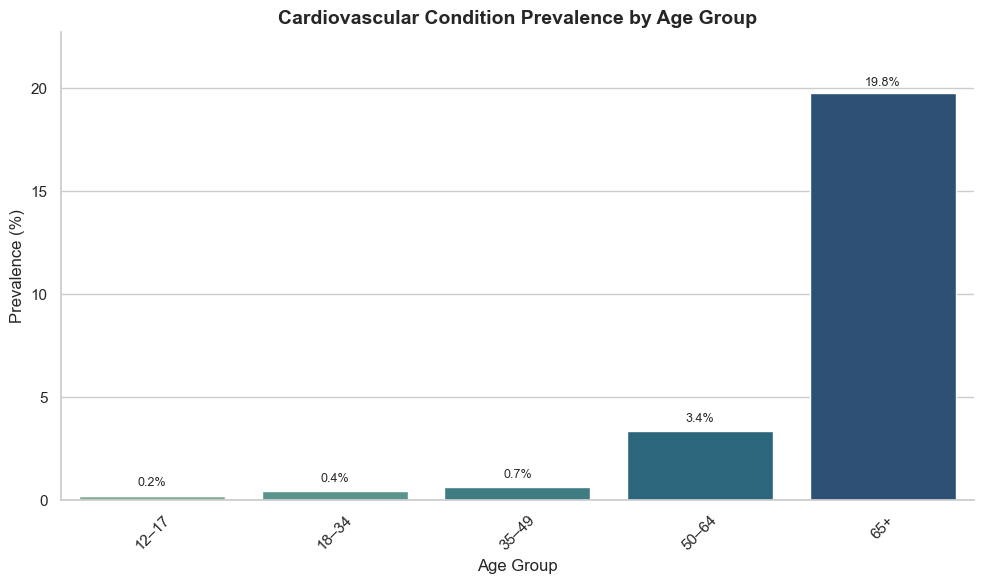


--- Prevalence by Sex ---


Sex  Prevalence (%)
0  Female        7.572027
1    Male       12.078848

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


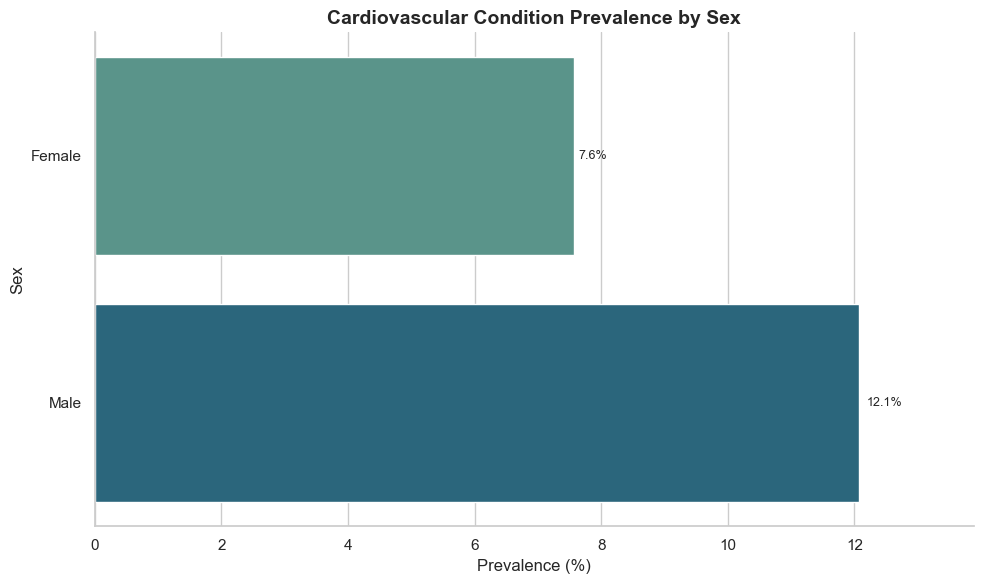


--- Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       11.181703
1                  $20,000–39,999       16.044411
2                  $40,000–59,999       12.131070
3                  $60,000–79,999       10.502283
4                 $80,000 or more        6.148753

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


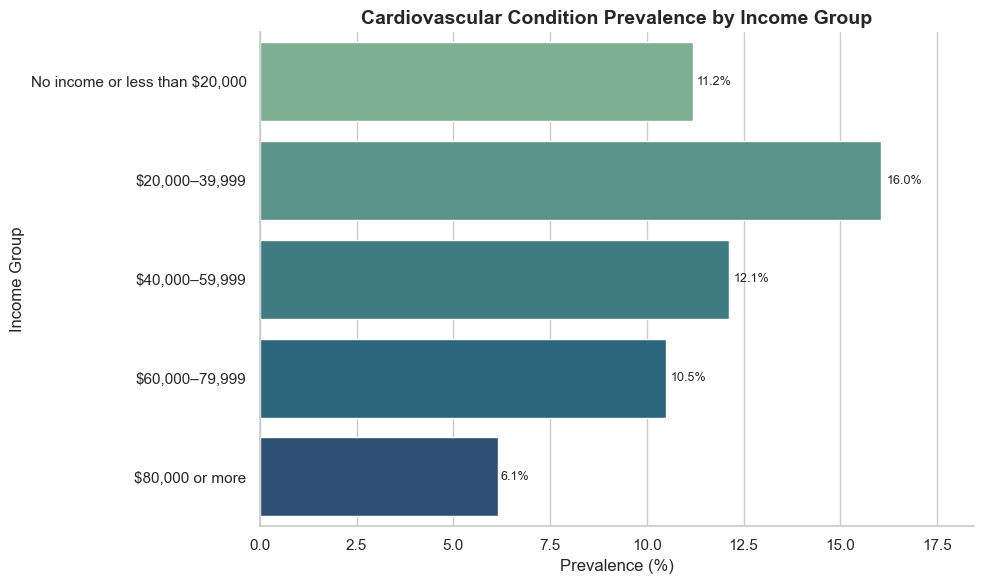


--- Prevalence by Province ---


Province  Prevalence (%)
0                               Alberta        8.113108
1                      British Columbia        7.239274
2                              Manitoba       10.409639
3                         New Brunswick       15.301935
4             Newfoundland and Labrador       15.321477
5                           Nova Scotia       13.307494
6                               Ontario        7.859042
7                  Prince Edward Island       16.457565
8                                Quebec        8.689320
9                          Saskatchewan       12.059621
10  YUKON/NORTHWEST/NUNAVUT TERRITORIES        1.334270

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\612783084.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


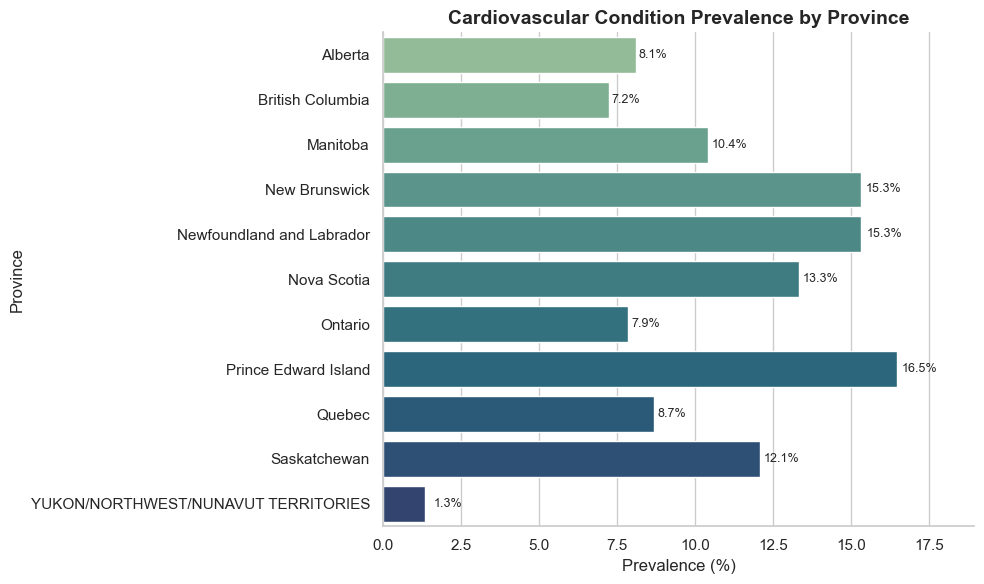

In [5]:
# 📊 1. Set Seaborn's style to a white grid
# This makes all plots have a clean white background with helpful grid lines
sns.set_theme(style="whitegrid")

# 📁 2. Create a subfolder for national-level visualizations
# os.path.join safely joins parts of file paths (works across Windows/Mac/Linux)
national_folder = os.path.join(save_dir, 'National_Level')

# 🛠️ 3. Make sure the folder exists, and if not, create it
os.makedirs(national_folder, exist_ok=True)

# 📦 4. Prepare an empty dictionary to store results for all chronic conditions
all_results = {}

# 🔁 5. Loop through each chronic condition like Diabetes, Asthma, etc.
for cond_name, cond_code in conditions.items():
    print(f"\n===== {cond_name.upper()} =====")
    
    # This will hold stratified results for this specific condition
    cond_results = {}

    # 🔄 6. Loop through each demographic group (Age, Sex, Income, etc.)
    for group_col, label_map, group_order, label_name in stratifications:
        try:
            # ✅ 7. Calculate prevalence (%) for each demographic group
            result = stratify_prevalence(
                df=df,                      # Use the full Canada-level dataset
                condition_col=cond_code,    # Column for this chronic condition (1=Yes, 2=No)
                group_col=group_col,        # Column to group by (e.g., age, sex)
                label_map=label_map,        # Dictionary that converts codes to readable labels
                group_order=group_order,    # Order the labels should appear in
                label_name=label_name       # Column name to show in charts
            )

            # 📏 8. Reorder by group order only for present values
            if group_order:
                present_labels = [label for label in group_order if label in result[label_name].values]
                result[label_name] = pd.Categorical(result[label_name], categories=present_labels, ordered=True)
                result = result.sort_values(label_name)

            # 🧹 9. Drop any group where prevalence is 0% (e.g., 12–19 for cholesterol)
            result = result[result['Prevalence (%)'] > 0]

            # Save the cleaned result for this group
            cond_results[label_name] = result

            # Show result table in the notebook
            print(f"\n--- Prevalence by {label_name} ---")
            display(result)

            # 📐 10. Start a new plot with fixed size
            plt.figure(figsize=(10, 6))

            # 🚫 Remove all existing gridlines and set clean grid manually
            plt.grid(False)  # Turn off default grid lines
            ax = plt.gca()   # Get current axis
            ax.spines['top'].set_visible(False)       # Hide top border line
            ax.spines['right'].set_visible(False)     # Hide right border line
            ax.spines['left'].set_visible(True)       # Keep left border
            ax.spines['bottom'].set_visible(True)     # Keep bottom border

            # ✅ Manually add gridlines only for major axis (y for horizontal, x for vertical)
            if label_name in ["Sex", "Income Group", "Province"]:
                ax.xaxis.grid(True)   # Horizontal bar → add vertical gridlines
                ax.yaxis.grid(False)  # Remove unnecessary y-grid
            else:
                ax.yaxis.grid(True)   # Vertical bar → add horizontal gridlines
                ax.xaxis.grid(False)  # Remove unnecessary x-grid

            # 📊 11. Choose plot direction: horizontal for sex/income/province, else vertical
            if label_name in ["Sex", "Income Group", "Province"]:
                # Horizontal barplot
                ax = sns.barplot(
                    data=result,
                    y=label_name,              # Show group labels on the y-axis
                    x='Prevalence (%)',        # Bar length shows the prevalence %
                    palette='crest'            # Use a smooth color gradient
                )

                # 🧾 Add percentage labels beside each bar
                for bar in ax.patches:
                    width = bar.get_width()
                    if pd.notna(width) and width > 0:
                        offset = width * 0.01 if width > 5 else 0.3
                        ax.text(
                            width + offset,
                            bar.get_y() + bar.get_height() / 2,
                            f"{width:.1f}%",
                            ha='left', va='center', fontsize=9
                        )

                plt.xlabel("Prevalence (%)")
                plt.ylabel(label_name)

                # 🚫 Prevent grid lines from overlapping the bars
                max_width = result['Prevalence (%)'].max()
                plt.xlim(0, max_width * 1.15)

            else:
                # Vertical barplot (used for Age Group usually)
                ax = sns.barplot(
                    data=result,
                    x=label_name,
                    y='Prevalence (%)',
                    palette='crest'
                )

                # 🧾 Add % labels above bars
                for bar in ax.patches:
                    height = bar.get_height()
                    if pd.notna(height) and height > 0:
                        offset = height * 0.01 if height > 5 else 0.3
                        ax.text(
                            bar.get_x() + bar.get_width() / 2,
                            height + offset,
                            f"{height:.1f}%",
                            ha='center', va='bottom', fontsize=9
                        )

                plt.xlabel(label_name)
                plt.ylabel("Prevalence (%)")
                plt.xticks(rotation=45)

                max_height = result['Prevalence (%)'].max()
                plt.ylim(0, max_height * 1.15)

            # 🏷️ 12. Add a clear, bold title
            plt.title(f"{cond_name} Prevalence by {label_name}", fontsize=14, weight='bold')

            # 📐 13. Adjust layout to prevent clipping of titles/labels
            plt.tight_layout()

            # 💾 14. Save the figure using clean filename format
            filename = f"{cond_name.replace(' ', '_')}_by_{label_name.replace(' ', '_')}.png"
            save_path = os.path.join(national_folder, filename)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')

            # 👁️ 15. Display the chart in the notebook
            plt.show()

        # 🧯 16. Handle errors without breaking the whole loop
        except Exception as e:
            print(f"❌ Could not process {cond_name} by {label_name}: {e}")

    # 💾 17. Save all results for this condition in the master dictionary
    all_results[cond_name] = cond_results


## Conclusion

This exploratory data analysis has successfully illuminated significant patterns of chronic disease in Canada based on the CCHS dataset. The key takeaways are clear:

* **A Dual Health Challenge:** Canada faces a dual burden of chronic disease. There is a high prevalence of **age-related physical conditions** (such as hypertension, high cholesterol, and cardiovascular disease) among older Canadians, while **mental health conditions** (anxiety and mood disorders) are most prominent among younger, working-age populations.

* **Key Demographic Drivers:** The analysis consistently highlighted **age, sex, and income** as critical determinants of health outcomes. Age is the single most powerful predictor for physical conditions, while sex and income level reveal significant health inequities across nearly every ailment analyzed.

* **Pathways for Future Analysis:** The insights gathered here serve as a strong foundation for more advanced work. The identified correlations and high-prevalence groups provide clear targets for **predictive modeling** or for informing tailored **public health strategies** and policies.

Ultimately, this project demonstrates the power of EDA to transform raw data into a clear and actionable understanding of complex national health trends.

## 📍 **ONTARIO-SPECIFIC VISUALIZATIONS**

This section creates bar charts showing the **prevalence** of each chronic condition  
**within Ontario only**, allowing us to zoom into a single province for deeper insights.

### 📊 Stratification Dimensions:
- 🧑‍ Age Group  
- 🚻 Sex  
- 💰 Income Group  

These Ontario-specific charts help us explore **health patterns inside the province**  
and can be compared later to the national averages.



===== SLEEP APNEA (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.558347
1     18–34        2.561596
2     35–49        9.822064
3     50–64       28.031116
4       65+       45.645331

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


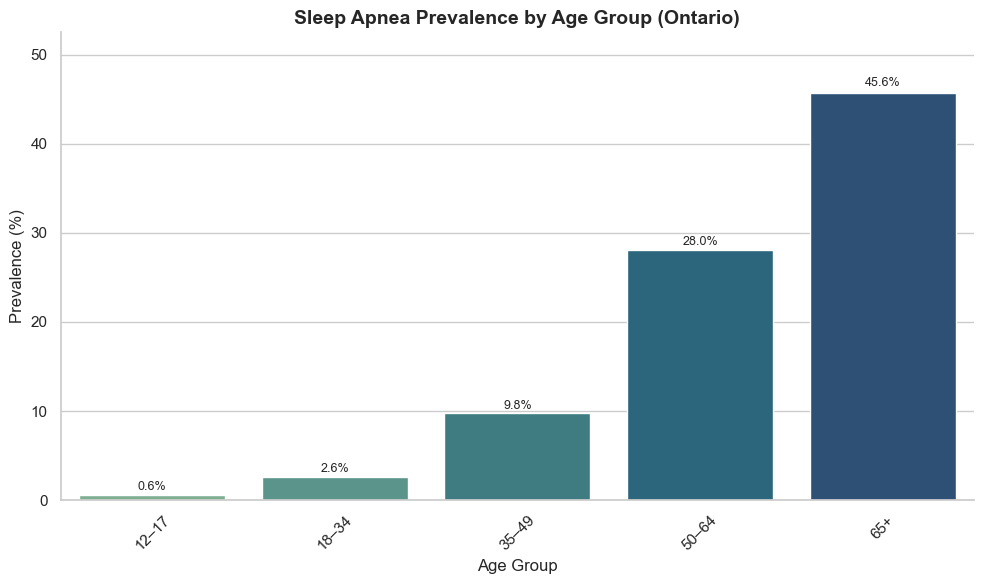


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       24.424074
1    Male       25.342170

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


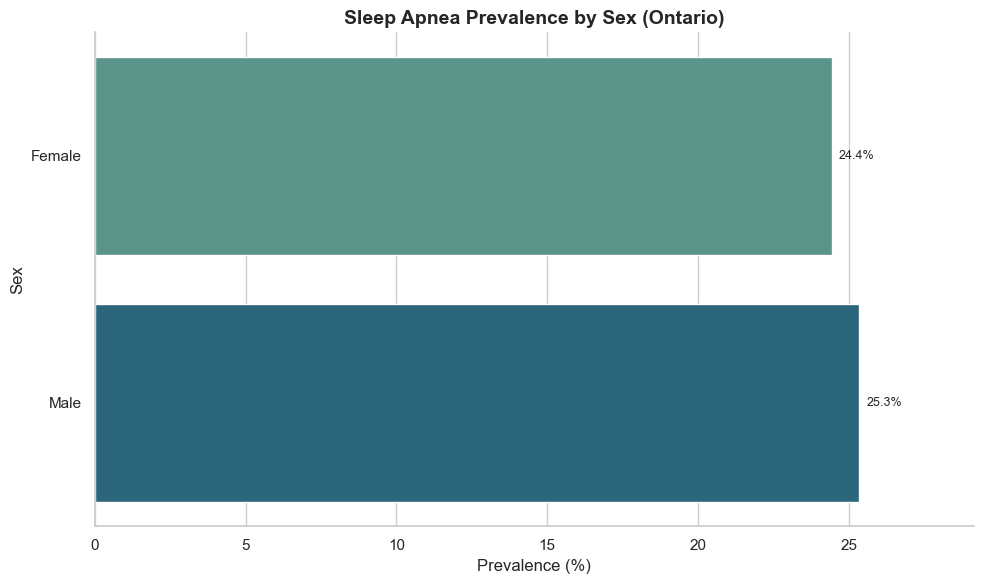


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       30.617284
1                  $20,000–39,999       33.865665
2                  $40,000–59,999       30.765902
3                  $60,000–79,999       27.005076
4                 $80,000 or more       19.553548

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


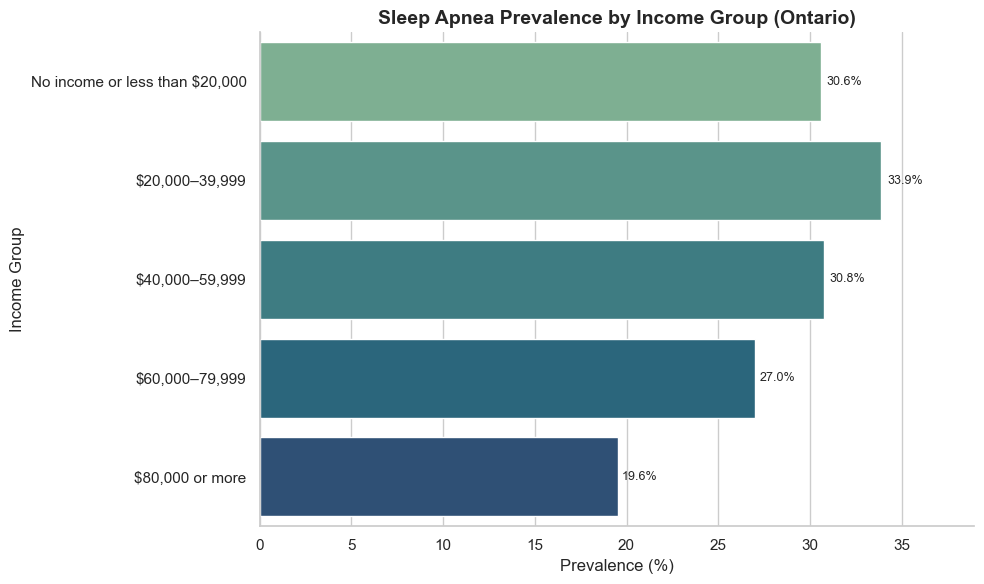


===== HIGH BLOOD PRESSURE (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.166113
1     18–34        1.285547
2     35–49        7.765957
3     50–64       28.565694
4       65+       52.827310

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


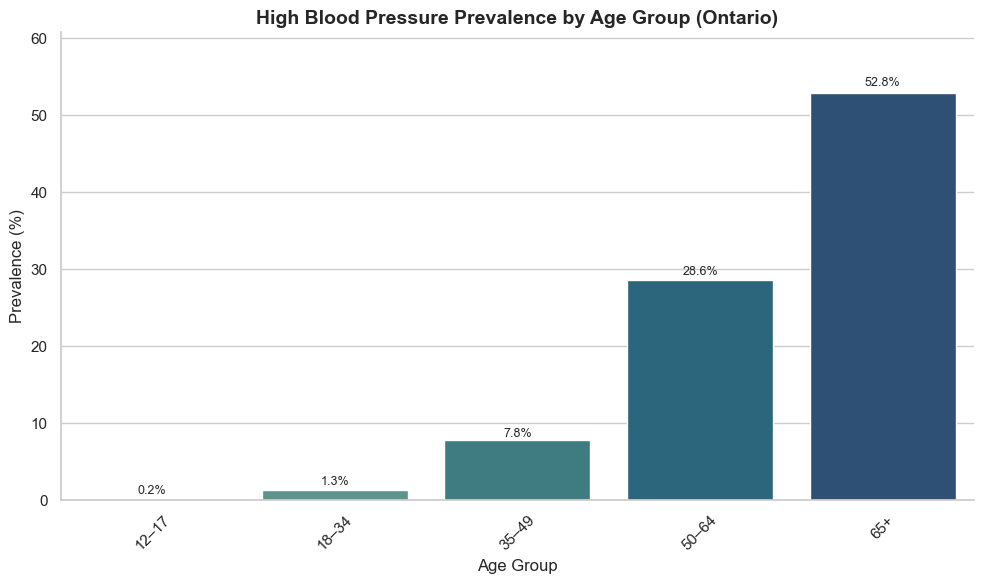


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       25.984821
1    Male       27.749480

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


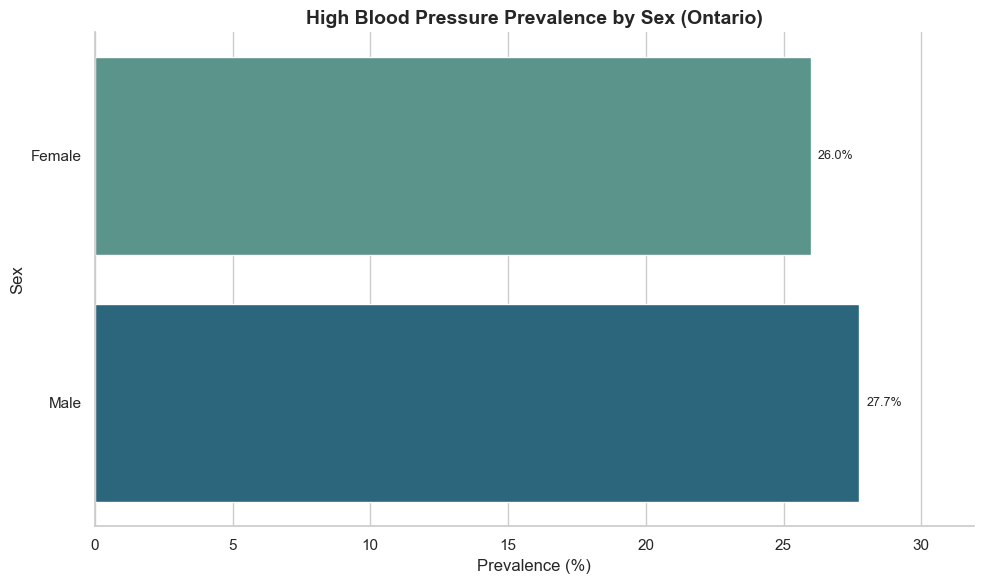


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       30.504305
1                  $20,000–39,999       37.802301
2                  $40,000–59,999       33.944756
3                  $60,000–79,999       30.002530
4                 $80,000 or more       20.661966

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


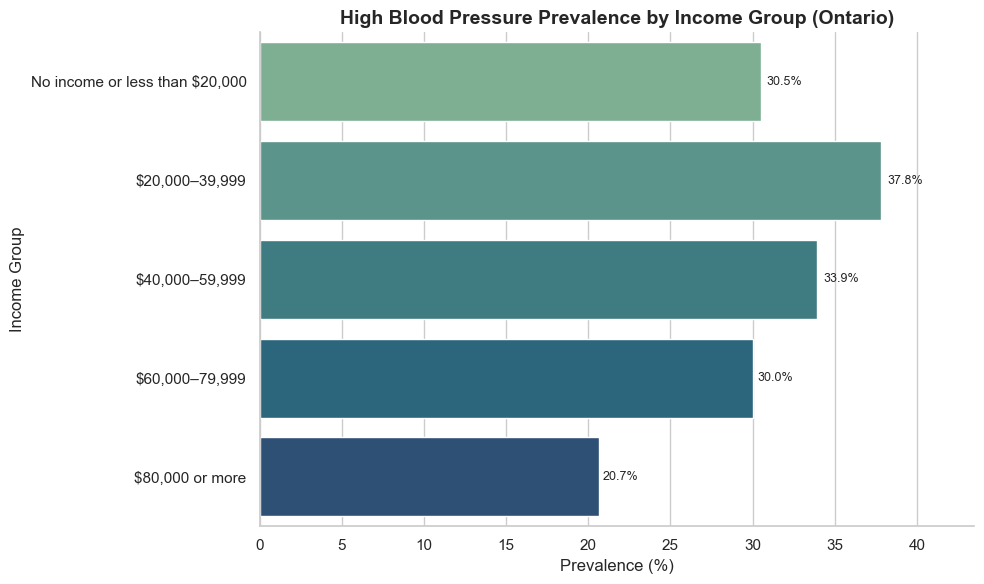


===== HIGH CHOLESTEROL (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     18–34        1.645768
1     35–49        6.456806
2     50–64       21.064721
3       65+       30.695467

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


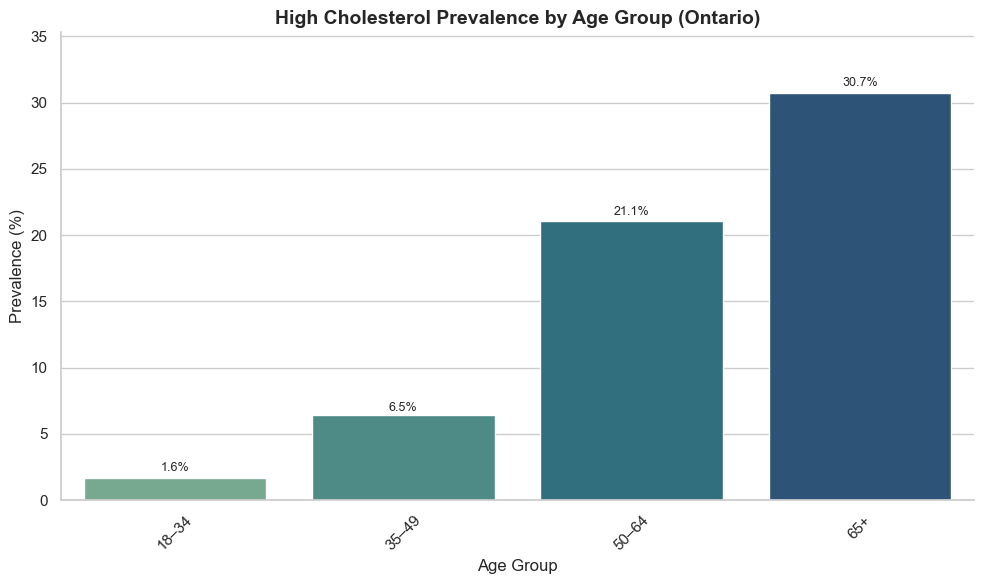


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       16.071429
1    Male       20.782758

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


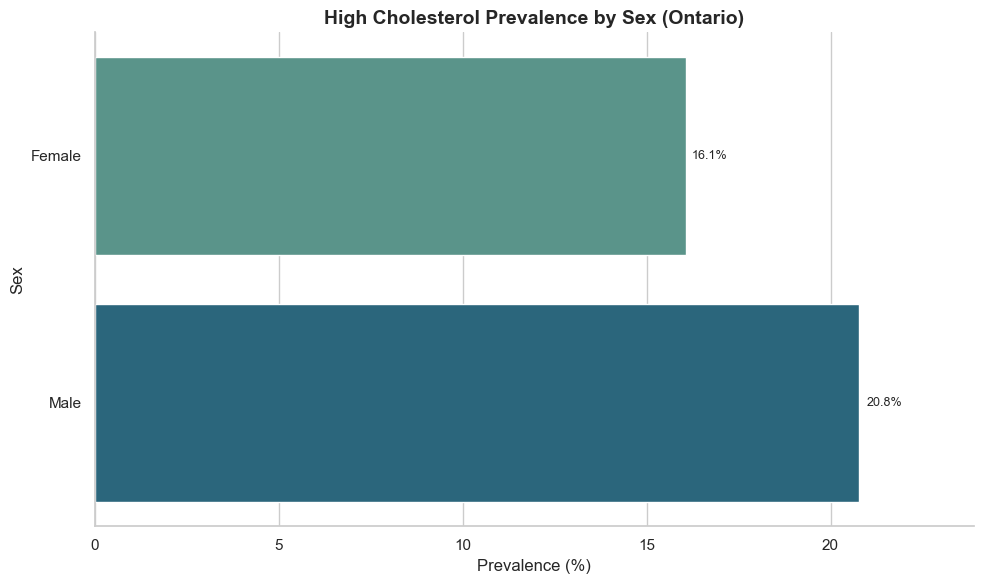


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       22.250804
1                  $20,000–39,999       22.459499
2                  $40,000–59,999       20.560325
3                  $60,000–79,999       19.967837
4                 $80,000 or more       15.478834

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


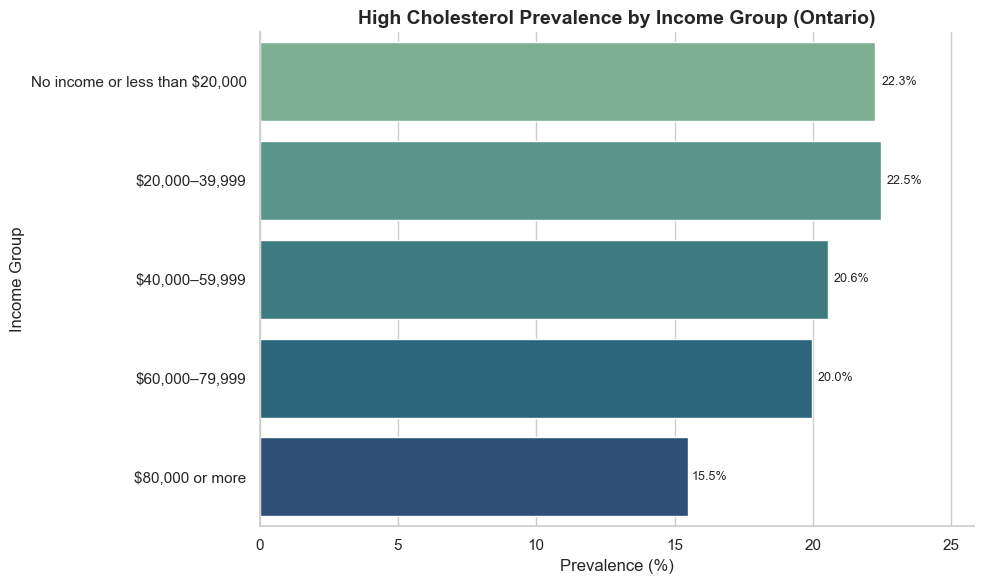


===== DIABETES (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.222841
1     18–34        0.474215
2     35–49        1.949708
3     50–64        8.323960
4       65+       17.434753

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


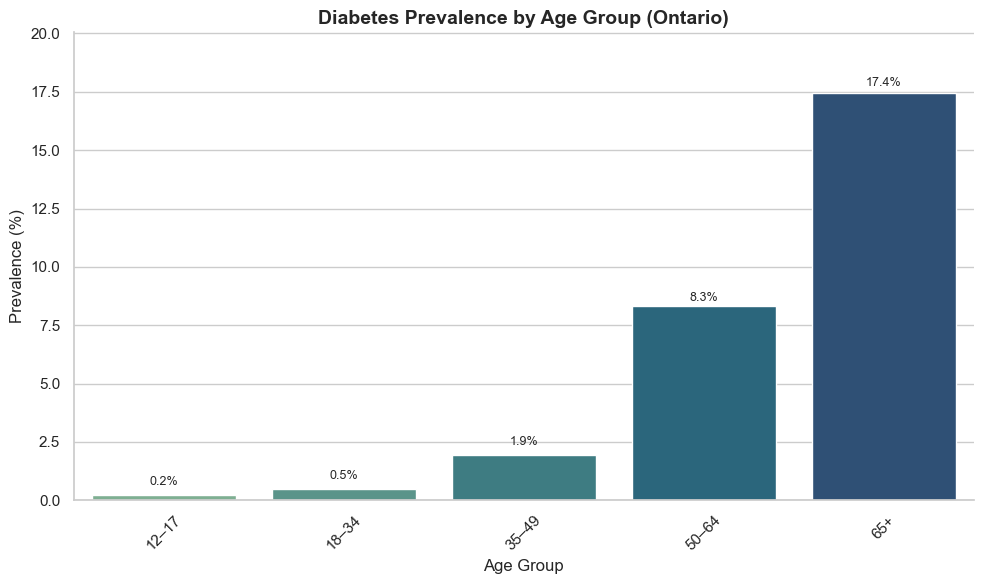


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female        7.231889
1    Male        9.972708

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


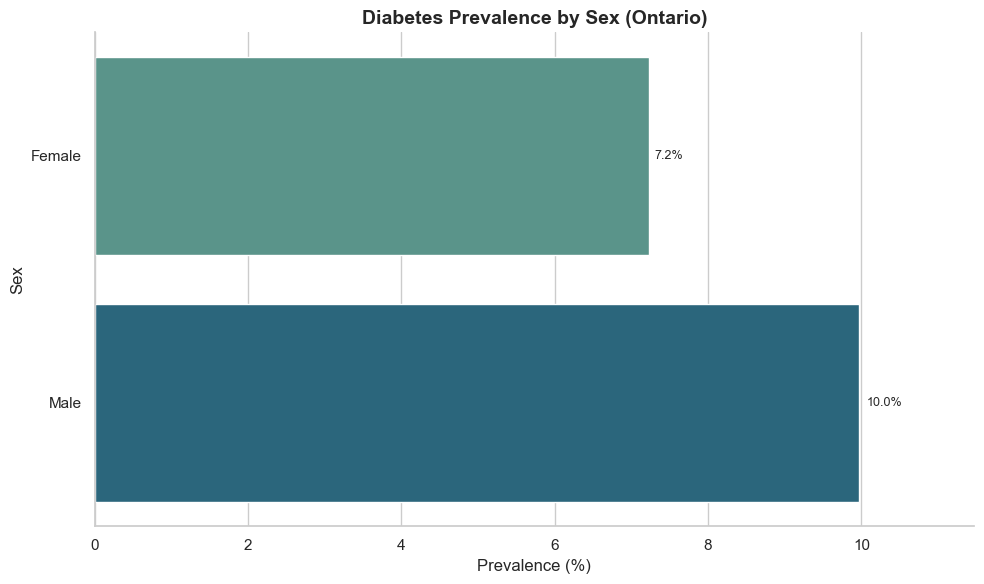


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       10.386152
1                  $20,000–39,999       13.383532
2                  $40,000–59,999       10.753166
3                  $60,000–79,999        9.575569
4                 $80,000 or more        6.166788

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


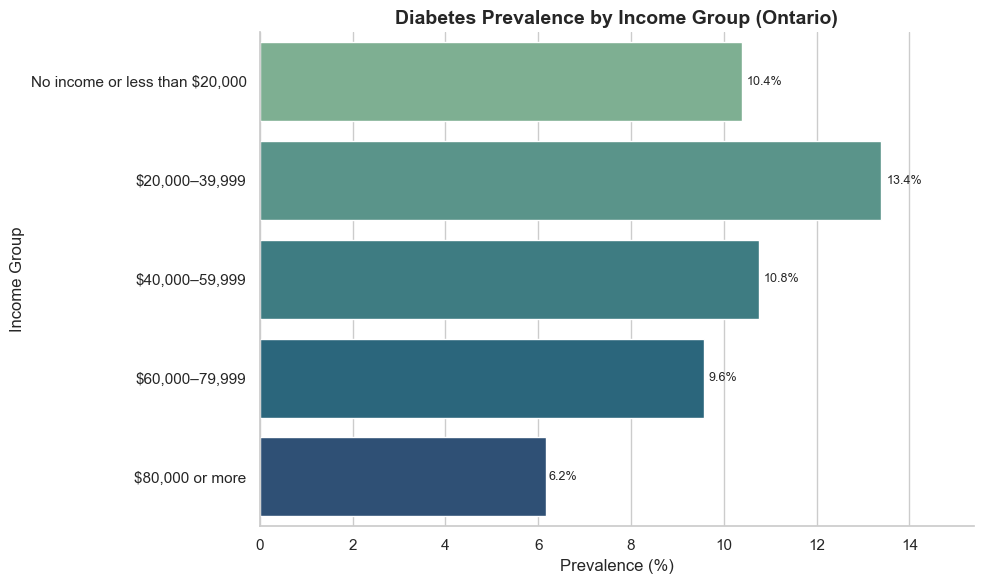


===== CHRONIC FATIGUE SYNDROME (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.333333
1     18–34        1.072543
2     35–49        1.774308
3     50–64        2.690043
4       65+        2.184698

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


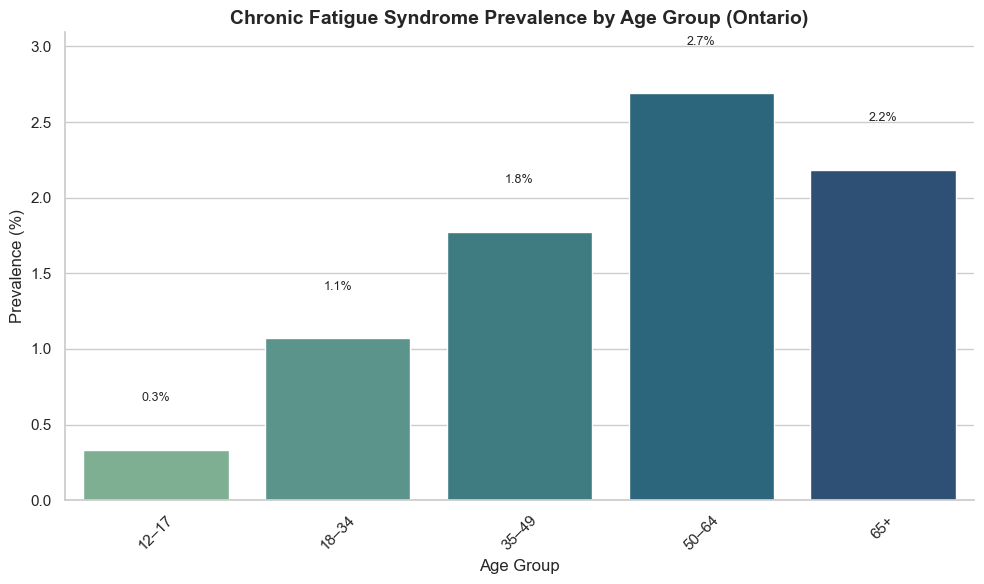


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female        2.447848
1    Male        1.327878

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


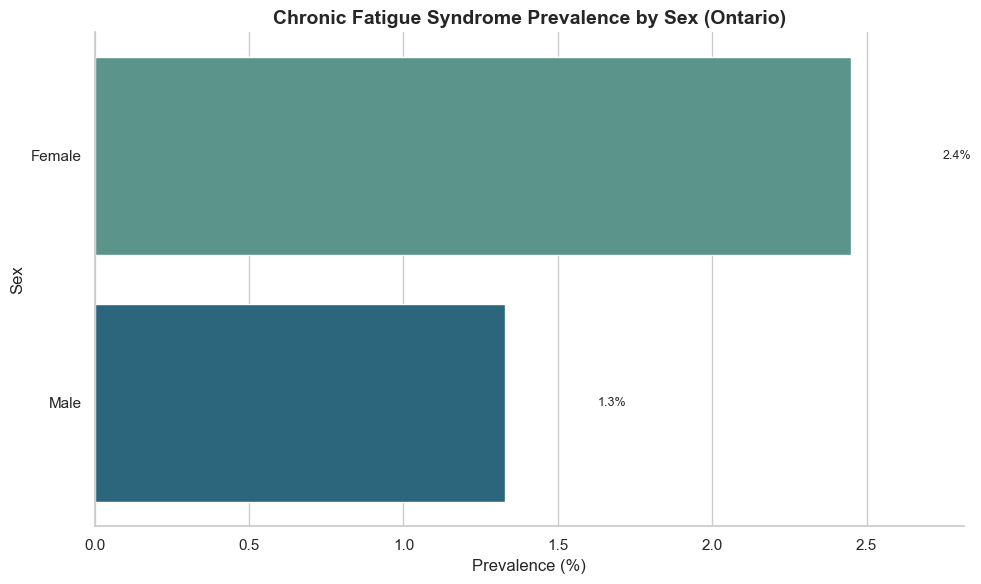


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000        5.415385
1                  $20,000–39,999        3.318428
2                  $40,000–59,999        2.095485
3                  $60,000–79,999        1.897773
4                 $80,000 or more        1.123229

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


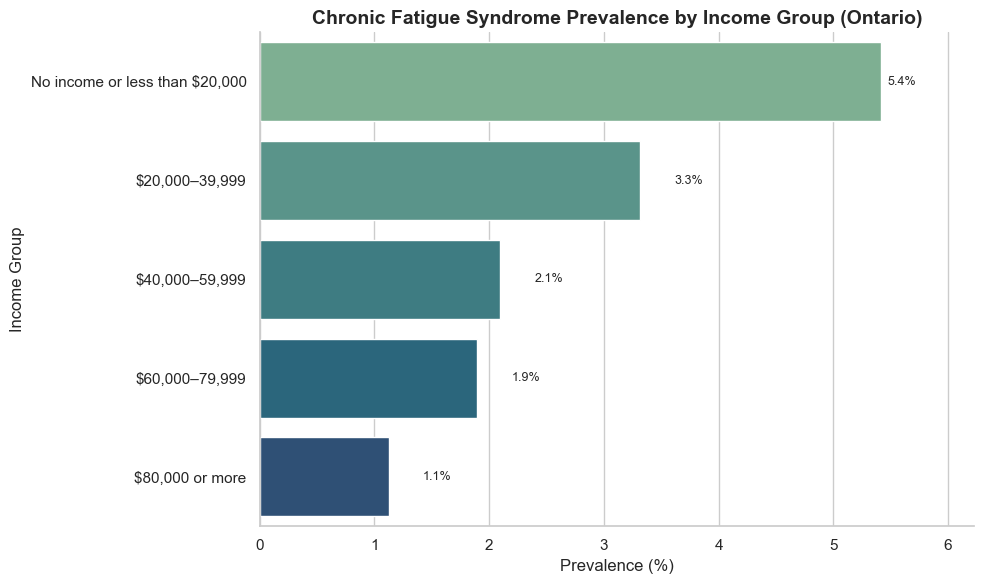


===== MOOD DISORDER (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        6.374723
1     18–34       14.090287
2     35–49       12.009238
3     50–64       13.202999
4       65+        7.608799

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


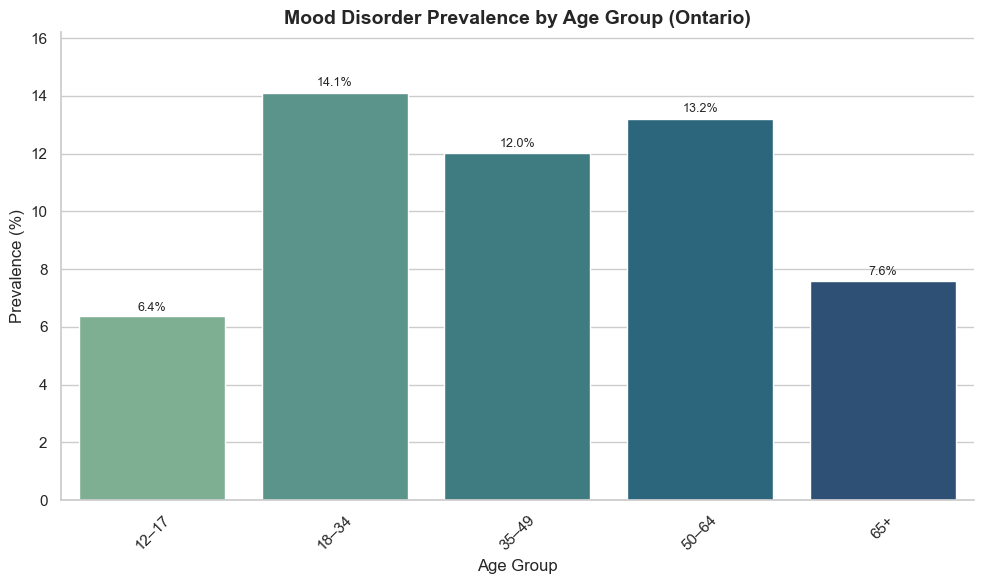


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       13.043478
1    Male        8.137199

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


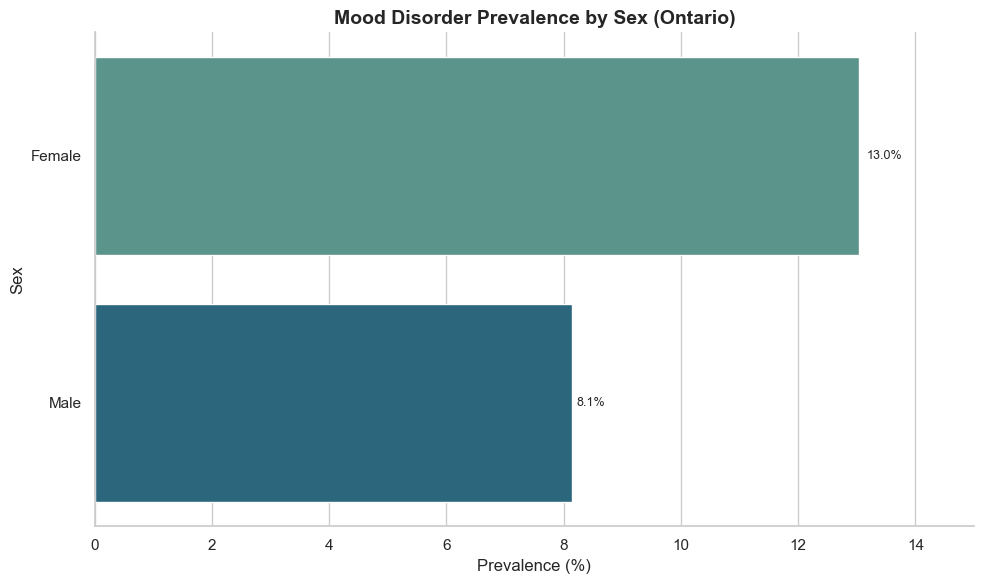


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       26.448829
1                  $20,000–39,999       14.332707
2                  $40,000–59,999       11.408816
3                  $60,000–79,999        9.723981
4                 $80,000 or more        8.016712

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


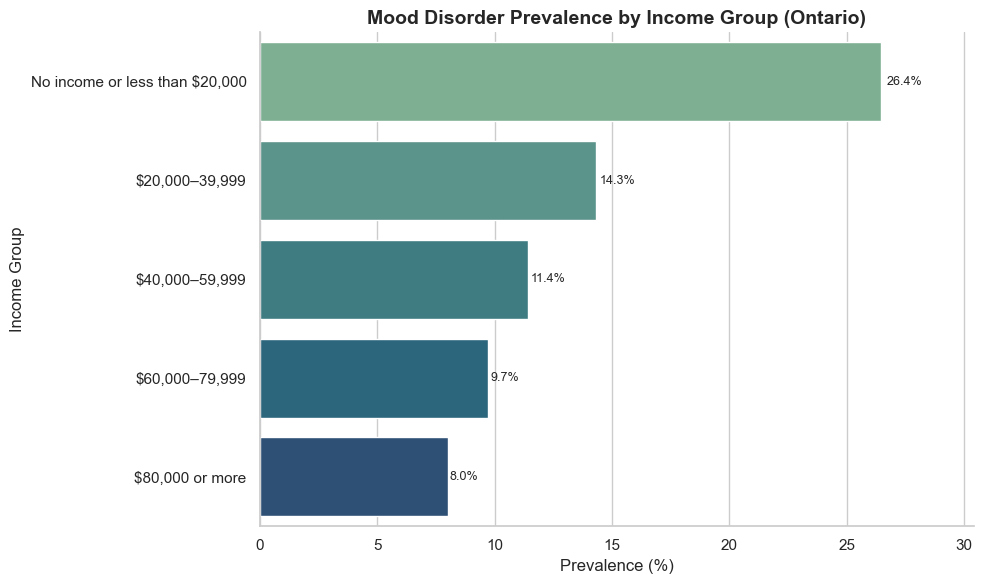


===== ANXIETY DISORDER (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17       11.555556
1     18–34       16.552801
2     35–49       12.566655
3     50–64       10.868692
4       65+        5.485192

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


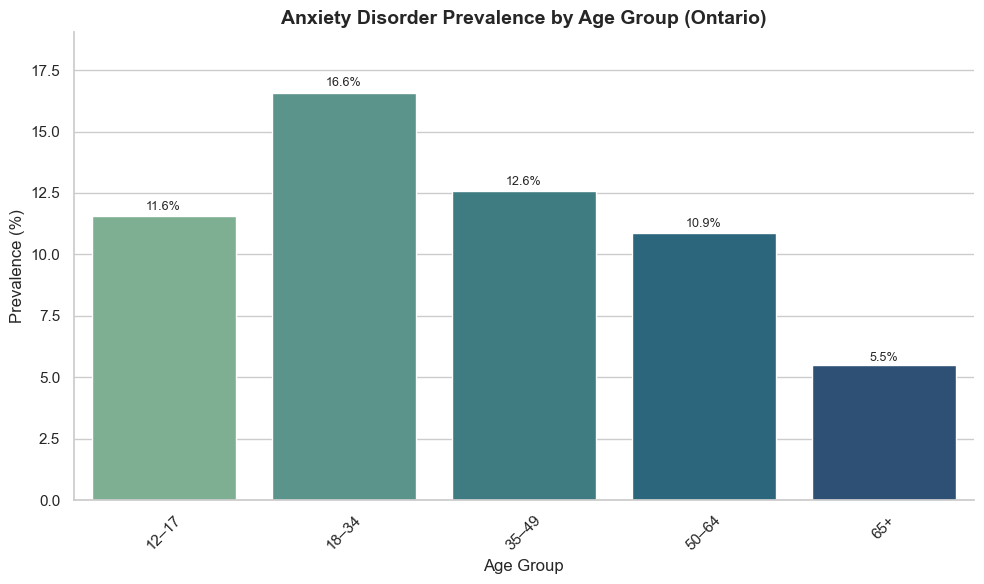


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       12.686837
1    Male        7.509513

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


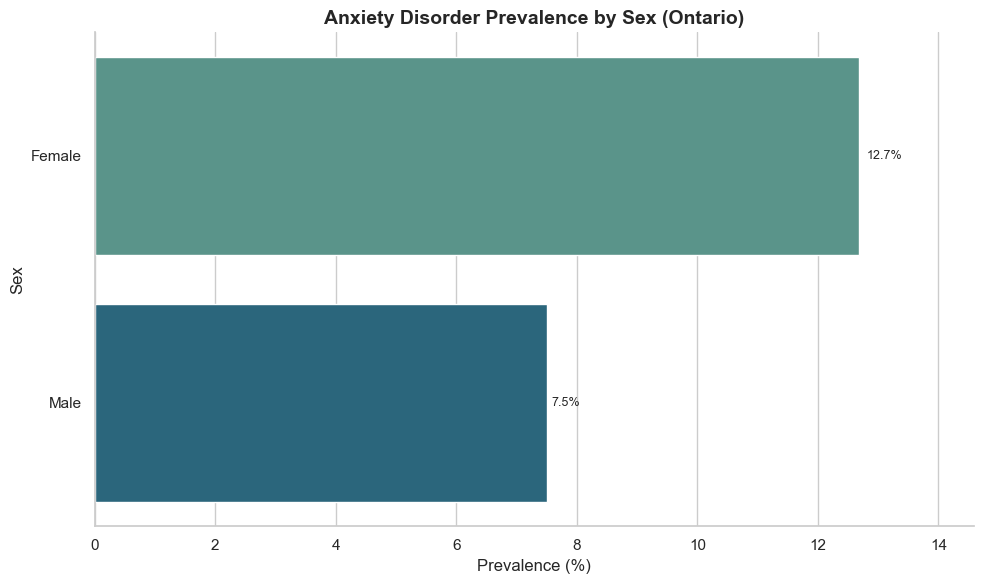


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       21.996303
1                  $20,000–39,999       12.875940
2                  $40,000–59,999       10.549070
3                  $60,000–79,999        8.826505
4                 $80,000 or more        8.424215

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


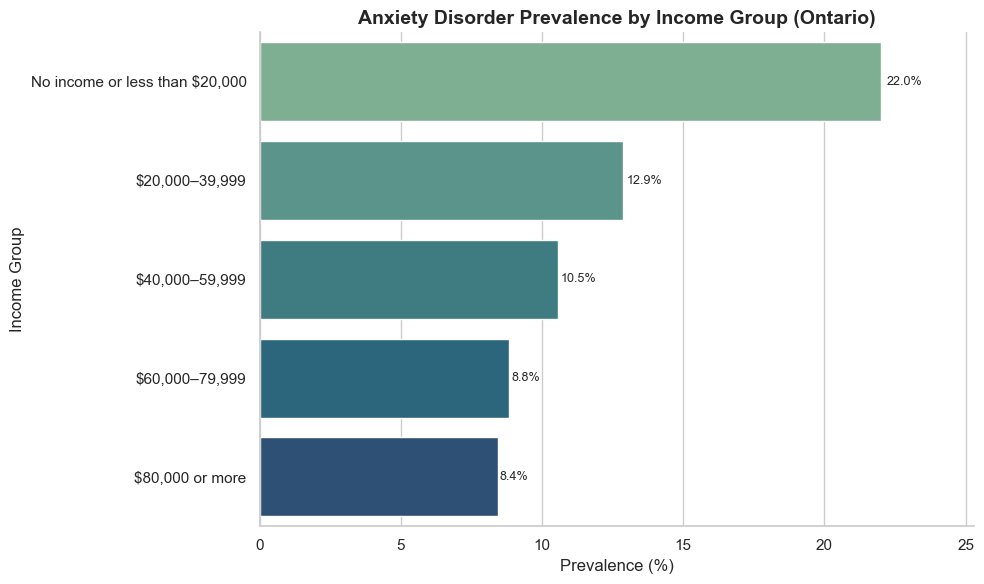


===== RESPIRATORY CONDITION (ASTHMA OR COPD) (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        7.642180
1     18–34        5.955335
2     35–49        4.474486
3     50–64        7.115302
4       65+        9.983913

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


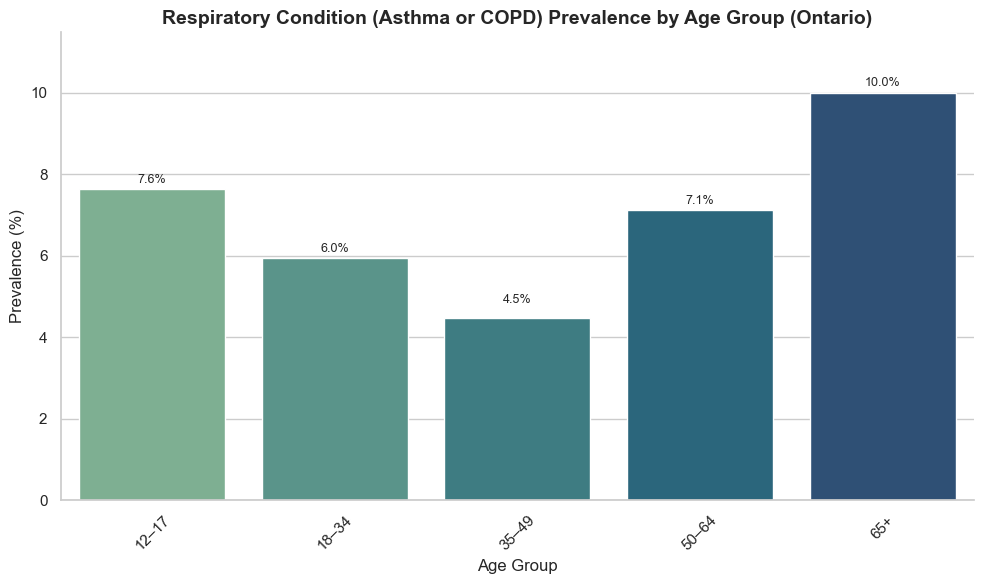


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female        9.136181
1    Male        5.452596

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


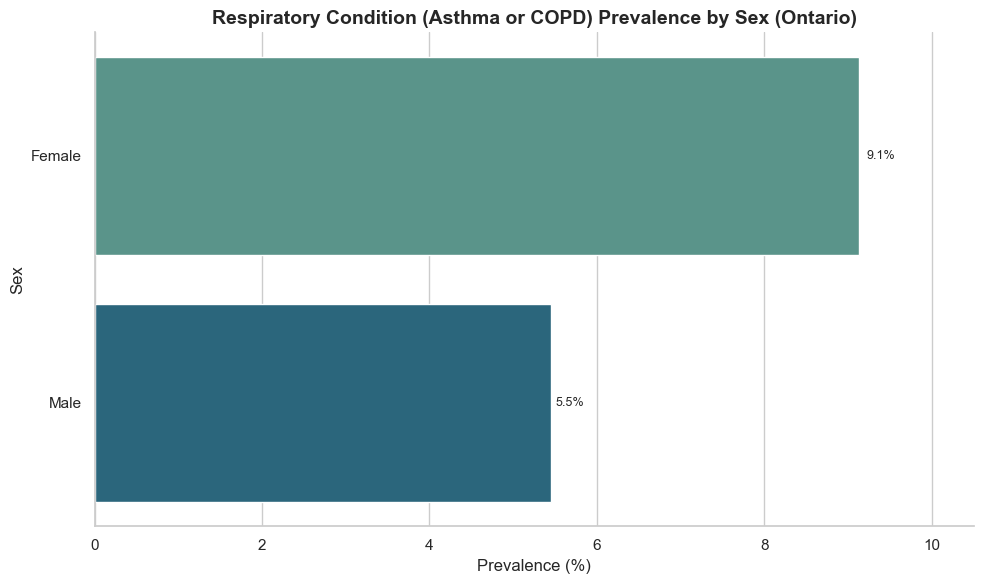


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       10.249110
1                  $20,000–39,999       10.245273
2                  $40,000–59,999        8.567480
3                  $60,000–79,999        7.562801
4                 $80,000 or more        6.248300

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


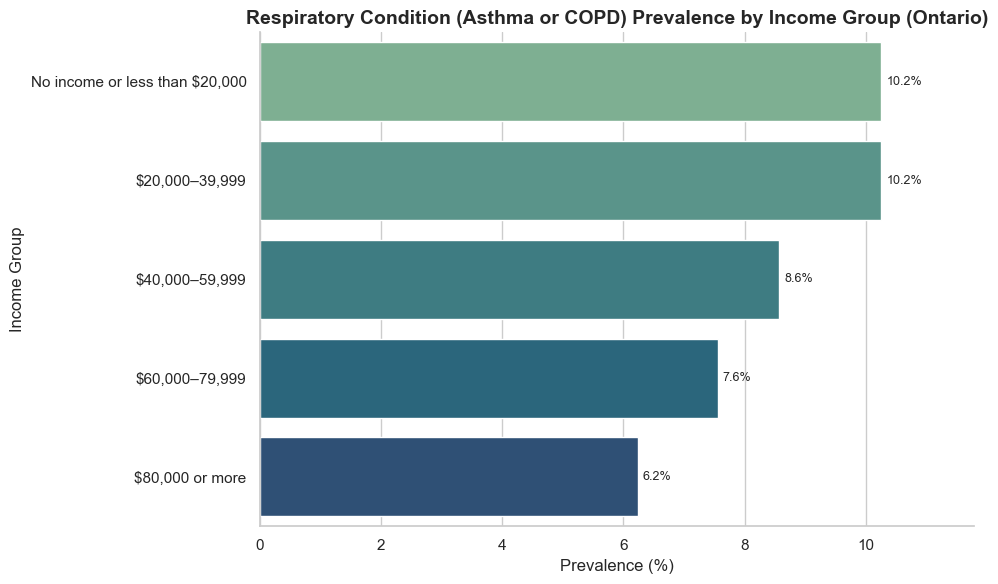


===== MUSCULOSKELETAL CONDITION (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     18–34        1.583435
1     35–49        7.790965
2     50–64       33.680947
3       65+       55.317034

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


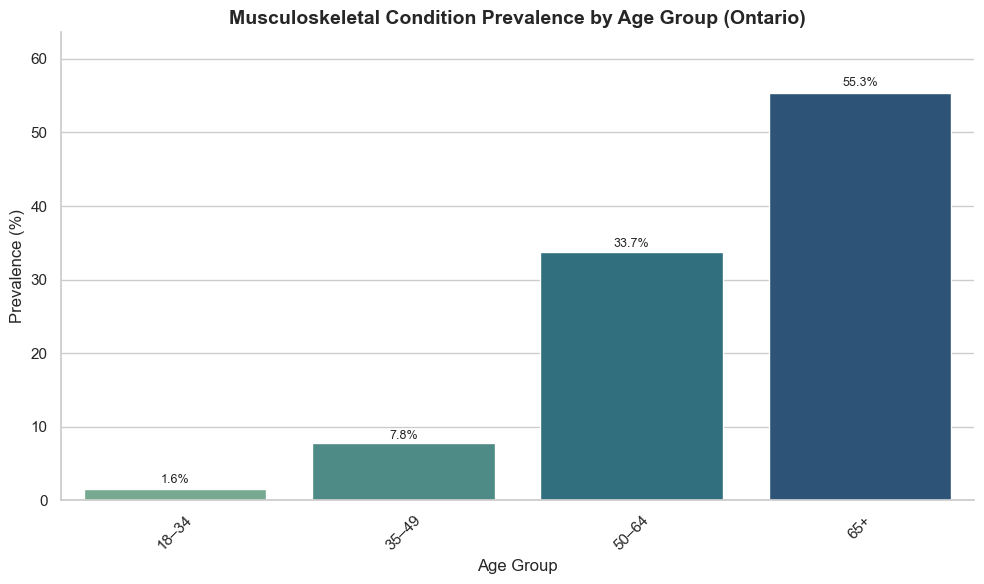


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female       37.145153
1    Male       23.383446

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


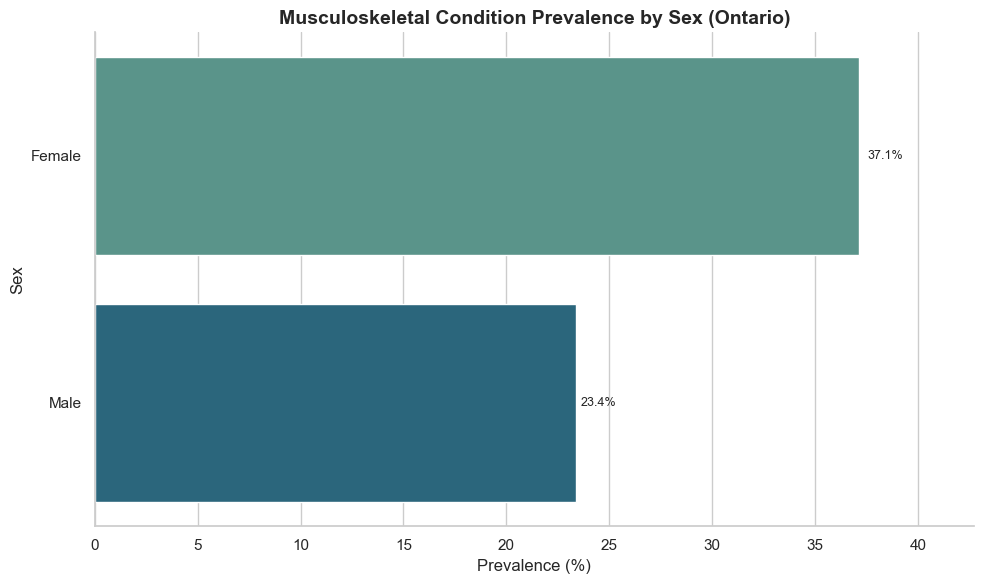


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000       40.380550
1                  $20,000–39,999       44.099379
2                  $40,000–59,999       38.582492
3                  $60,000–79,999       32.366071
4                 $80,000 or more       23.790619

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


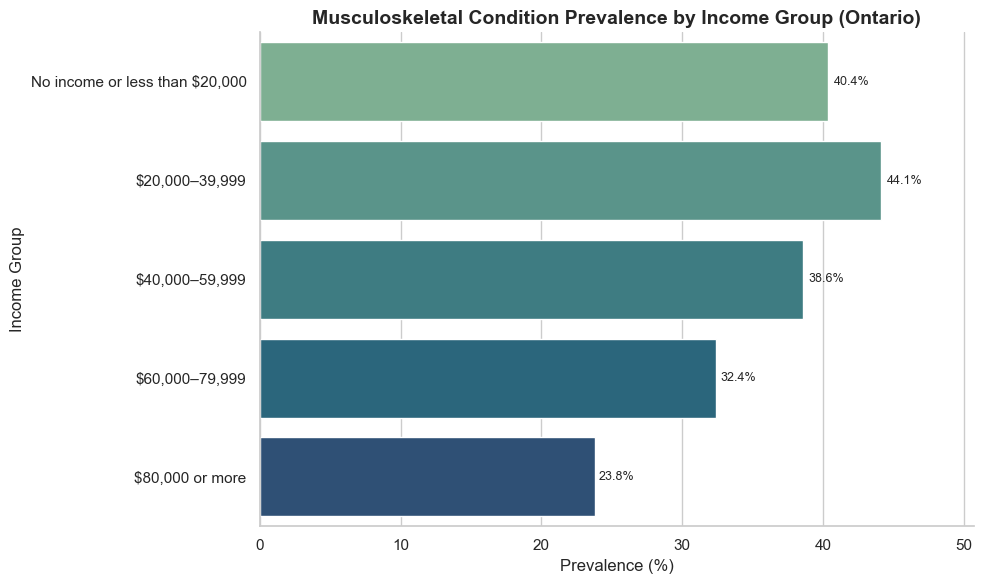


===== CARDIOVASCULAR CONDITION (Ontario Only) =====

--- Ontario Prevalence by Age Group ---


Age Group  Prevalence (%)
0     12–17        0.504202
1     18–34        0.397614
2     35–49        0.366972
3     50–64        3.486212
4       65+       19.974201

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


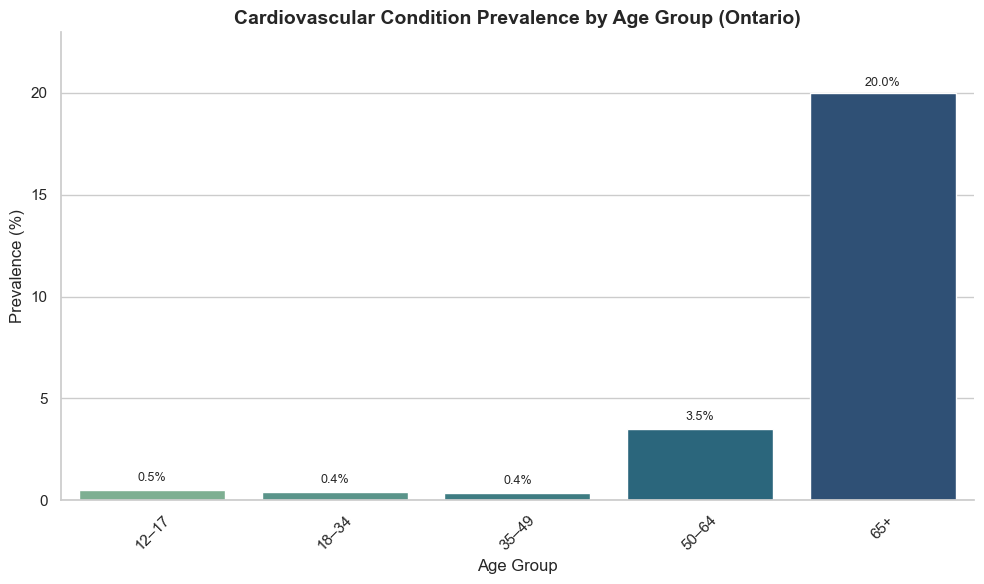


--- Ontario Prevalence by Sex ---


Sex  Prevalence (%)
0  Female        6.143089
1    Male        9.921945

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


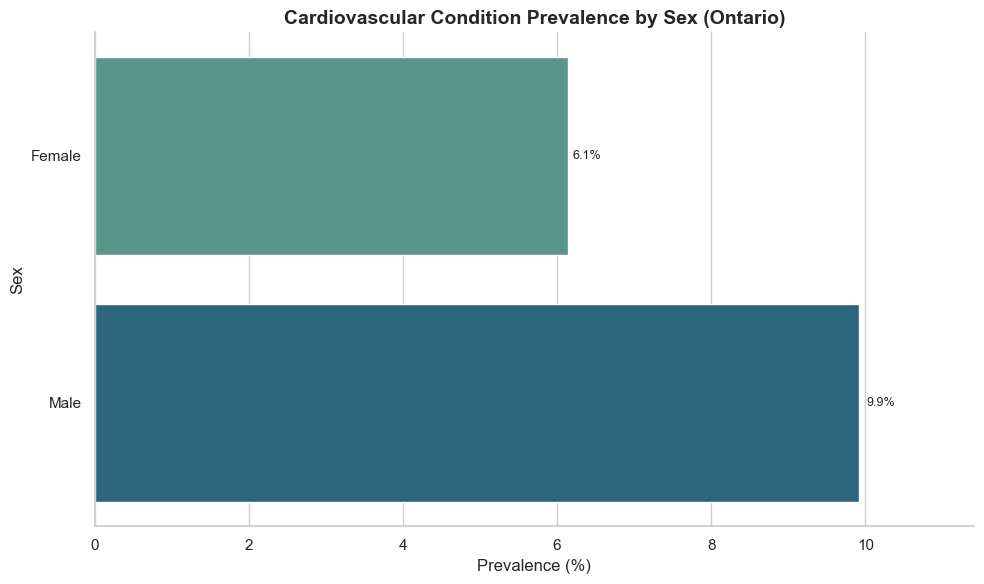


--- Ontario Prevalence by Income Group ---


Income Group  Prevalence (%)
0  No income or less than $20,000        8.214528
1                  $20,000–39,999       13.021745
2                  $40,000–59,999       10.615281
3                  $60,000–79,999        9.105222
4                 $80,000 or more        5.416611

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\3257842167.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


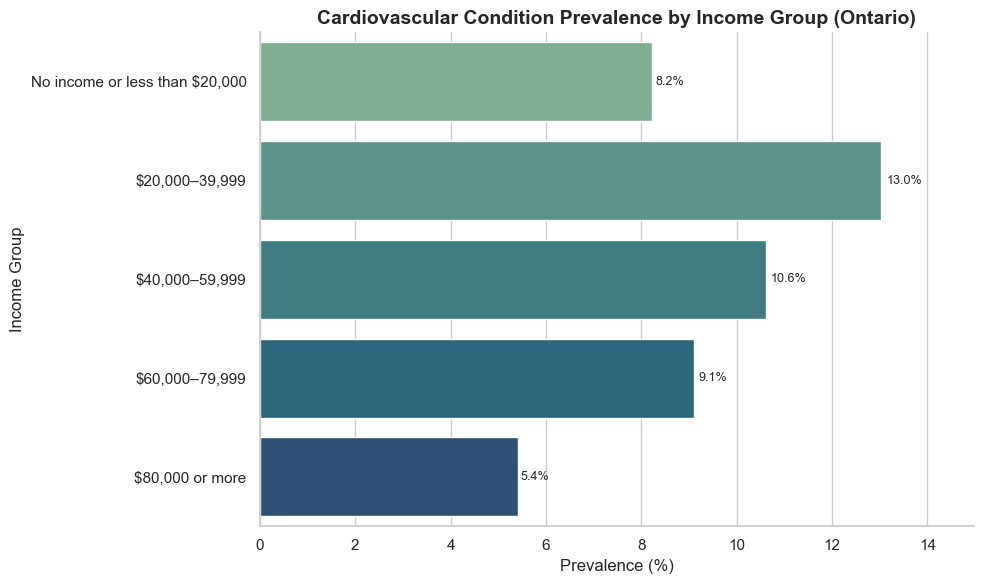

In [6]:
# 📊 1. Set Seaborn's style to a white grid
# This makes all plots have a clean white background with helpful grid lines
sns.set_theme(style="whitegrid")

# 📁 2. Create a subfolder for Ontario-level visualizations
# os.path.join safely joins parts of file paths (works across Windows/Mac/Linux)
ontario_folder = os.path.join(save_dir, 'Ontario_Level')

# 🛠️ 3. Make sure the folder exists, and if not, create it
os.makedirs(ontario_folder, exist_ok=True)

# 📦 4. Prepare an empty dictionary to store results for all chronic conditions
ontario_results = {}

# 🔁 5. Loop through each chronic condition like Diabetes, Asthma, etc.
for cond_name, cond_code in conditions.items():
    print(f"\n===== {cond_name.upper()} (Ontario Only) =====")

    # This will hold stratified results for this specific condition
    cond_results = {}

    # 🔄 6. Loop through each demographic group (Age, Sex, Income only; skip Province)
    for group_col, label_map, group_order, label_name in stratifications:
        if label_name == 'Province':
            continue  # Skip Province for Ontario-only charts

        try:
            # ✅ 7. Calculate prevalence (%) for each demographic group
            result = stratify_prevalence(
                df=df_ontario,              # Use only Ontario-level data
                condition_col=cond_code,    # Column for this chronic condition (1=Yes, 2=No)
                group_col=group_col,        # Column to group by (e.g., age, sex)
                label_map=label_map,        # Dictionary that converts codes to readable labels
                group_order=group_order,    # Order the labels should appear in
                label_name=label_name       # Column name to show in charts
            )

            # 📏 8. Reorder by group order only for present values
            if group_order:
                present_labels = [label for label in group_order if label in result[label_name].values]
                result[label_name] = pd.Categorical(result[label_name], categories=present_labels, ordered=True)
                result = result.sort_values(label_name)

            # 🧹 9. Drop any group where prevalence is 0% (e.g., 12–19 for cholesterol)
            result = result[result['Prevalence (%)'] > 0]

            # Save the cleaned result for this group
            cond_results[label_name] = result

            # Show result table in the notebook
            print(f"\n--- Ontario Prevalence by {label_name} ---")
            display(result)

            # 📐 10. Start a new plot with fixed size
            plt.figure(figsize=(10, 6))

            # 🚫 Remove all existing gridlines and set clean grid manually
            plt.grid(False)
            ax = plt.gca()
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(True)
            ax.spines['bottom'].set_visible(True)

            # ✅ Manually add gridlines only for major axis (y for horizontal, x for vertical)
            if label_name in ["Sex", "Income Group"]:
                ax.xaxis.grid(True)
                ax.yaxis.grid(False)
            else:
                ax.yaxis.grid(True)
                ax.xaxis.grid(False)

            # 📊 11. Choose plot direction: horizontal for sex/income, else vertical
            if label_name in ["Sex", "Income Group"]:
                # Horizontal barplot
                ax = sns.barplot(
                    data=result,
                    y=label_name,
                    x='Prevalence (%)',
                    palette='crest'
                )

                # 🧾 Add percentage labels beside each bar
                for bar in ax.patches:
                    width = bar.get_width()
                    if pd.notna(width) and width > 0:
                        offset = width * 0.01 if width > 5 else 0.3
                        ax.text(
                            width + offset,
                            bar.get_y() + bar.get_height() / 2,
                            f"{width:.1f}%",
                            ha='left', va='center', fontsize=9
                        )

                plt.xlabel("Prevalence (%)")
                plt.ylabel(label_name)

                max_width = result['Prevalence (%)'].max()
                plt.xlim(0, max_width * 1.15)

            else:
                # Vertical barplot (used for Age Group usually)
                ax = sns.barplot(
                    data=result,
                    x=label_name,
                    y='Prevalence (%)',
                    palette='crest'
                )

                # 🧾 Add % labels above bars
                for bar in ax.patches:
                    height = bar.get_height()
                    if pd.notna(height) and height > 0:
                        offset = height * 0.01 if height > 5 else 0.3
                        ax.text(
                            bar.get_x() + bar.get_width() / 2,
                            height + offset,
                            f"{height:.1f}%",
                            ha='center', va='bottom', fontsize=9
                        )

                plt.xlabel(label_name)
                plt.ylabel("Prevalence (%)")
                plt.xticks(rotation=45)

                max_height = result['Prevalence (%)'].max()
                plt.ylim(0, max_height * 1.15)

            # 🏷️ 12. Add a clear, bold title
            plt.title(f"{cond_name} Prevalence by {label_name} (Ontario)", fontsize=14, weight='bold')

            # 📐 13. Adjust layout to prevent clipping of titles/labels
            plt.tight_layout()

            # 💾 14. Save the figure using clean filename format
            filename = f"{cond_name.replace(' ', '_')}_by_{label_name.replace(' ', '_')}_Ontario.png"
            save_path = os.path.join(ontario_folder, filename)
            plt.savefig(save_path, dpi=300, bbox_inches='tight')

            # 👁️ 15. Display the chart in the notebook
            plt.show()

        # 🧯 16. Handle errors without breaking the whole loop
        except Exception as e:
            print(f"❌ Ontario-specific: {cond_name} by {label_name}: {e}")

    # 💾 17. Save all results for this condition in the master dictionary
    ontario_results[cond_name] = cond_results


## Conclusion for Ontario

This focused analysis of the CCHS dataset for Ontario has successfully identified key provincial health trends and highlighted areas where Ontario's profile differs from the national average.

* **A Unique Provincial Health Profile:** Ontario performs at or slightly better than the national average for most major **physical chronic conditions**, including cardiovascular disease and high cholesterol. However, the province faces a significantly **higher-than-average burden of mental health conditions**, specifically **Anxiety** and **Mood Disorders**.

* **Key Demographic Drivers:** Within the province, **age, sex, and income** remain powerful determinants of health. The "dual challenge" persists, with physical ailments disproportionately impacting older Ontarians and mental health conditions affecting the young. The socioeconomic gradient is also stark, with lower-income individuals showing higher prevalence across nearly all conditions.

* **Pathways for Provincial Action:** These insights are directly applicable for shaping **province-specific public health strategies**. The findings can guide resource allocation, justify targeted mental health initiatives, and serve as a foundation for building predictive models tailored to Ontario's unique demographic and health landscape.

By drilling down to the provincial level, this EDA provides a more granular and actionable understanding of Ontario's specific public health priorities.

## 🆚 **ONTARIO vs NATIONAL COMPARISON VISUALIZATIONS**

This section **compares the prevalence** of each major **chronic condition** in:

**All of Canada**, versus  
**Ontario only**

using barplots across key demographic categories:

### 📊 Stratification Dimensions:
- 🧑‍ Age Group  
- 🚻 Sex  
- 💰 Income Group

Each chart will help us **visually compare how Ontario differs from the national average** for every condition.


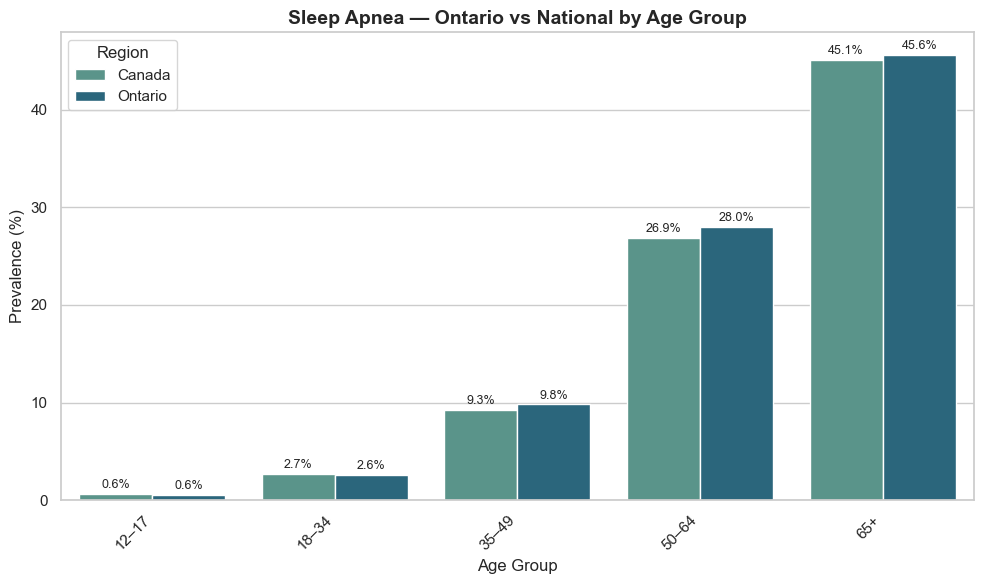

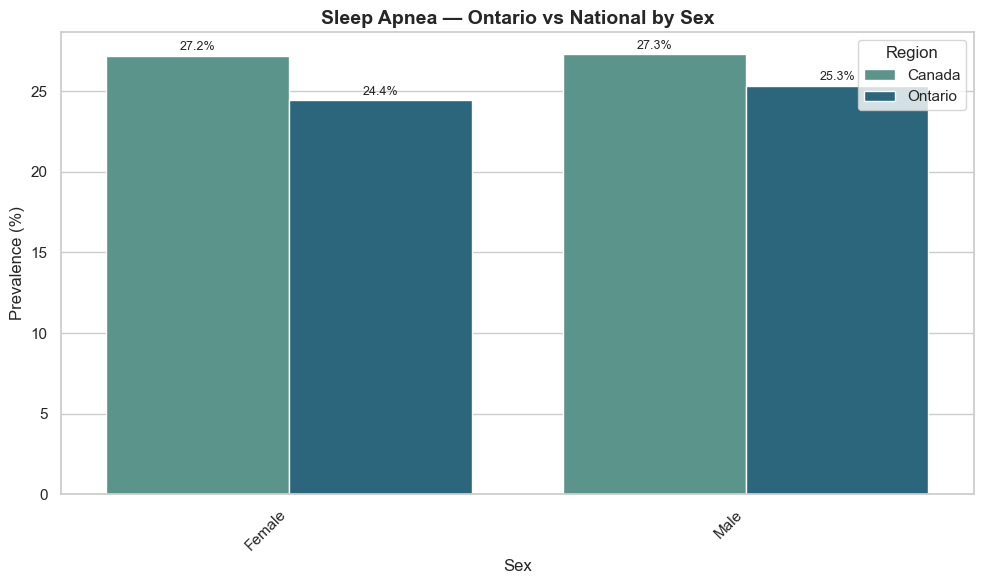

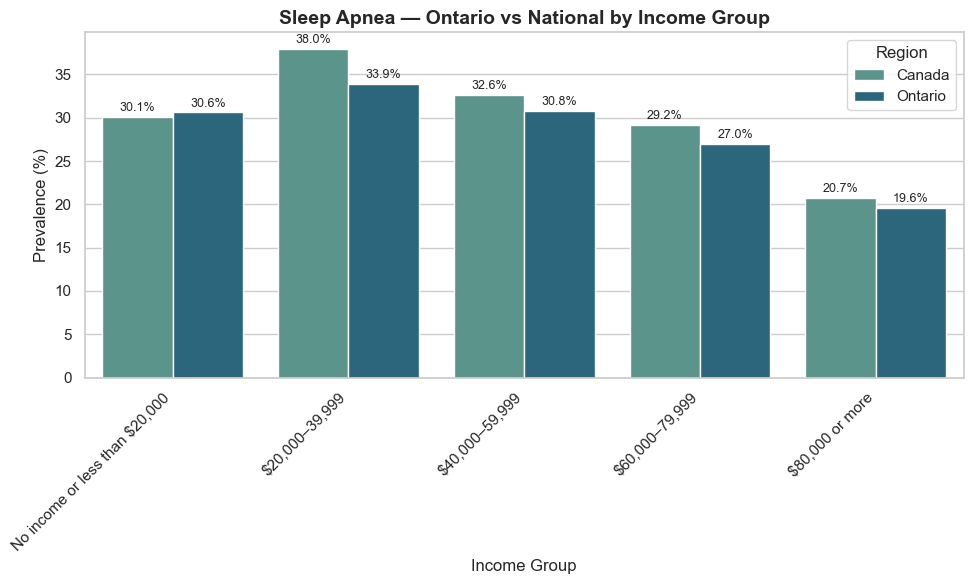

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


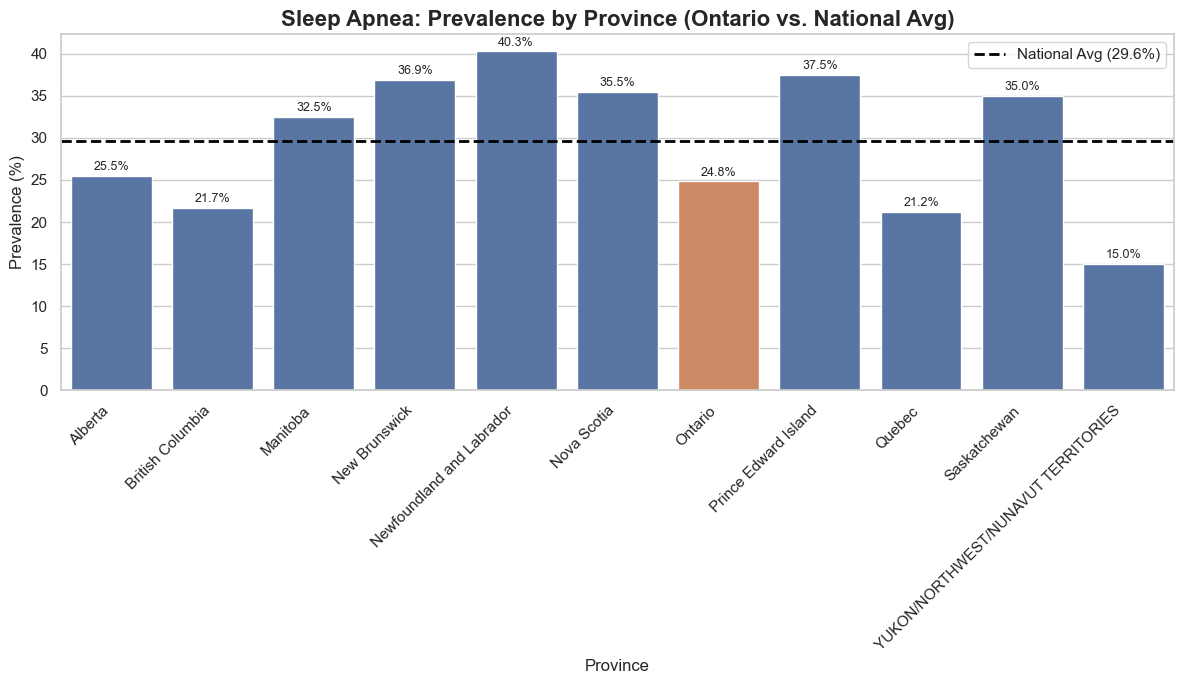

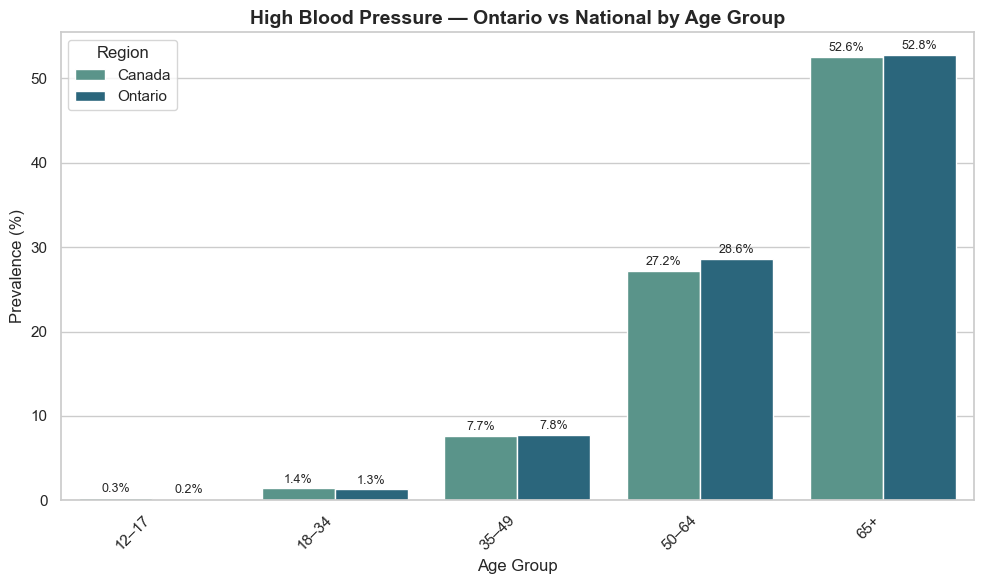

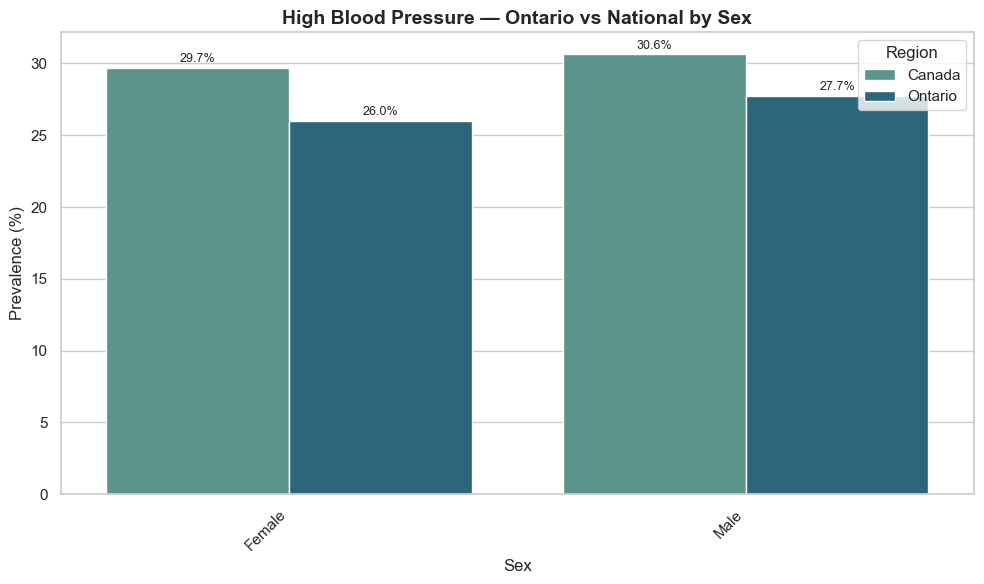

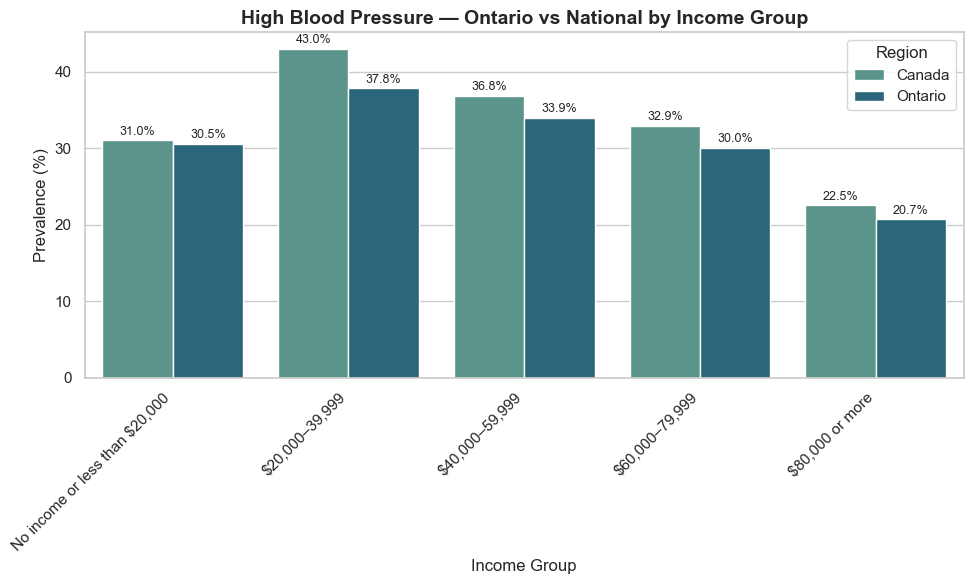

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


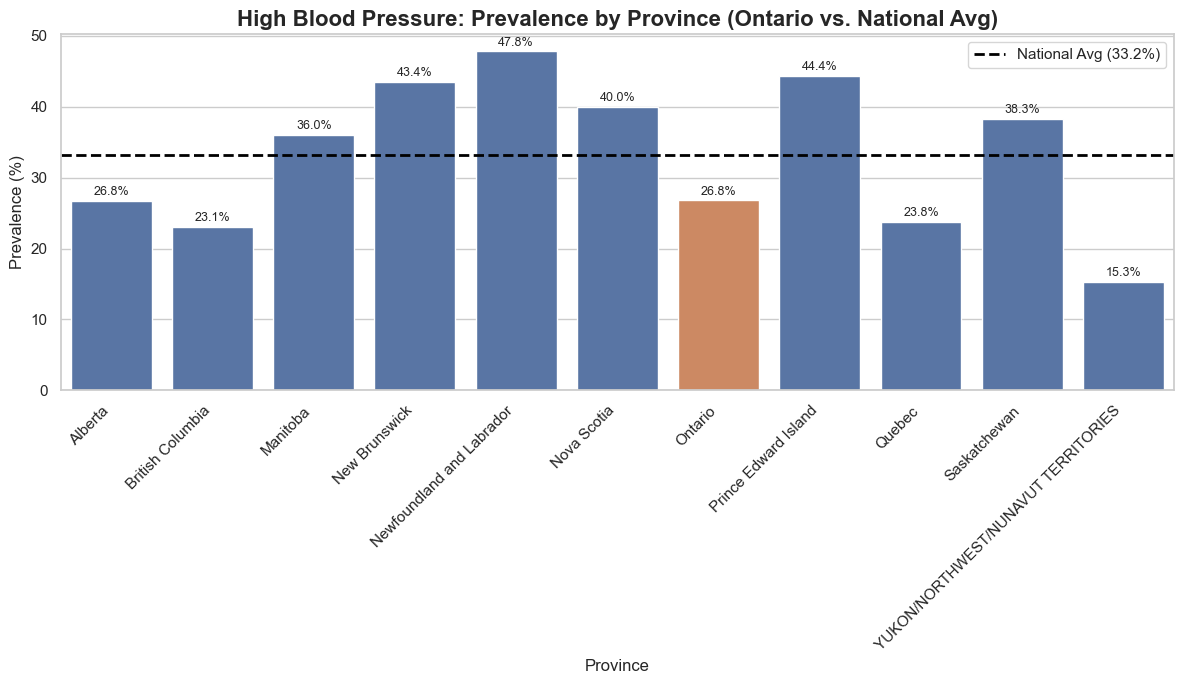

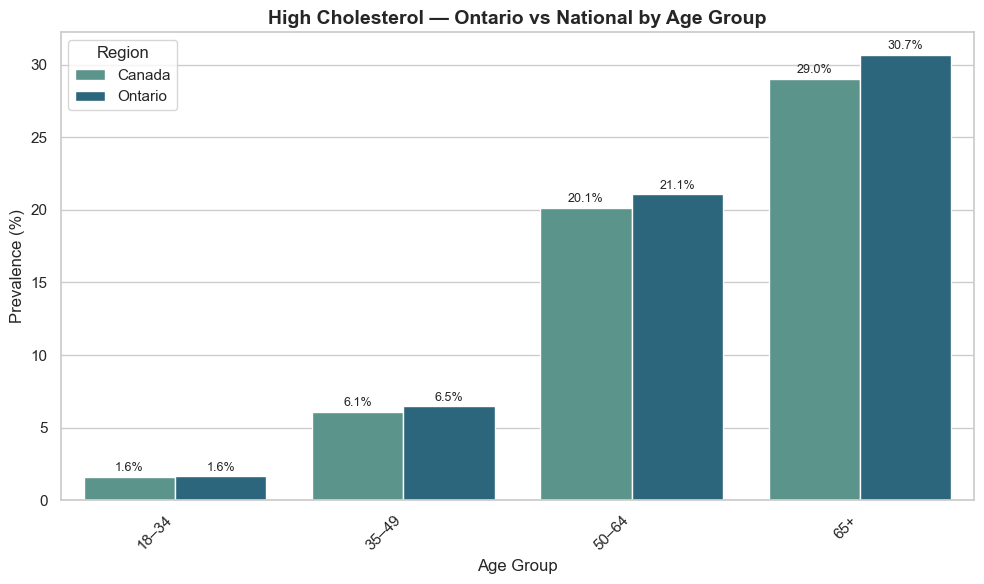

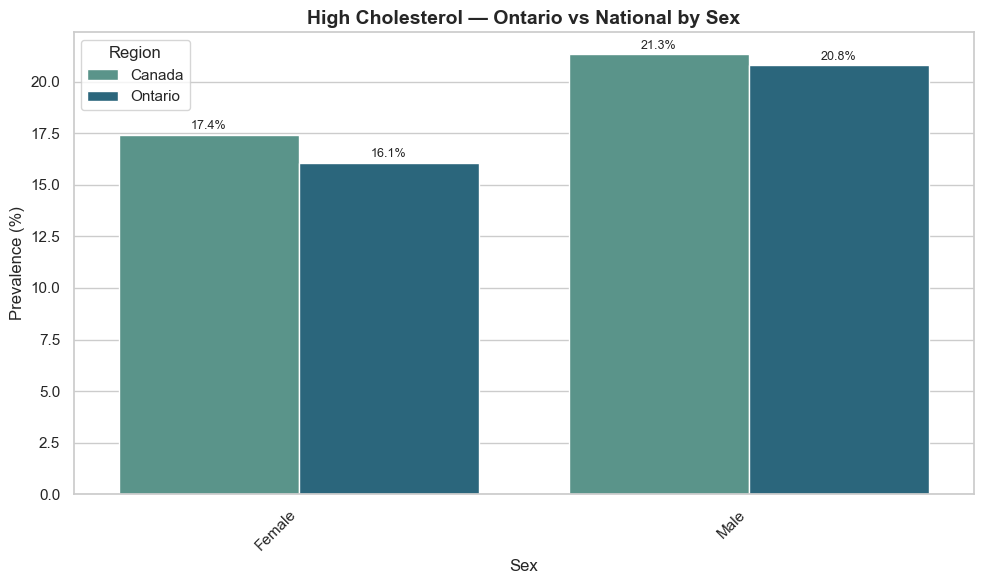

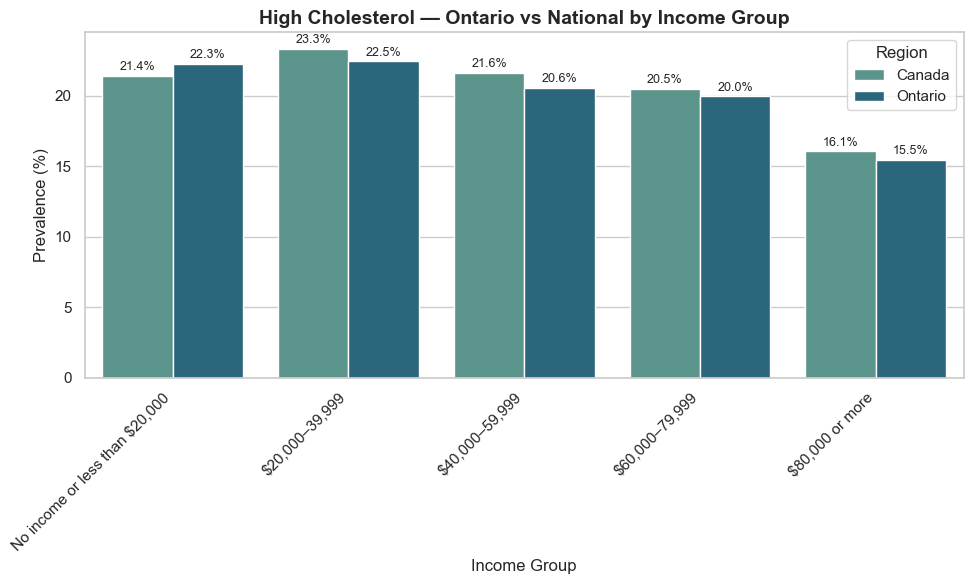

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


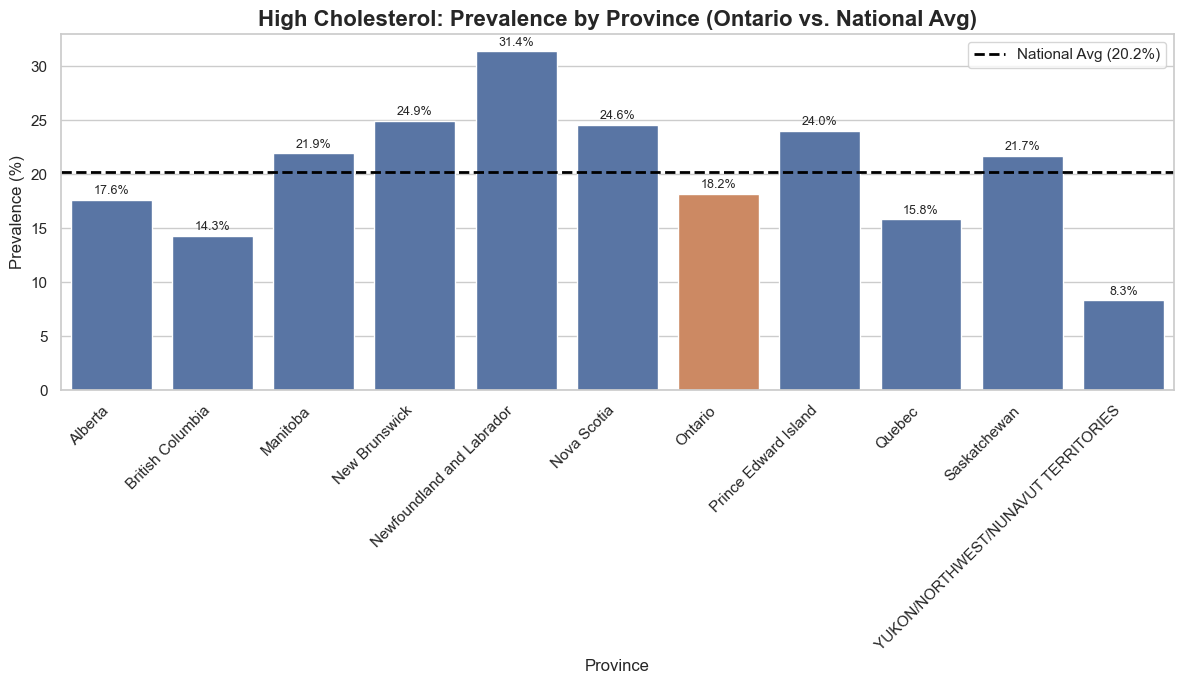

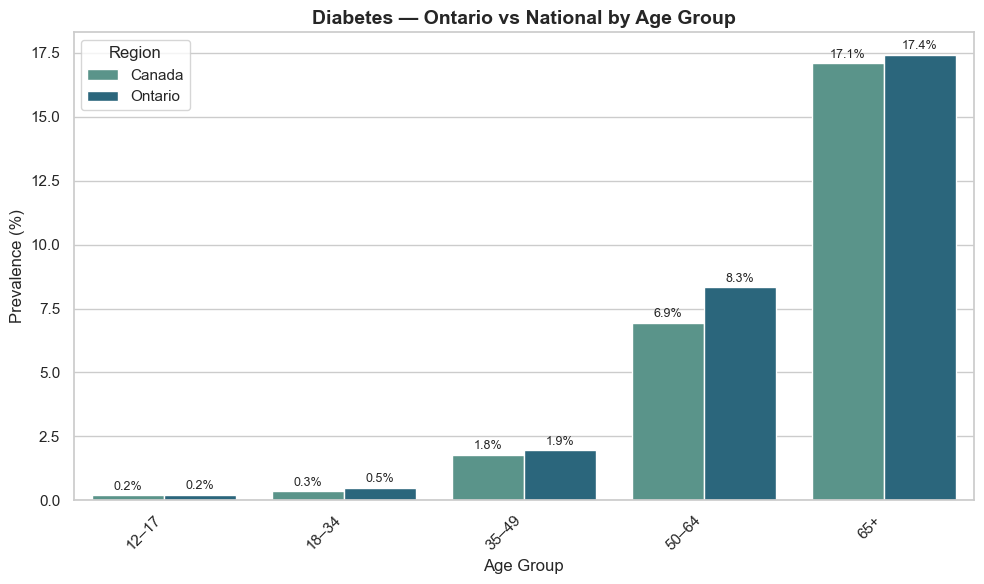

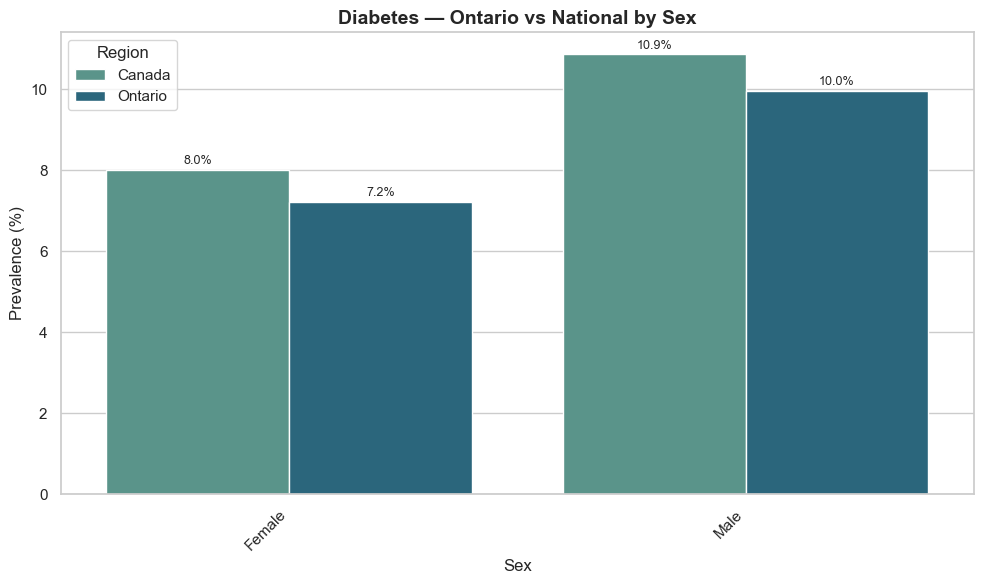

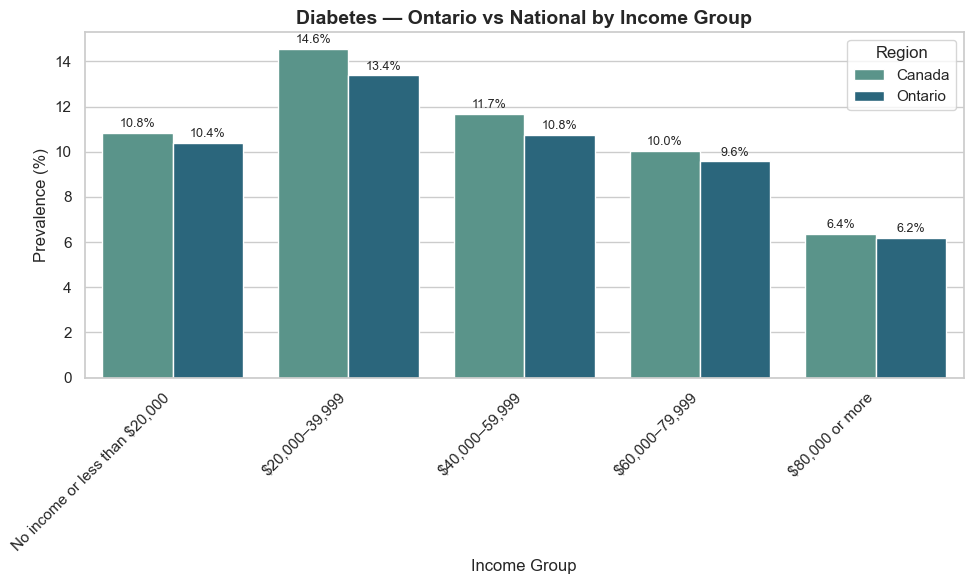

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


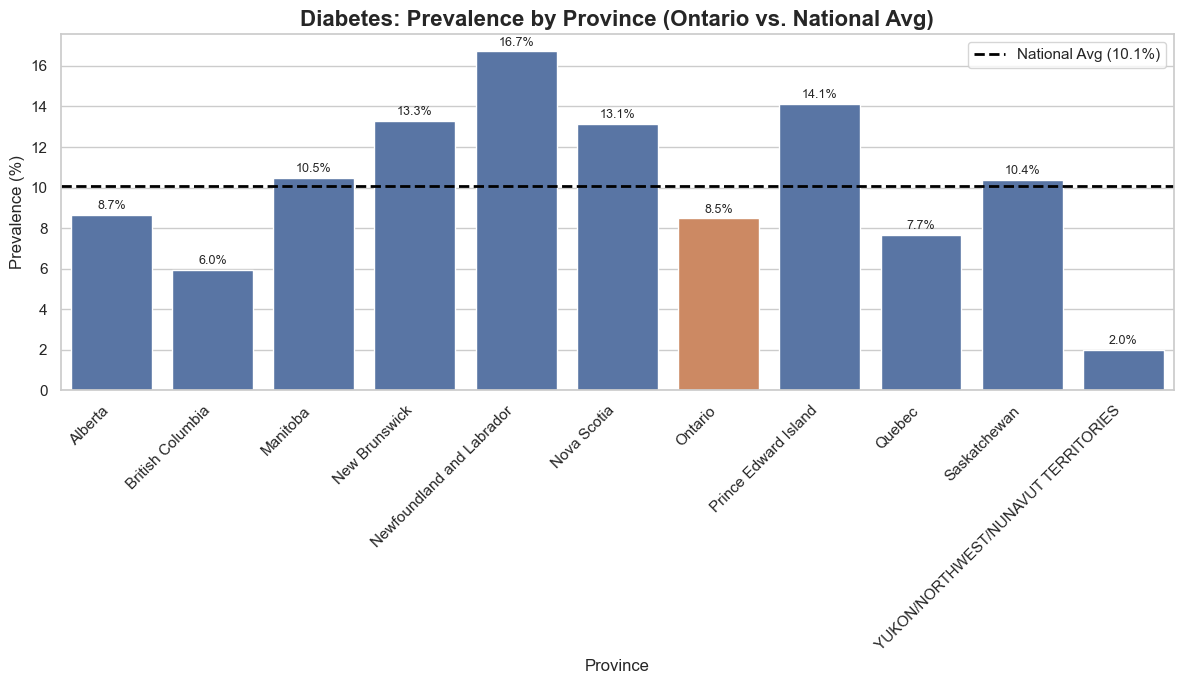

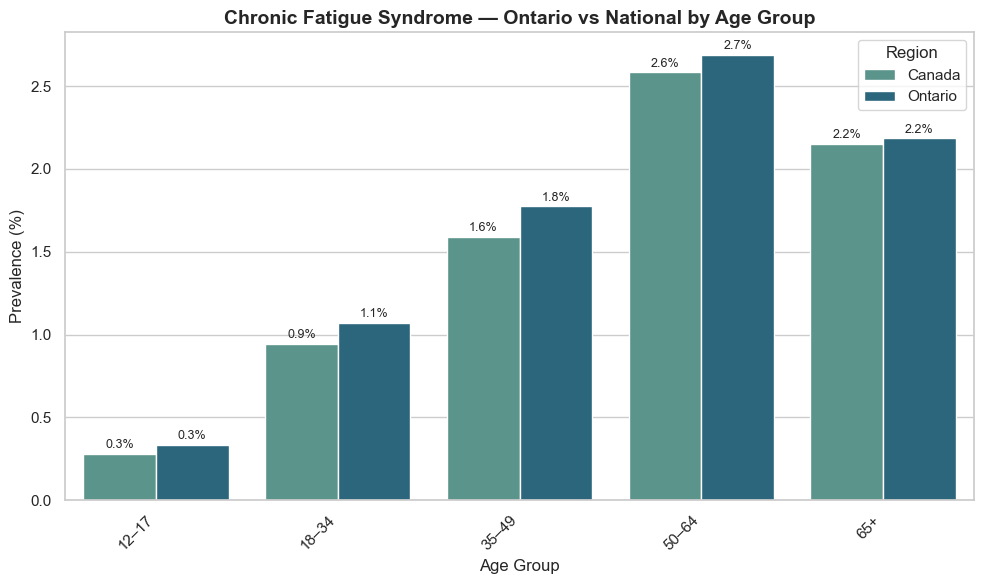

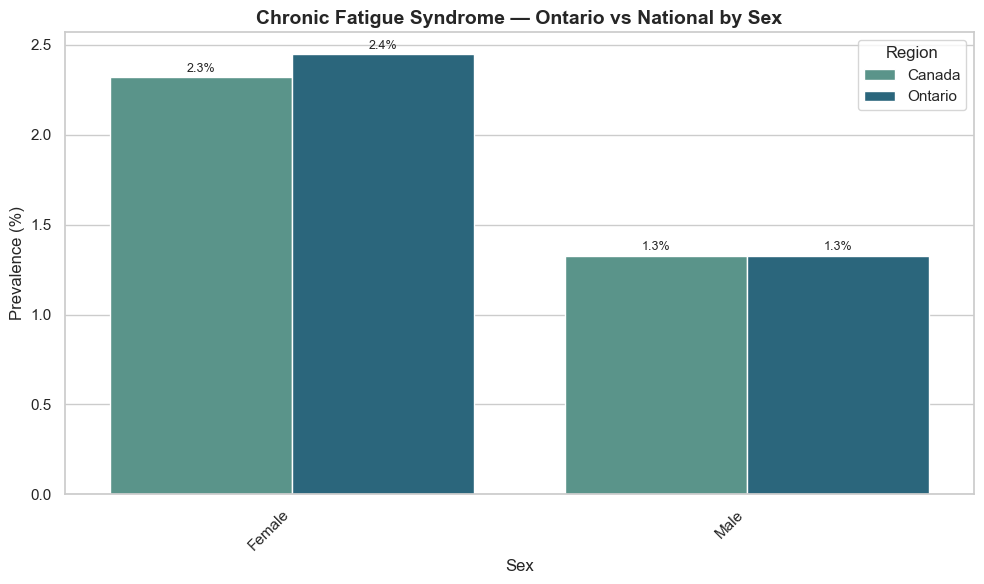

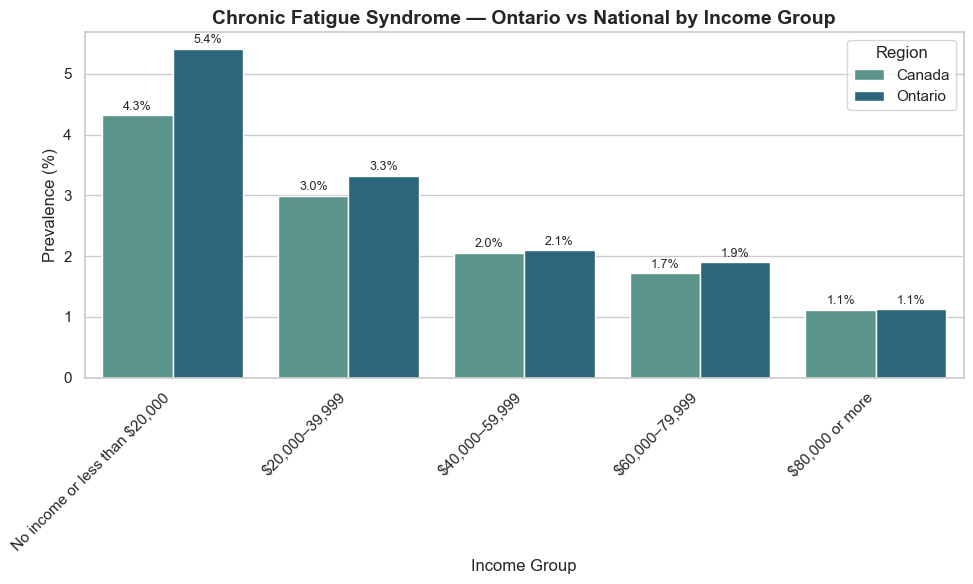

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


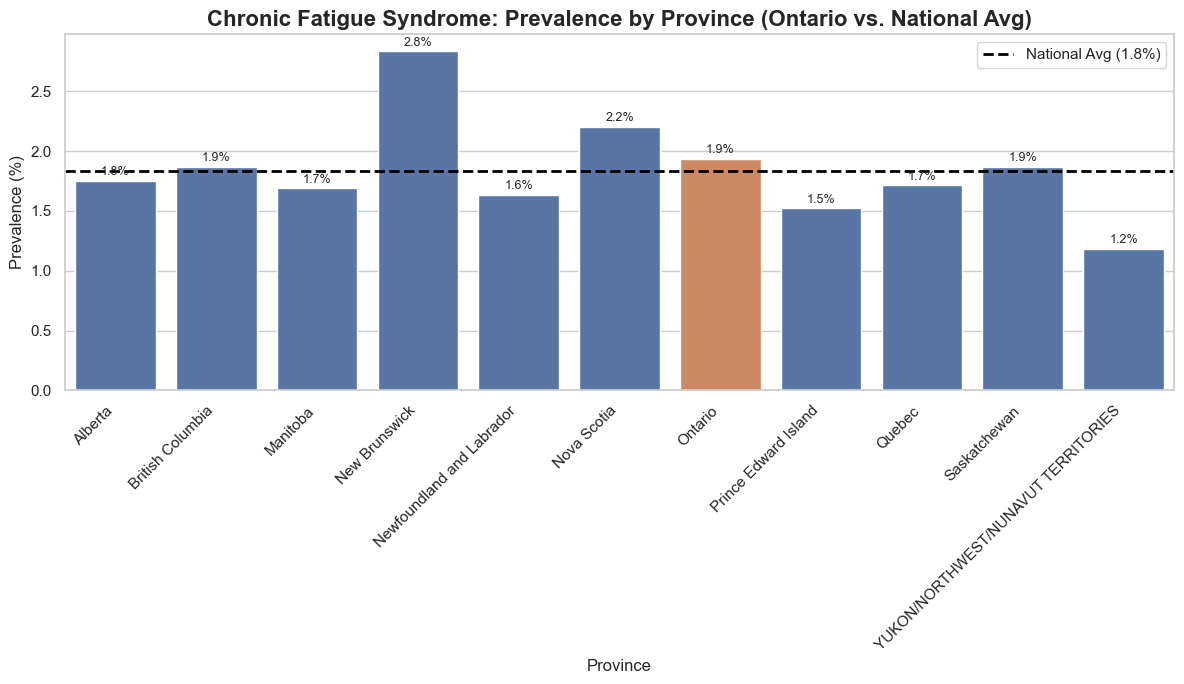

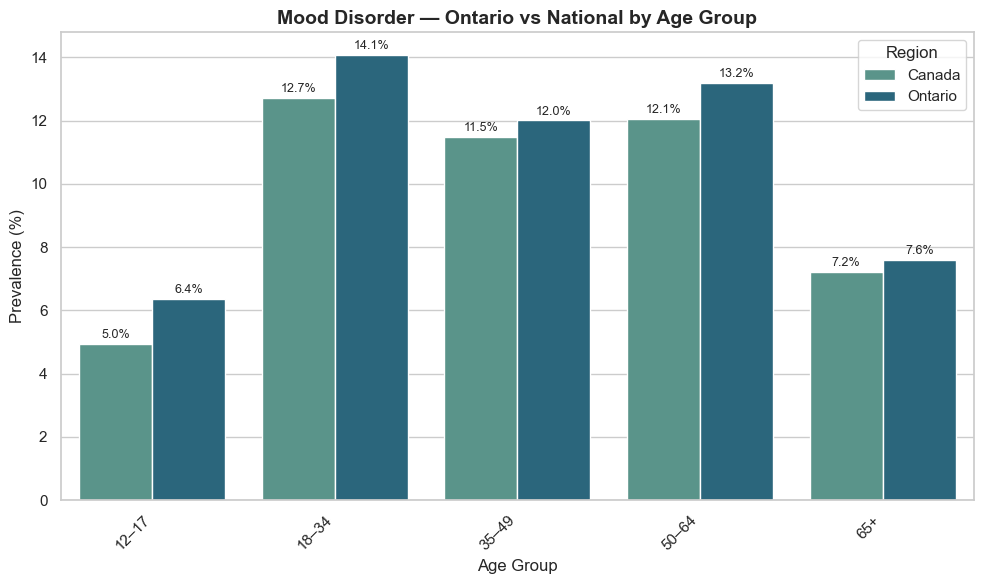

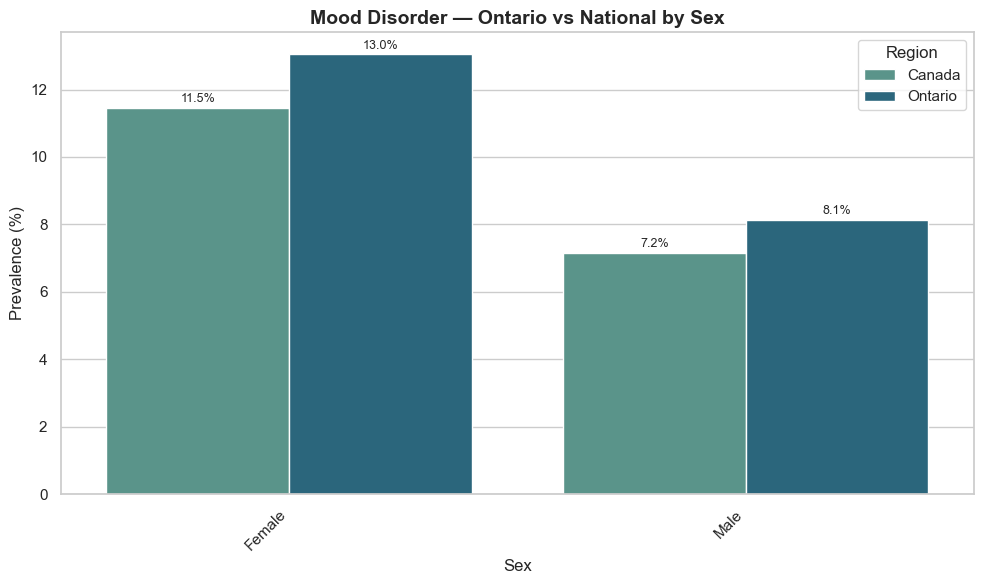

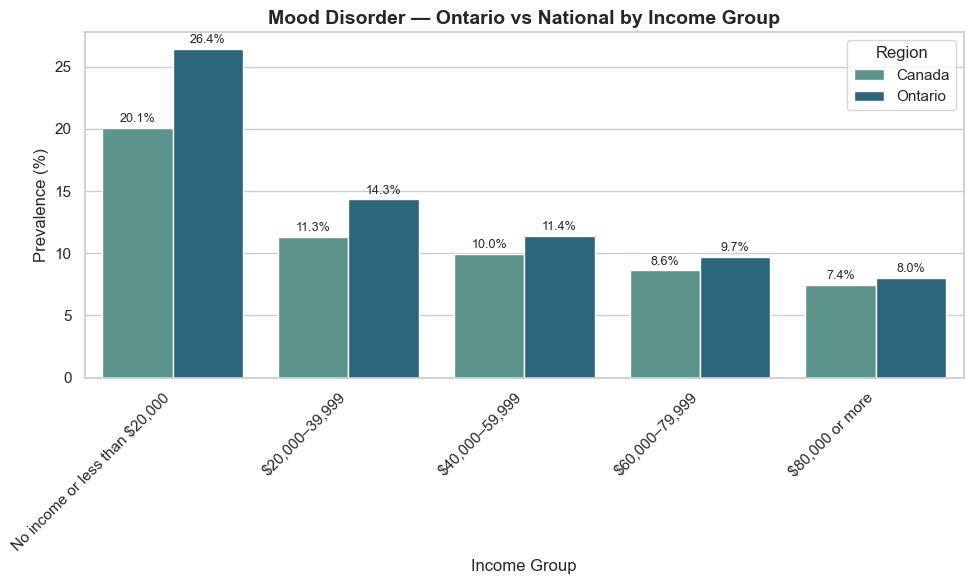

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


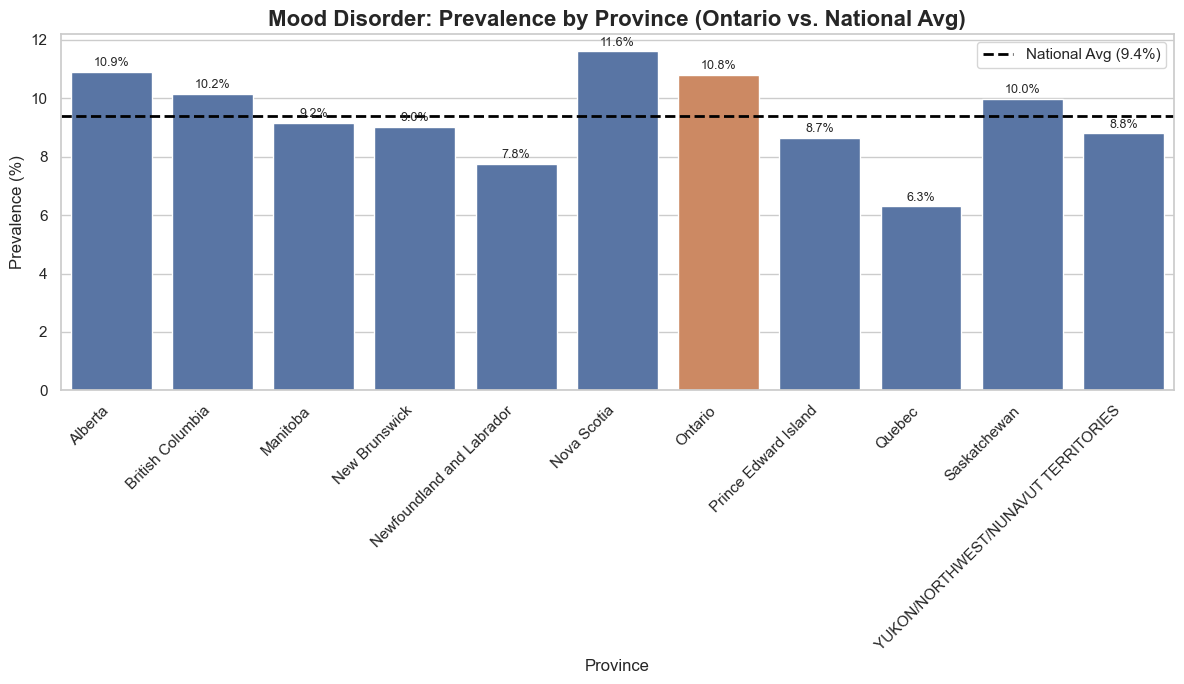

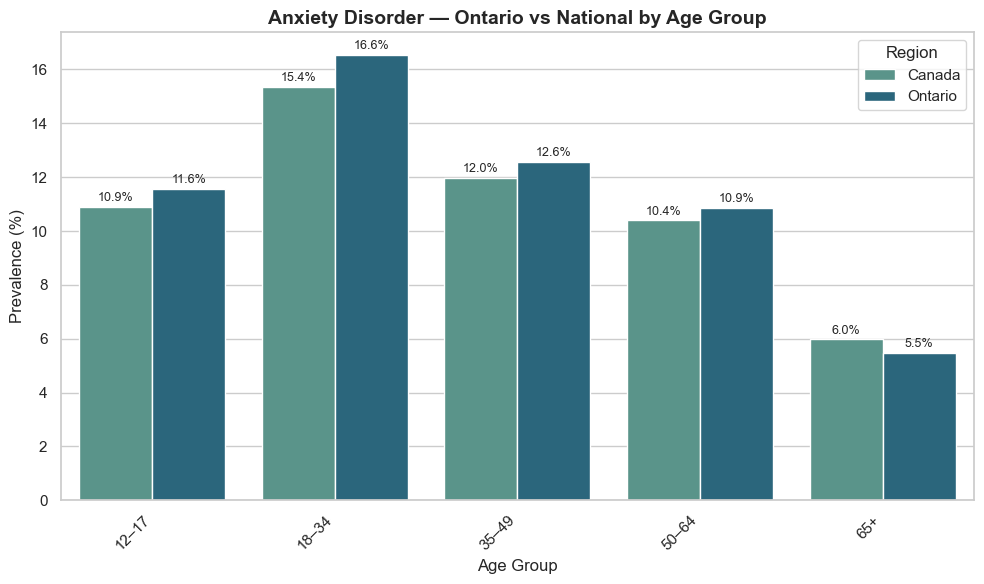

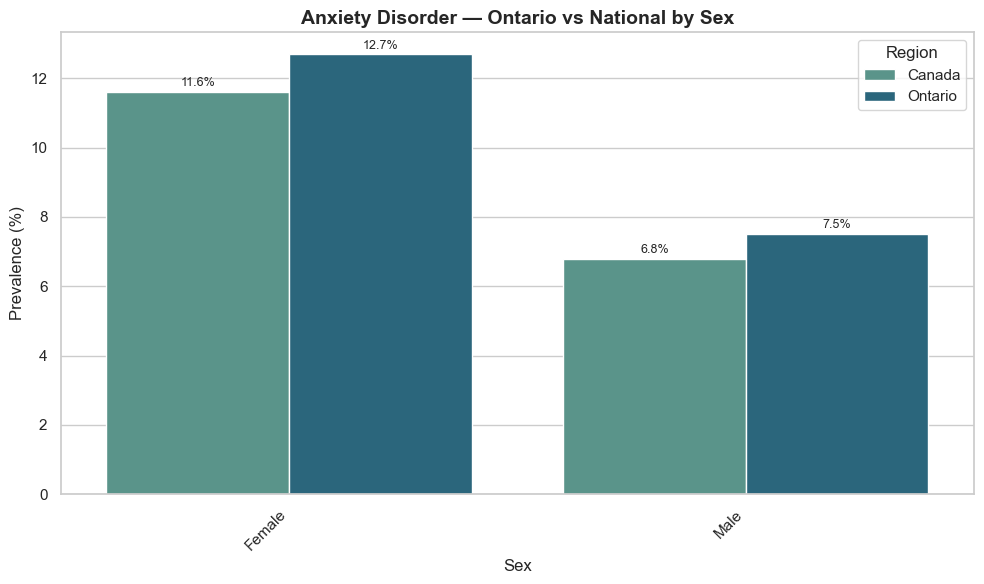

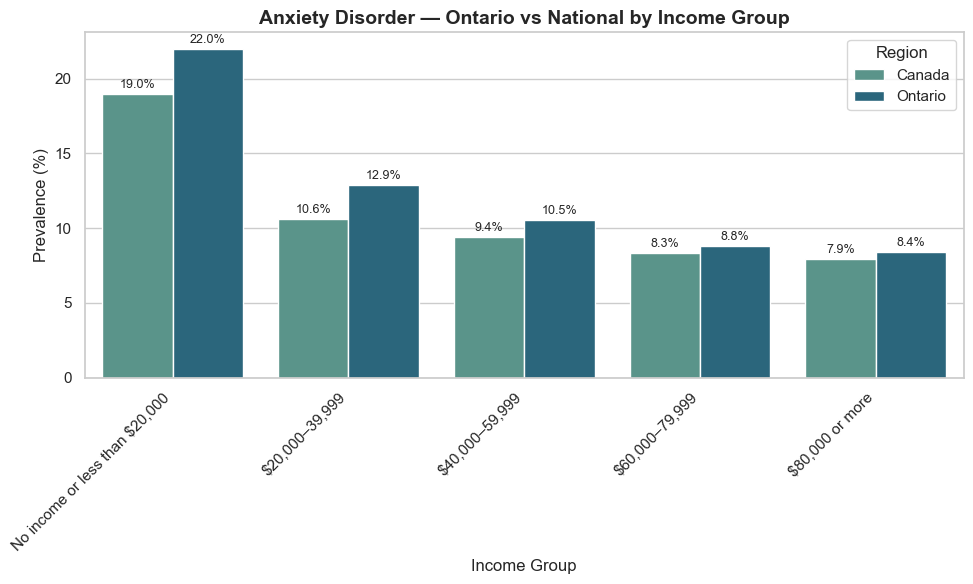

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


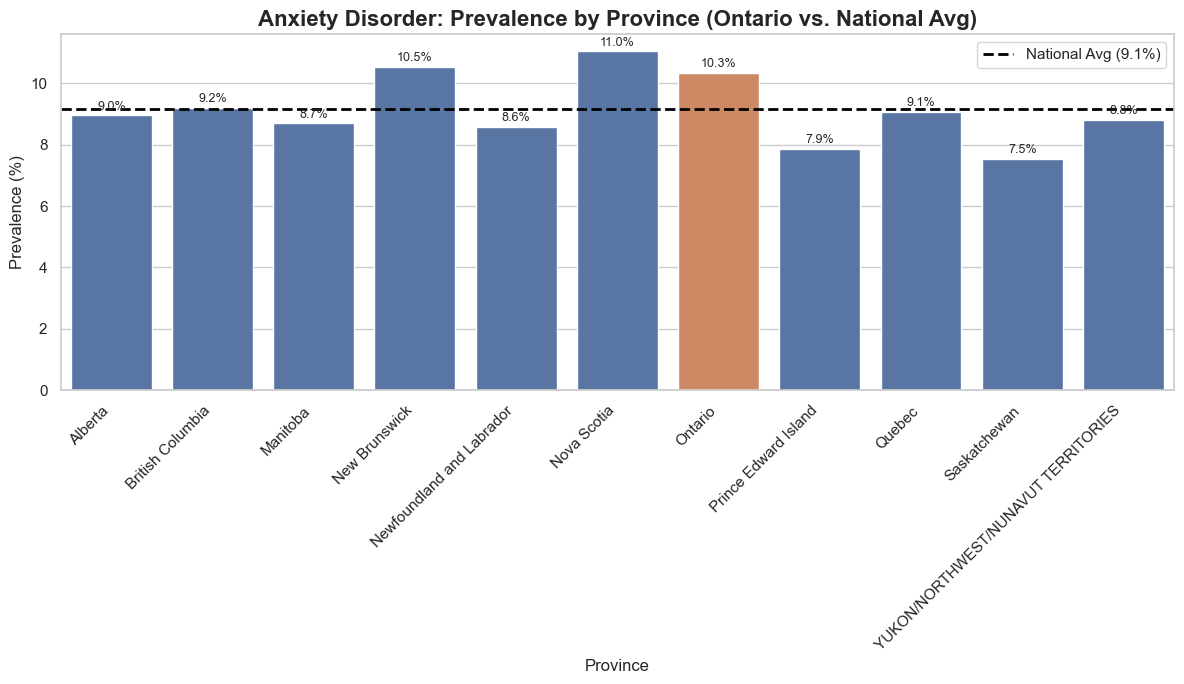

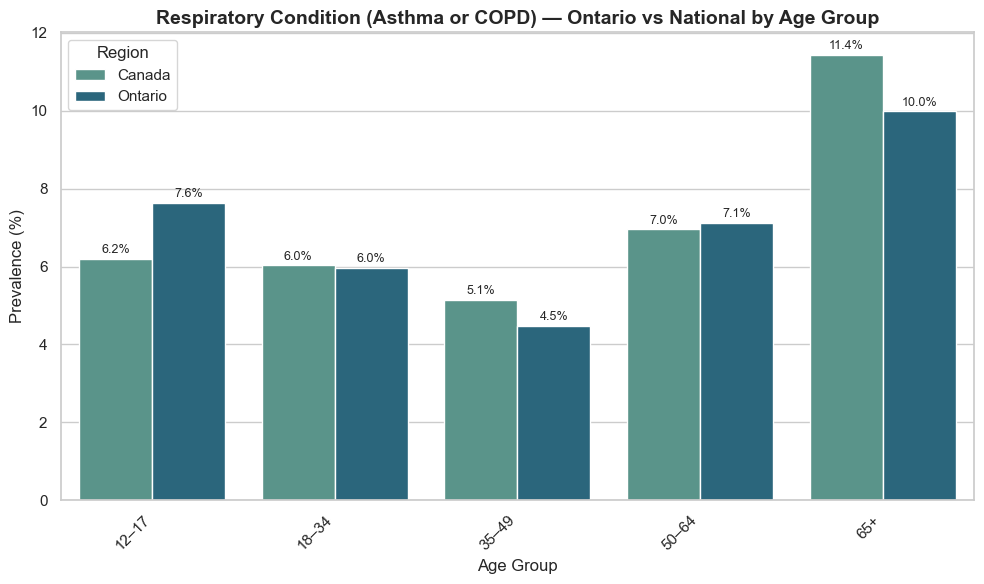

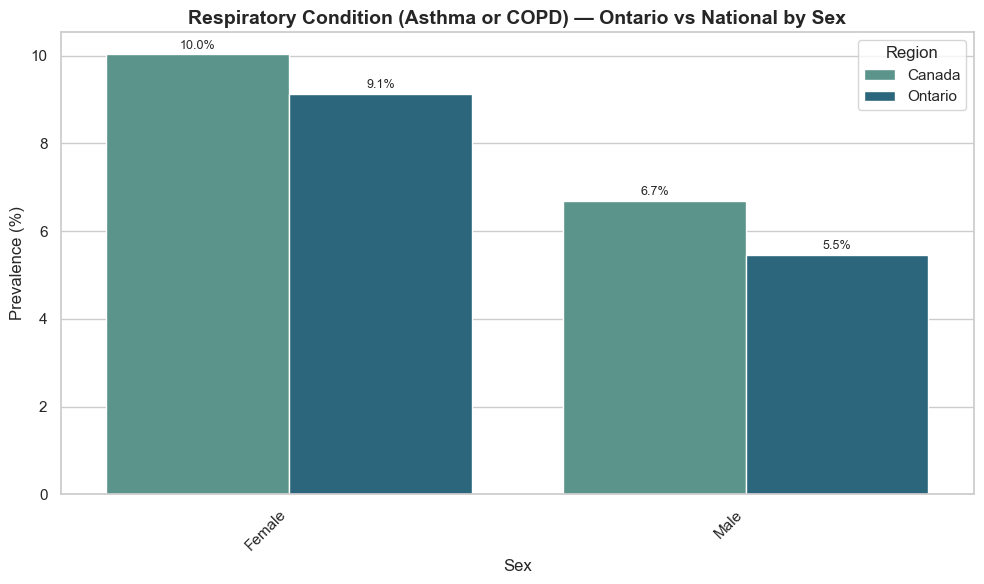

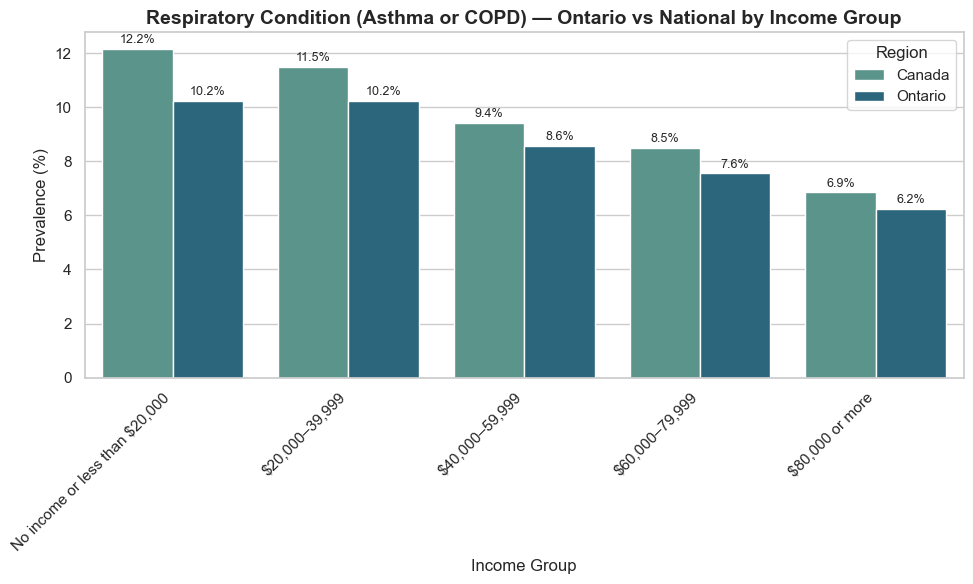

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


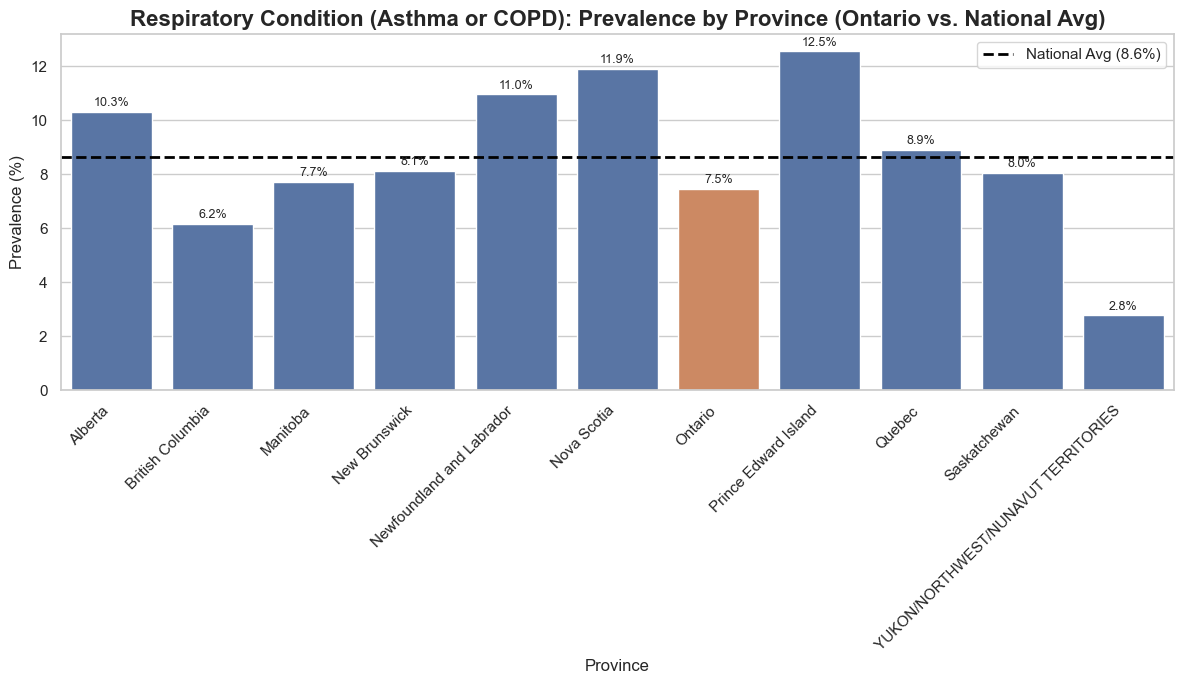

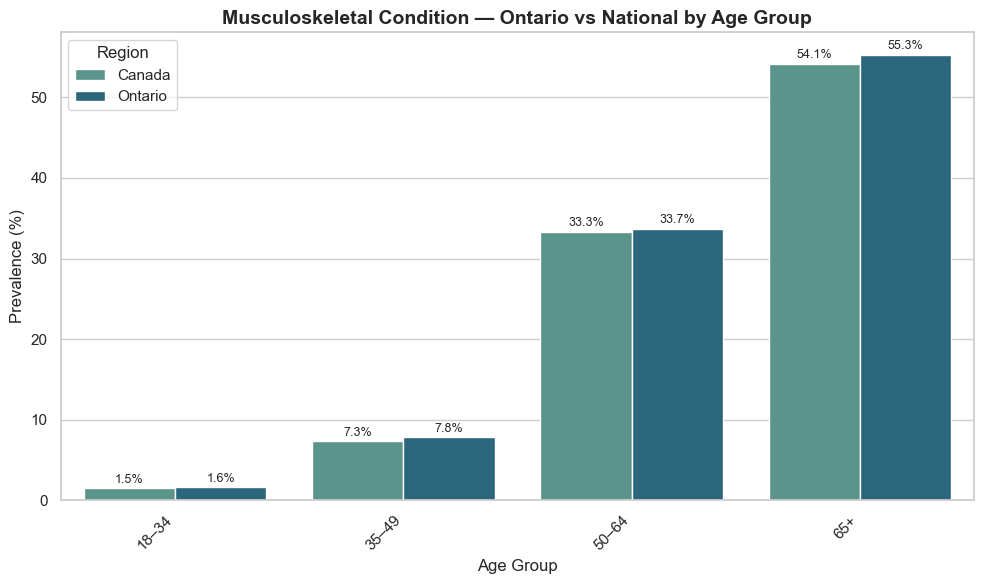

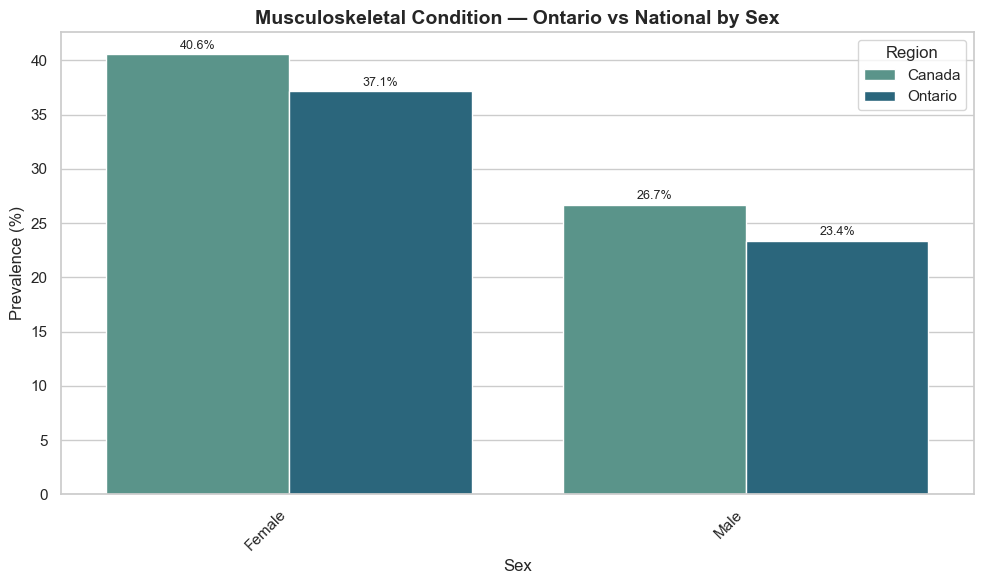

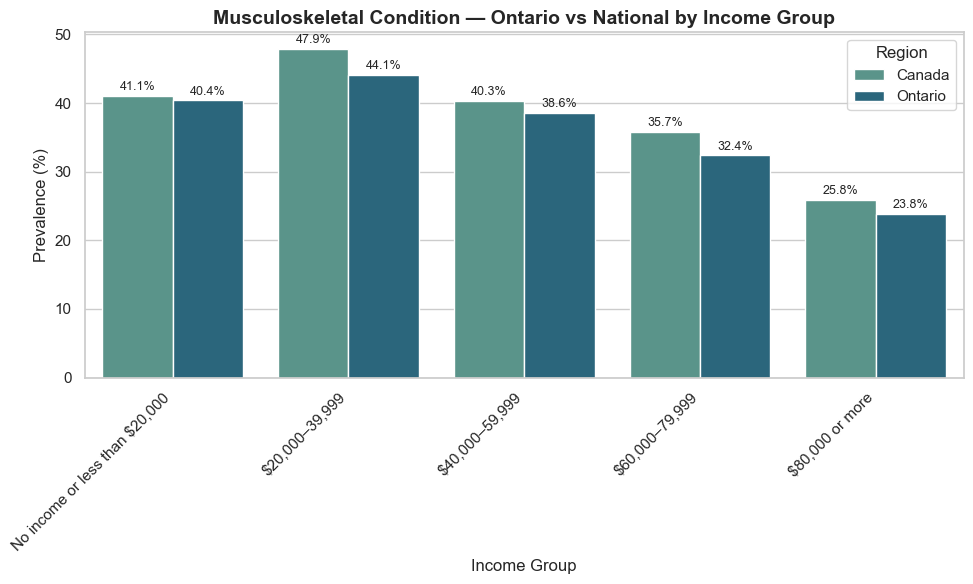

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


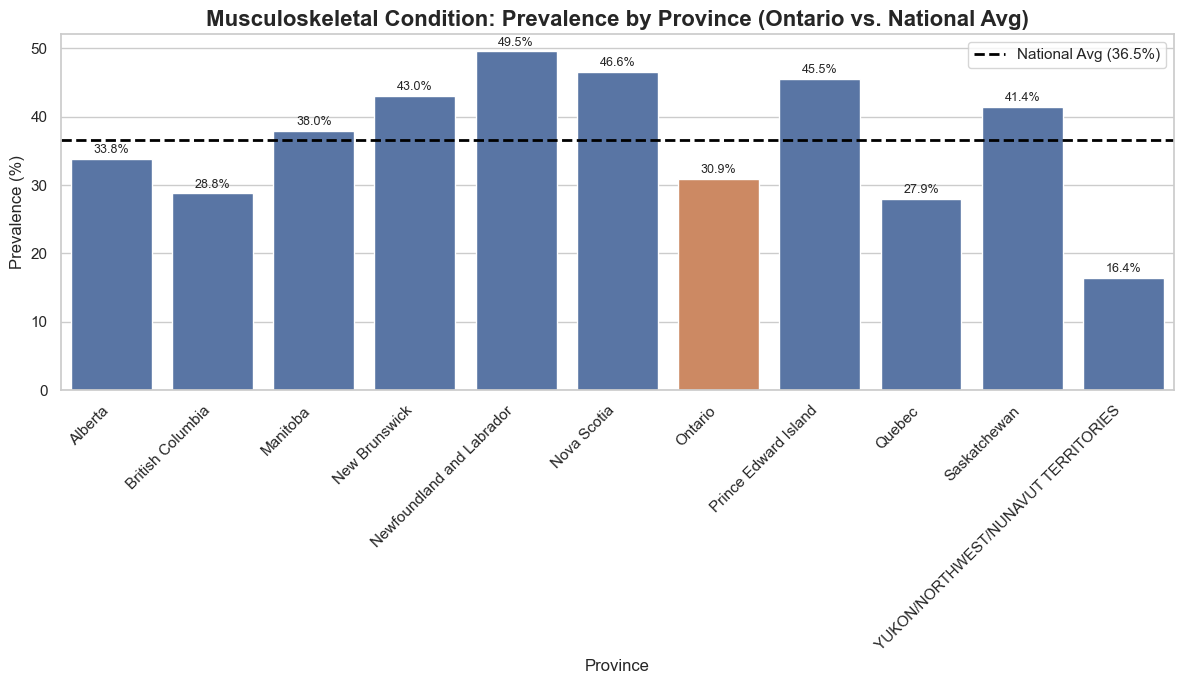

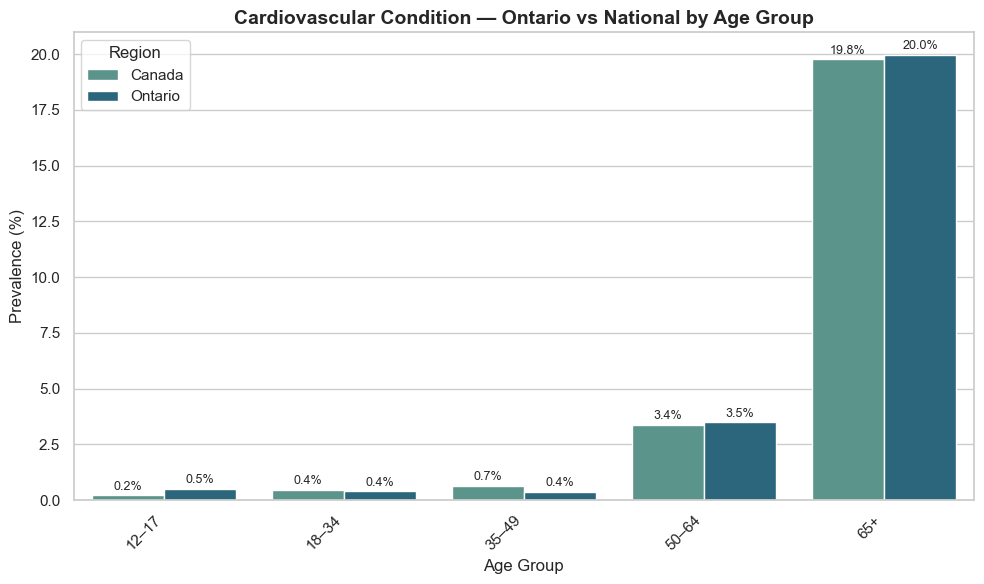

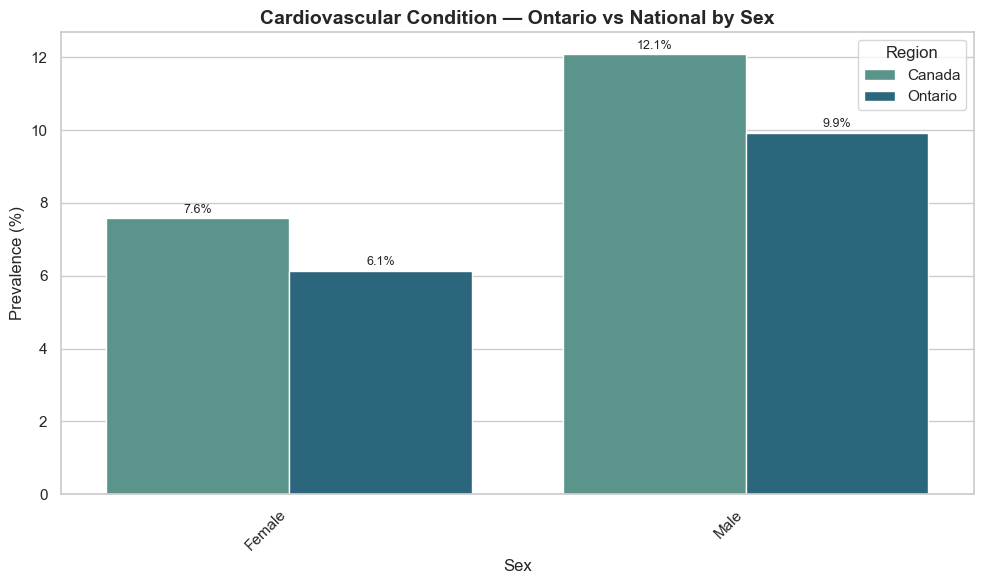

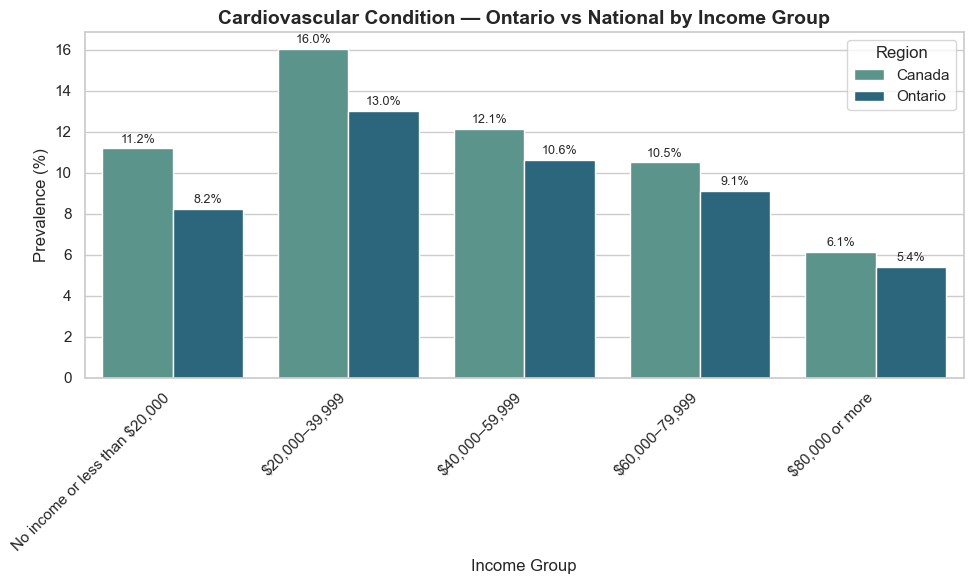

C:\Users\achar\AppData\Local\Temp\ipykernel_11012\4106930417.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


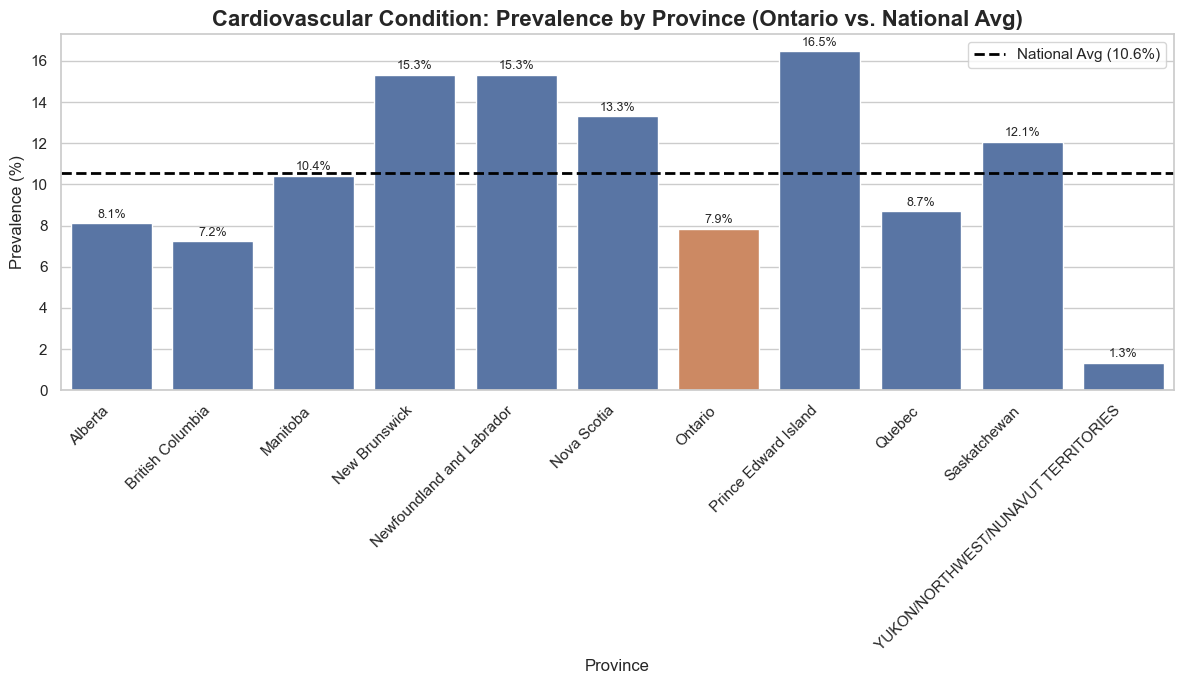

In [9]:
# 📊 Set theme and prepare output folder
sns.set_theme(style="whitegrid")
comparison_folder = os.path.join(save_dir, 'Ontario_vs_National')
os.makedirs(comparison_folder, exist_ok=True)

# 🔁 Loop through all conditions and stratifiers
for cond_name, cond_code in conditions.items():
    for group_col, label_map, group_order, label_name in stratifications:
        try:
            # Check if the current stratifier is 'Province'
            if label_name == "Province":
                # --- NEW LOGIC FOR PROVINCIAL COMPARISON ---

                # 1. Get prevalence data for all provinces (this is your 'national_result')
                provincial_data = stratify_prevalence(df, cond_code, group_col, label_map, group_order, label_name)
                provincial_data = provincial_data[provincial_data['Prevalence (%)'] > 0]

                # 2. Calculate the overall national average prevalence
                national_average = provincial_data['Prevalence (%)'].mean()

                # 3. Create a color palette to highlight Ontario
                palette_colors = ['#4c72b0' if prov != 'Ontario' else '#dd8452' for prov in provincial_data[label_name]]

                # 4. Plot the provincial rankings
                plt.figure(figsize=(12, 7))
                ax = sns.barplot(
                    data=provincial_data,
                    x=label_name,
                    y='Prevalence (%)',
                    palette=palette_colors
                )

                # 5. Add the national average line for comparison
                ax.axhline(national_average, ls='--', color='black', lw=2, label=f'National Avg ({national_average:.1f}%)')
                plt.legend()
                
                # 6. Add data labels to each bar
                for container in ax.containers:
                    ax.bar_label(
                        container,
                        labels=[f"{bar.get_height():.1f}%" for bar in container],
                        label_type='edge',
                        padding=2,
                        fontsize=9
                    )

                # 7. Title and save the new chart
                plt.title(f"{cond_name}: Prevalence by Province (Ontario vs. National Avg)", fontsize=16, weight='bold')
                plt.ylabel("Prevalence (%)", fontsize=12)
                plt.xlabel("Province", fontsize=12)
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                
                filename = f"{cond_name.replace(' ', '_')}_by_Province_Ranking.png"
                save_path = os.path.join(comparison_folder, filename)
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                plt.show()

            else:
                # --- ORIGINAL LOGIC FOR AGE, SEX, AND INCOME COMPARISONS ---
                
                # National and Ontario prevalence
                national_result = stratify_prevalence(df, cond_code, group_col, label_map, group_order, label_name)
                ontario_result = stratify_prevalence(df_ontario, cond_code, group_col, label_map, group_order, label_name)

                # Drop 0% values
                national_result = national_result[national_result['Prevalence (%)'] > 0]
                ontario_result = ontario_result[ontario_result['Prevalence (%)'] > 0]

                if national_result.empty or ontario_result.empty:
                    print(f"⚠️ Skipping: Not enough data for {cond_name} by {label_name}")
                    continue

                # Merge and melt for plotting
                comparison_df = pd.merge(
                    national_result, ontario_result, on=label_name, suffixes=('_Canada', '_Ontario')
                )
                melted = comparison_df.melt(
                    id_vars=label_name,
                    value_vars=['Prevalence (%)_Canada', 'Prevalence (%)_Ontario'],
                    var_name='Region',
                    value_name='Prevalence (%)'
                )
                melted['Region'] = melted['Region'].str.replace('Prevalence (%)_', '')

                # Setup plot
                plt.figure(figsize=(10, 6))
                if group_order:
                    present_labels = [label for label in group_order if label in melted[label_name].values]
                    melted[label_name] = pd.Categorical(melted[label_name], categories=present_labels, ordered=True)
                    melted = melted.sort_values(label_name)

                # Barplot
                ax = sns.barplot(
                    data=melted,
                    x=label_name,
                    y='Prevalence (%)',
                    hue='Region',
                    palette='crest'
                )

                # Add labels
                for container in ax.containers:
                    ax.bar_label(
                        container,
                        labels=[f"{bar.get_height():.1f}%" if bar.get_height() > 0 else "" for bar in container],
                        label_type='edge',
                        padding=2,
                        fontsize=9
                    )

                # Title and save
                plt.title(f"{cond_name} — Ontario vs National by {label_name}", fontsize=14, weight='bold')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                
                filename = f"{cond_name.replace(' ', '_')}_Ontario_vs_National_by_{label_name.replace(' ', '_')}.png"
                save_path = os.path.join(comparison_folder, filename)
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                plt.show()

        except Exception as e:
            print(f"❌ Error generating chart for {cond_name} by {label_name}: {e}")

## Ontario vs. National Comparison: Key Findings & Conclusion

This section compares the prevalence of chronic conditions in Ontario against the national average, providing a clearer picture of the province's unique health landscape.

### Where Ontario Aligns with National Trends

The core demographic drivers of chronic conditions in Ontario are largely consistent with the rest of Canada:
* **Age and Income:** The strong correlation between **advancing age** and higher rates of physical conditions, as well as the link between **lower income** and poorer health outcomes, are national trends that are clearly reflected within Ontario.
* **The Dual Burden:** Ontario experiences the same "dual health challenge" seen across the country, with **physical ailments** being more prevalent among older populations and **mental health conditions** disproportionately affecting younger residents.

### Where Ontario Differs: A Provincial Health Snapshot

When compared directly to the Canadian average, Ontario's health profile shows a distinct divergence:

* **Physical Health 🩺:** For most major physical conditions, including **Cardiovascular Conditions, High Blood Pressure, High Cholesterol, Musculoskeletal Conditions,** and **Respiratory Conditions**, Ontario's prevalence rates are consistently **at or slightly below the national average**. This suggests the province is managing these traditional chronic diseases relatively well compared to its peers.
* **Mental Health 🧠:** In stark contrast, Ontario's prevalence for **Anxiety and Mood Disorders is notably higher** than the Canadian average. This indicates that mental wellness is a more acute challenge for Ontarians compared to the rest of the country.

---
### Final Conclusion

The comparison reveals that Ontario's public health landscape is a story of two distinct challenges. While the province is performing at or better than the national benchmark for many major physical diseases, it faces a more significant and pressing burden regarding **mental health**.

This analysis underscores the importance of a targeted, provincial-level approach. The findings suggest that while broad national strategies for physical health may be effective in Ontario, a more focused and intensified effort on mental health resources and policy is crucial for addressing the specific needs of the province's population.